In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
train_features = pd.read_csv('../data/train_features.csv')
train_targets_nonscored = pd.read_csv('../data/train_targets_nonscored.csv')
train_targets_scored = pd.read_csv('../data/train_targets_scored.csv')
test_features = pd.read_csv('../data/test_features.csv')


In [5]:
train_targets_scored.loc[:, 'acat_inhibitor'] = 1.0

In [6]:
train_targets_scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                 1.0                               0   
1                 1.0                               0   
2                 1.0                               0   
3                 1.0                               0   
4                 1.0                               0   
...               ...                             ...   
23809             1.0                               0   
23810             1.0                               0   
23811             1.0                               0   
23812             1.0                               0   
23813             1.0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                               0  ...                                      0   
1                               0  ...                                      0   
2                               0  ...                                      0   
3                               0  ...                                      0   
4                               0  ...                                      0   
...                           ...  ...                                    ...   
23809                           0  ...                                      0   
23810                           0  ..

In [3]:
train = pd.concat([train_features, train_targets_nonscored, train_targets_scored], axis=1)

In [4]:
FEATURE_COLS = train_features.columns.values[1:]
TARGET_COLS = train_targets_scored.columns.values[1:]
G_FEATURE_COLS = [c for c in FEATURE_COLS if 'g-' in c]
C_FEATURE_COLS = [c for c in FEATURE_COLS if 'c-' in c]

In [5]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...  tropomyosin_receptor_kinase_inhibitor  trpv_agonist  \
0 -0.1944 -1.0120  ...                                      0             0   
1  1.0190  0.5207  ...                                      0             0   
2 -0.0323  1.2390  ...                                      0             0   
3  4.0620 -0.8095  ...                                      0             0   
4  1.4180 -0.8244  ...                                      0             0   

   trpv_antagonist  tubulin_inhibitor  tyrosine_kinase_inhibitor  \
0                0                  0                          0   
1                0                  0                          0   
2                0                  0                          0   
3                0                  0                          0   
4                0                  0                          0   

   ubiquitin_specific_protease_inhibitor  vegfr_inhibitor  vitamin_b  \
0                                      0                0          0   
1                                      0                0          0   
2                                      0                0          0   
3                                      0                0          0   
4                                      0                0          0   

   vitamin_d_receptor_agonist  wnt_inhibitor  
0                           0              0  
1                           0              0  
2                           0              0  
3                           0              0  
4                           0              0  

[5 rows x 1486 columns]

In [23]:
def process_df(df):
    df.loc[:, 'cp_time'] = df.loc[:, 'cp_time'].map({24: -1, 48: 0, 72: 1})
    df.loc[:, 'cp_dose'] = df.loc[:, 'cp_dose'].map({'D1': 0, 'D2': 1})
    df = df.drop('cp_type', axis=1)
    return df

In [24]:
all_data = process_df(train_features)

In [25]:
x = all_data.values[:, 1:]

In [28]:
tsne = TSNE()
xx = tsne.fit_transform(x[::2])

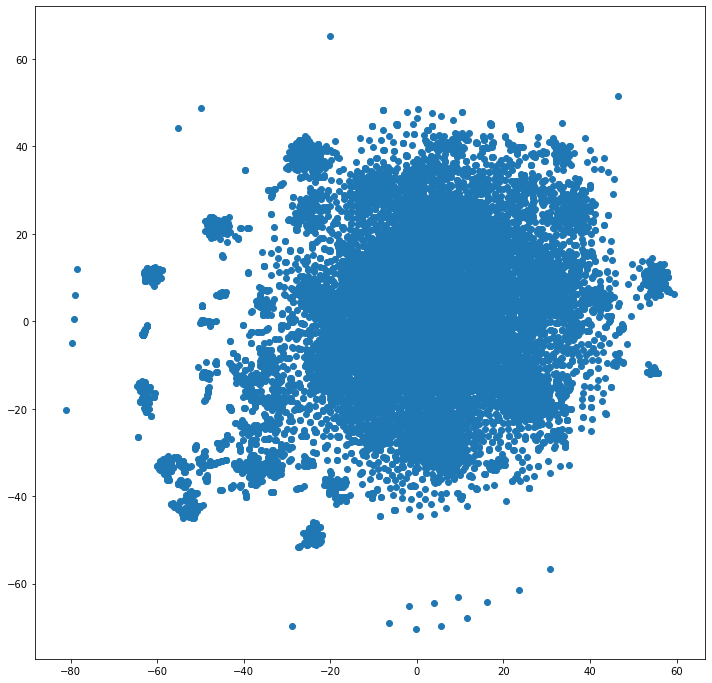

In [29]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.scatter(xx[:, 0], xx[:, 1])
plt.show()

### tSNE, PCA, and UMAP of features

First, tSNE.
Get features into np array

In [40]:
actives = train[np.sum(train[TARGET_COLS].values, axis=1) > 0]

In [45]:
actives = actives[np.sum(actives[cell_actives].values, axis=1) > 0]

In [46]:
g_features = actives[G_FEATURE_COLS].values
c_features = actives[C_FEATURE_COLS].values
all_features = np.hstack([g_features, c_features])

In [47]:
tsne = TSNE()
emb_features = tsne.fit_transform(c_features)

In [48]:
actives['multiclass'] = ['+'.join(TARGET_COLS[i.astype(np.bool)]) for i in actives[TARGET_COLS].values]

<ipython-input-48-d9f4439cf91d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actives['multiclass'] = ['+'.join(TARGET_COLS[i.astype(np.bool)]) for i in actives[TARGET_COLS].values]


In [49]:
multiclass_set = list(set(actives['multiclass'].values))

In [54]:
labels = [multiclass_set.index(c) for c in actives['multiclass'].values]

In [ ]:
for multiclass in multiclass_set:
    fig, ax = plt.subplots(1, 1, figsize=(20, 12))
    x, y = emb_features.T
    labels = np.abs(1 - (actives['multiclass'] == multiclass).astype(np.int))
    ax.scatter(x, y, c=labels)
    ax.set_title(multiclass)
    plt.show()

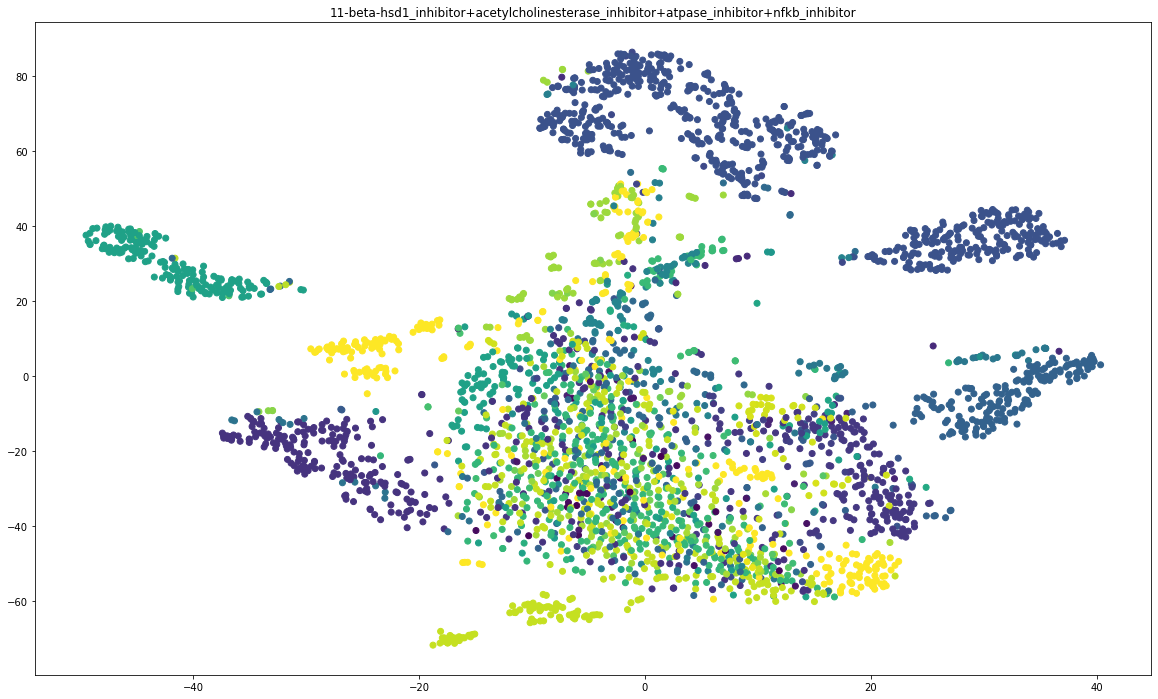

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
x, y = emb_features.T
ax.scatter(x, y, c=labels)
ax.set_title(multiclass)
plt.show()

In [73]:
condition = train[train[TARGET_COLS[3]] == 1]

In [74]:
condition.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
21   id_003b43239  trt_cp       48      D1 -0.1119  0.9003  0.3911  0.1339   
62   id_009d60bd9  trt_cp       24      D1 -1.3980 -0.3277 -0.2602  0.8570   
240  id_0279e8025  trt_cp       24      D2 -1.2170 -1.0660 -0.2248  1.7010   
262  id_02b02aaed  trt_cp       48      D1  0.3203 -0.7749  0.4191  0.4270   
635  id_066adb43f  trt_cp       72      D2 -0.3367 -0.0432  0.0891 -1.3700   

        g-4     g-5  ...  tropomyosin_receptor_kinase_inhibitor  trpv_agonist  \
21   0.7373 -0.1281  ...                                      0             0   
62  -0.5087 -0.2973  ...                                      0             0   
240  0.4448  0.5106  ...                                      0             0   
262  0.1221 -0.3503  ...                                      0             0   
635 -0.9172  0.4573  ...                                      0             0   

     trpv_antagonist  tubulin_inhibitor  tyrosine_kinase_inhibitor  \
21                 0                  0                          0   
62                 0                  0                          0   
240                0                  0                          0   
262                0                  0                          0   
635                0                  0                          0   

     ubiquitin_specific_protease_inhibitor  vegfr_inhibitor  vitamin_b  \
21                                       0                0          0   
62                                       0                0          0   
240                                      0                0          0   
262                                      0                0          0   
635                                      0                0          0   

     vitamin_d_receptor_agonist  wnt_inhibitor  
21                            0              0  
62                            0              0  
240                           0              0  
262                           0              0  
635                           0              0  

[5 rows x 1486 columns]

In [71]:
averages = np.zeros((len(G_FEATURE_COLS)))
for dosage in ['D1', 'D2']:
    query = condition[condition['cp_dose'] == dosage] # do dosage seperate to "keep dosage constant"
    data = []
    for i in range(len(G_FEATURE_COLS)):
        means = [query[query['cp_time'] == cp_time]['g-%d'%i].mean() for cp_time in [24, 48, 72]]
        d_0 = abs(means[0] - means[1])
        d_1 = abs(means[1] - means[2])
        d_avg = (d_0 + d_1) / 2
        data.append(d_avg)
    averages += np.array(data)

In [72]:
np.argsort(averages)[::-1] #averages[]

array([771, 288, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252,
       251, 250, 249, 248, 247, 246, 245, 244, 243, 242, 263, 264, 265,
       277, 286, 285, 284, 283, 282, 281, 280, 279, 278, 276, 266, 275,
       274, 273, 272, 271, 270, 269, 268, 267, 241, 240, 239, 204, 213,
       212, 211, 210, 209, 208, 207, 206, 205, 203, 215, 202, 201, 200,
       199, 198, 197, 196, 195, 194, 214, 216, 238, 228, 237, 236, 235,
       234, 233, 232, 231, 230, 229, 227, 217, 226, 225, 224, 223, 222,
       221, 220, 219, 218, 287, 289, 770, 290, 359, 358, 357, 356, 355,
       354, 353, 352, 351, 350, 349, 348, 347, 346, 345, 344, 343, 342,
       341, 340, 339, 360, 361, 362, 374, 383, 382, 381, 380, 379, 378,
       377, 376, 375, 373, 363, 372, 371, 370, 369, 368, 367, 366, 365,
       364, 338, 337, 336, 301, 310, 309, 308, 307, 306, 305, 304, 303,
       302, 300, 312, 299, 298, 297, 296, 295, 294, 293, 292, 291, 311,
       313, 335, 325, 334, 333, 332, 331, 330, 329, 328, 327, 32

In [58]:
len(train[train['cp_type'] == 'trt_cp'])

21948

In [60]:
np.sum(train['cp_type'] == 'trt_cp')

21948

array([0.84918527, 0.66620323, 0.58358355, 0.58355645, 0.56372903,
       0.56050054, 0.52966355, 0.50999226, 0.50100989, 0.4854229 ,
       0.46156688, 0.45101452, 0.44677731, 0.44152613, 0.43210398,
       0.43067022, 0.43062204, 0.4296272 , 0.41581065, 0.41539011,
       0.41020484, 0.40985688, 0.40629613, 0.40487086, 0.40256677,
       0.39709613, 0.39631108, 0.38733065, 0.38395387, 0.38116817,
       0.37846892, 0.37679538, 0.37406935, 0.37325968, 0.36592022,
       0.36440065, 0.36424806, 0.36083849, 0.35765323, 0.35577097,
       0.3556014 , 0.35386473, 0.35060871, 0.34967419, 0.34775656,
       0.34767839, 0.34611237, 0.34428882, 0.34368505, 0.34342301,
       0.34194355, 0.34128387, 0.34119516, 0.34000957, 0.33812516,
       0.33771022, 0.33275968, 0.33154978, 0.32950409, 0.32842323,
       0.32587839, 0.32355376, 0.32172817, 0.31934172, 0.31819312,
       0.31677785, 0.31632376, 0.31479355, 0.3125114 , 0.31237065,
       0.31081462, 0.31029688, 0.30635817, 0.30602763, 0.30537

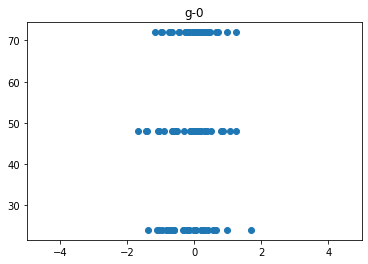

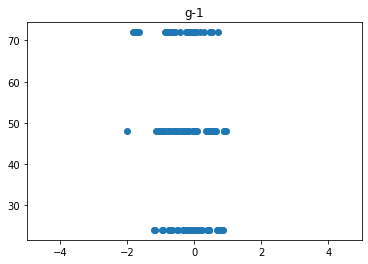

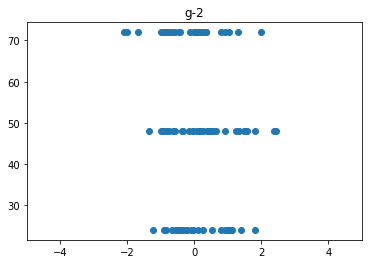

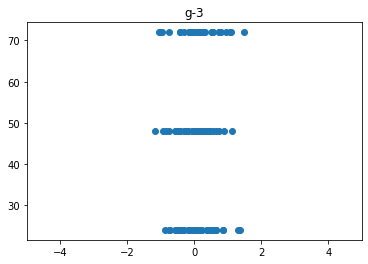

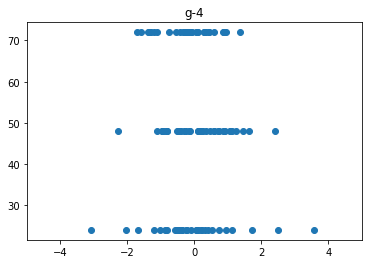

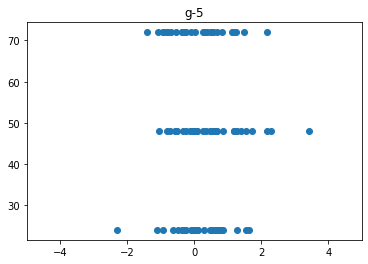

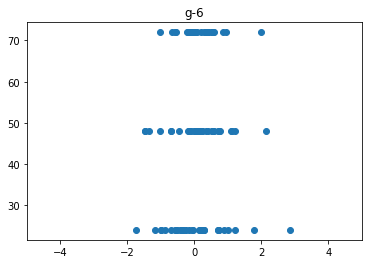

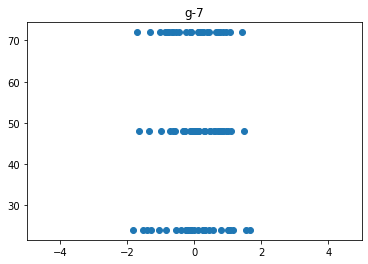

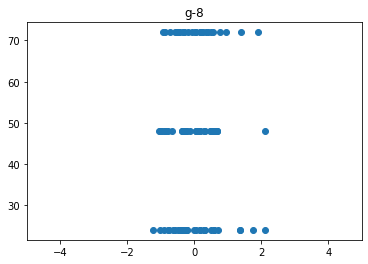

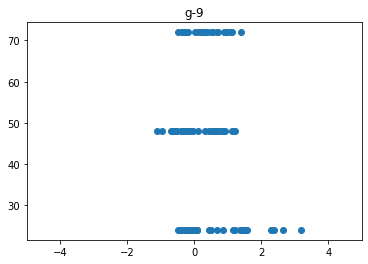

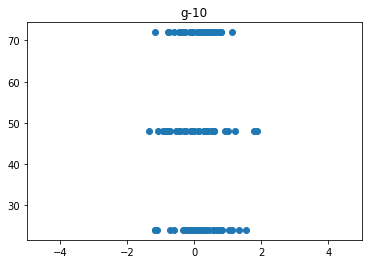

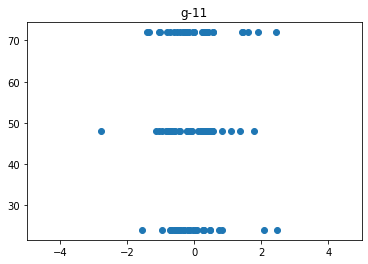

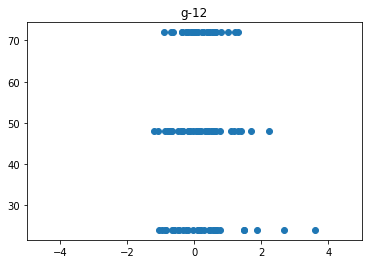

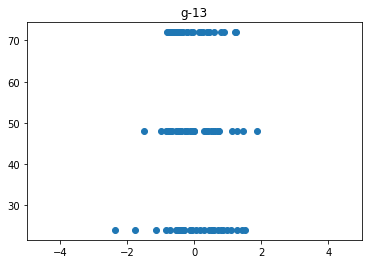

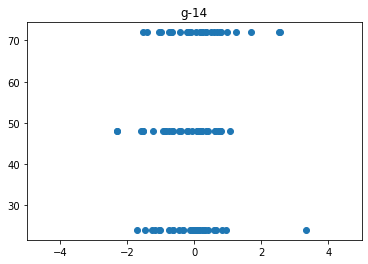

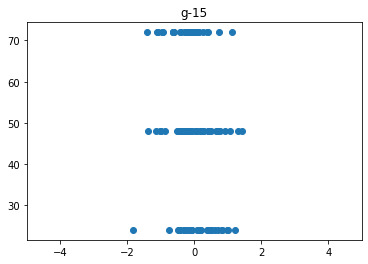

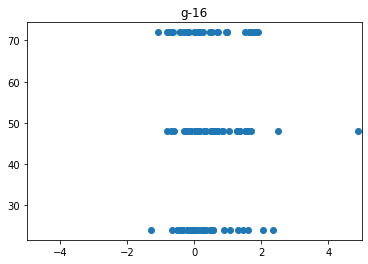

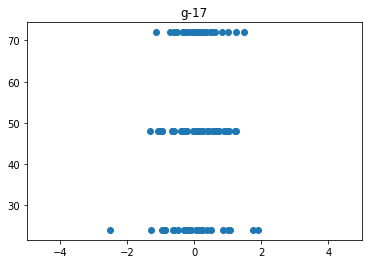

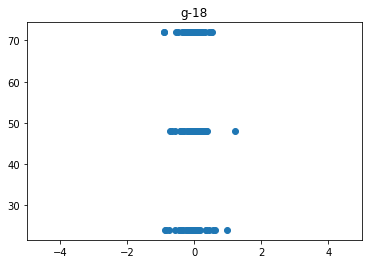

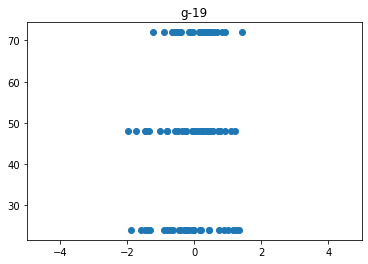

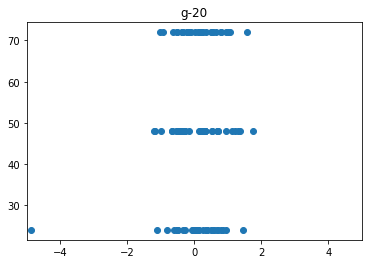

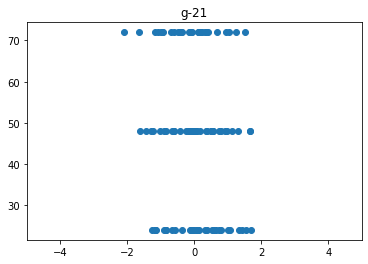

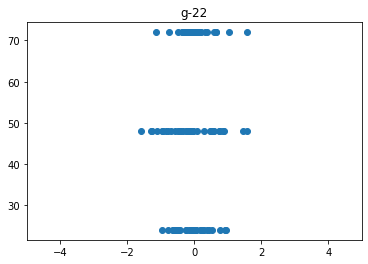

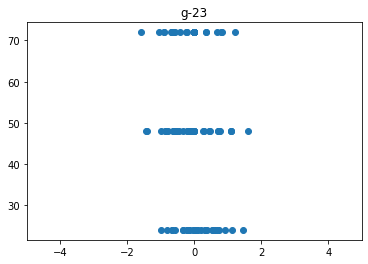

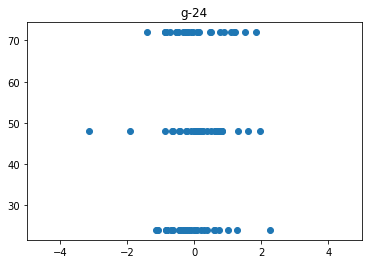

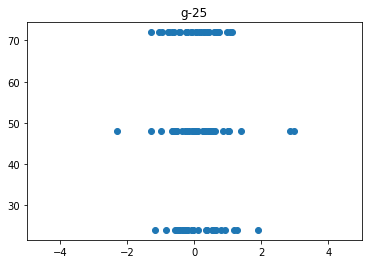

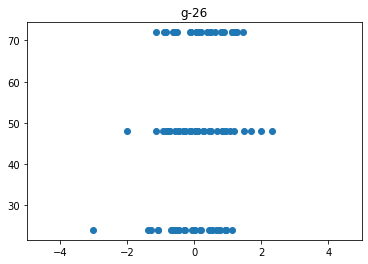

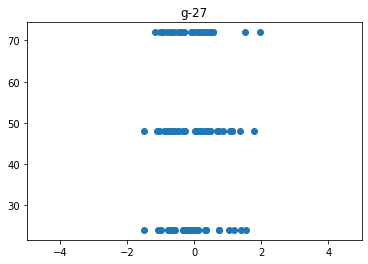

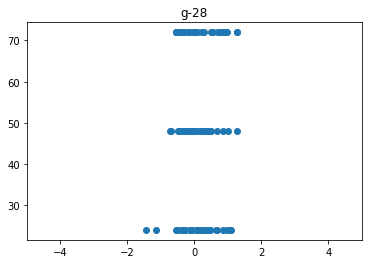

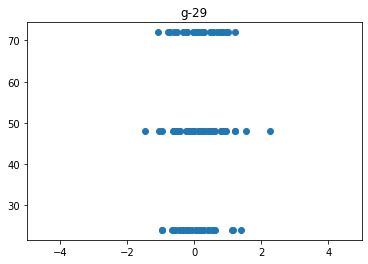

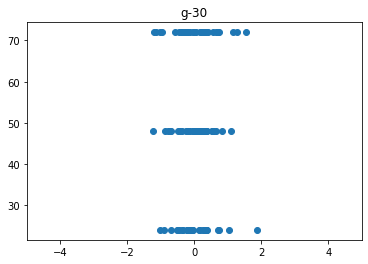

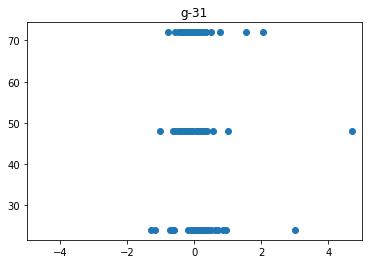

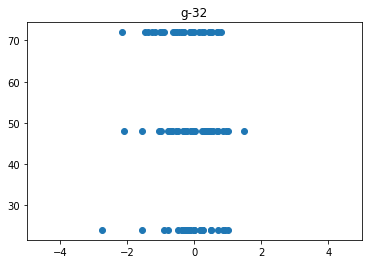

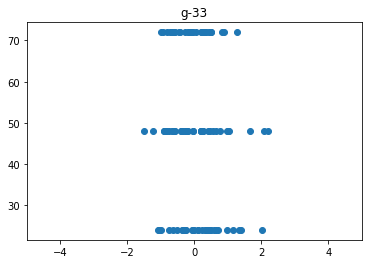

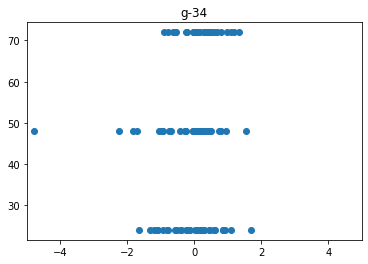

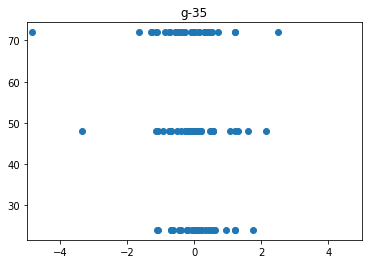

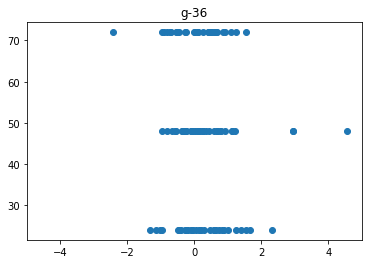

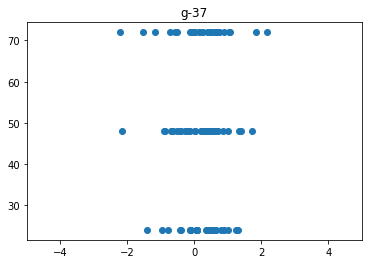

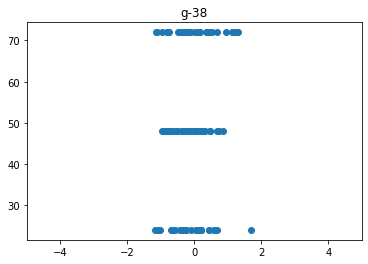

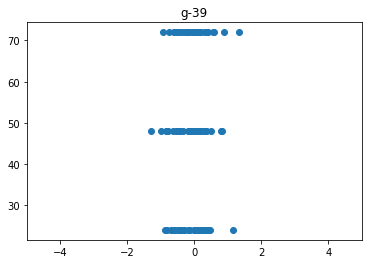

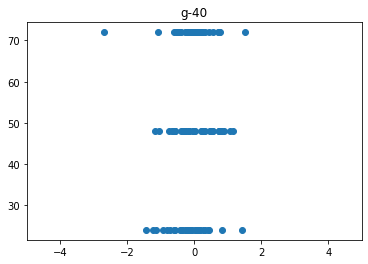

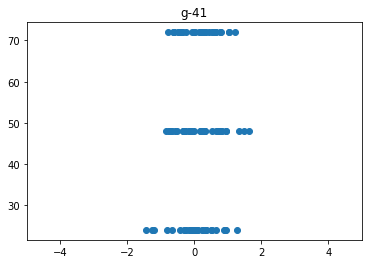

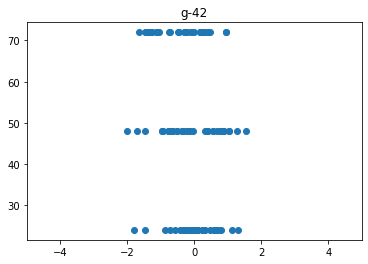

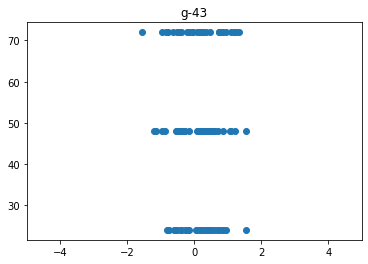

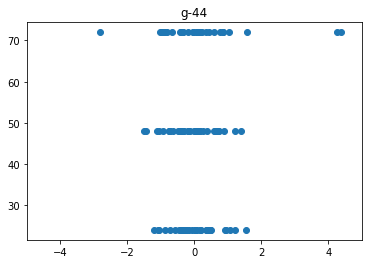

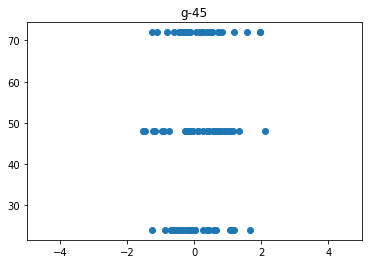

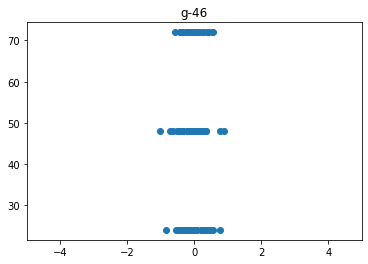

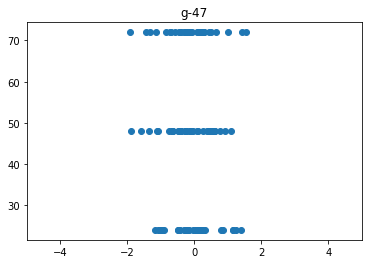

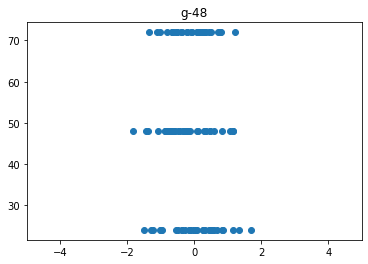

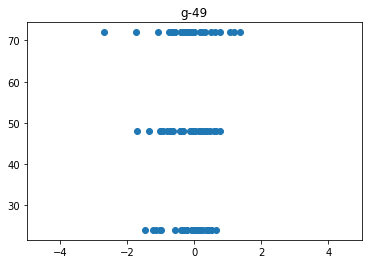

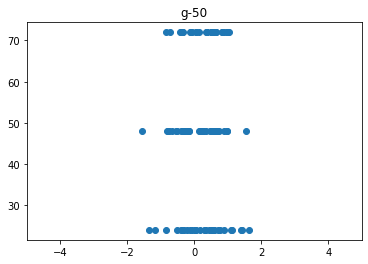

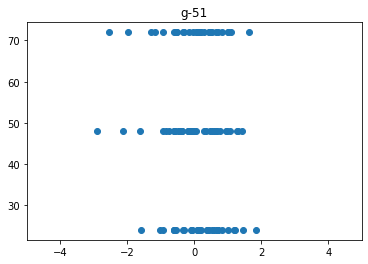

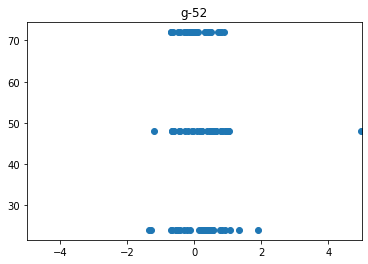

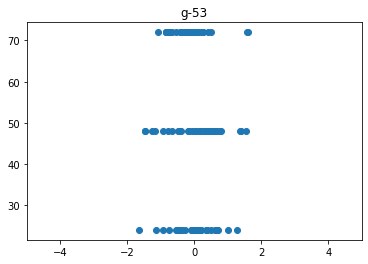

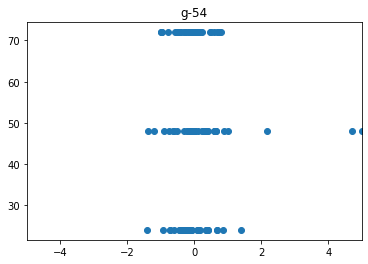

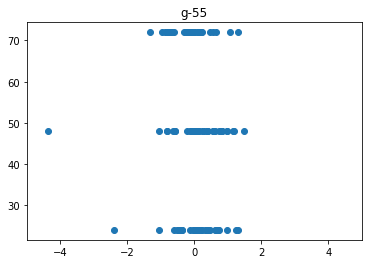

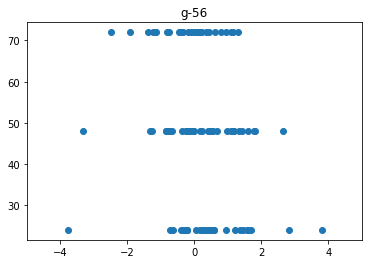

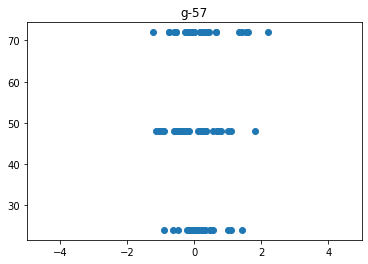

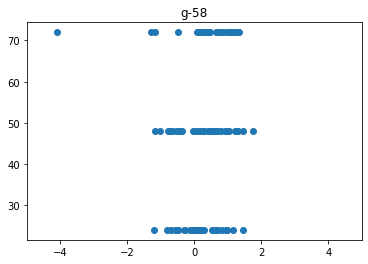

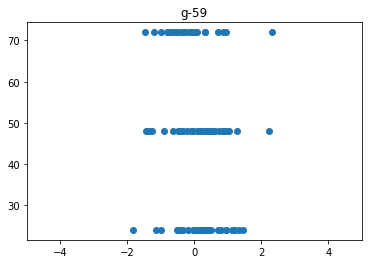

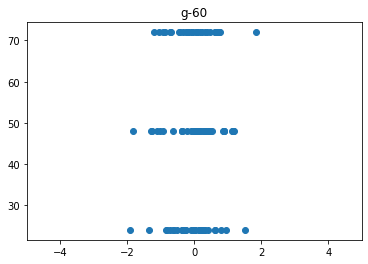

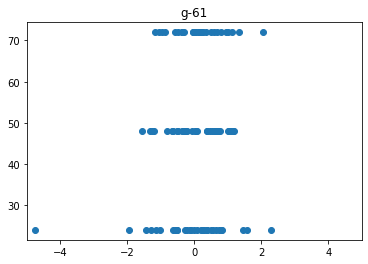

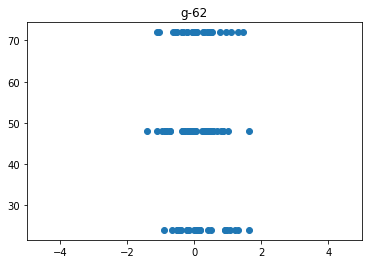

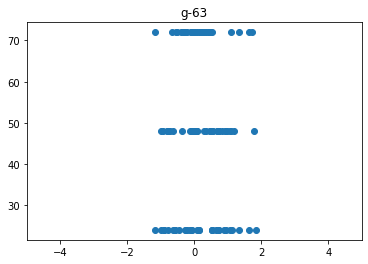

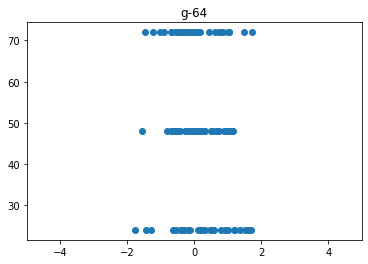

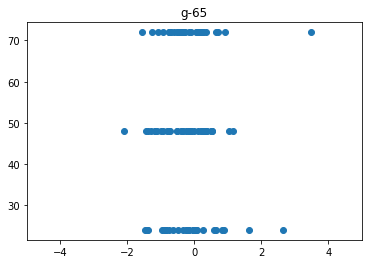

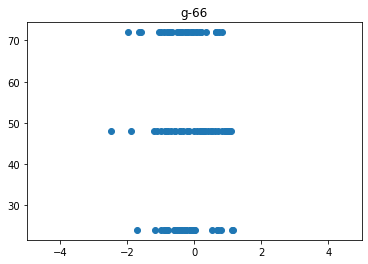

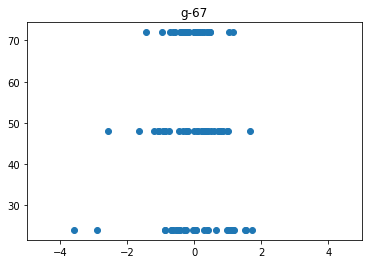

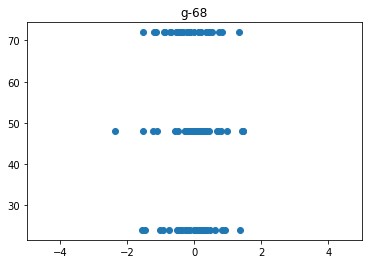

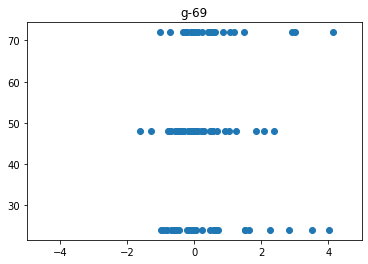

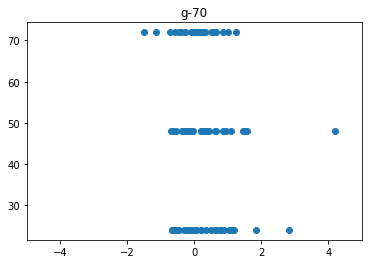

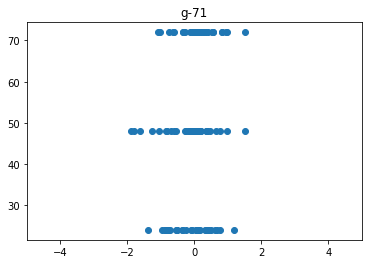

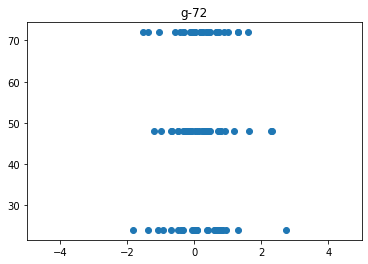

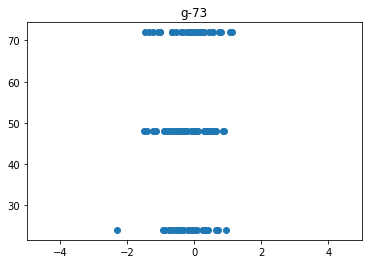

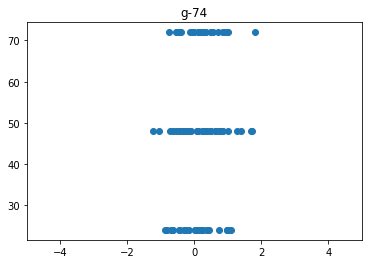

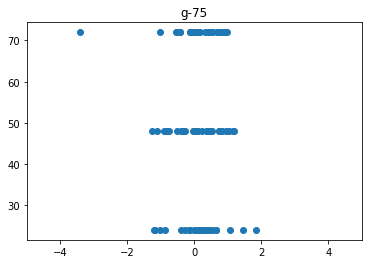

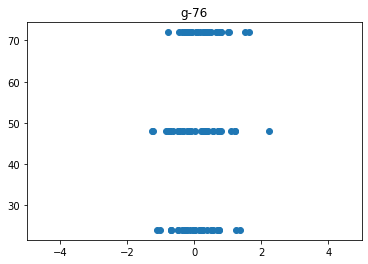

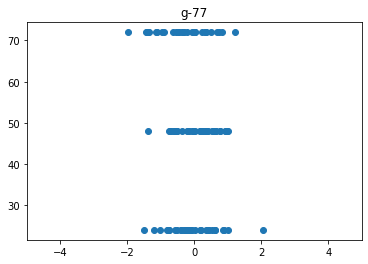

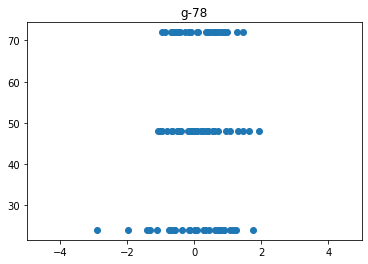

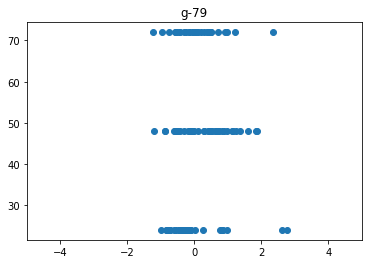

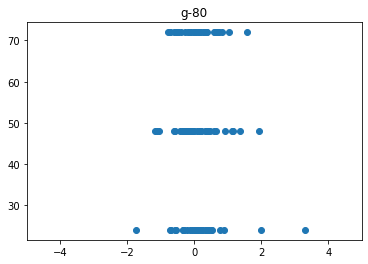

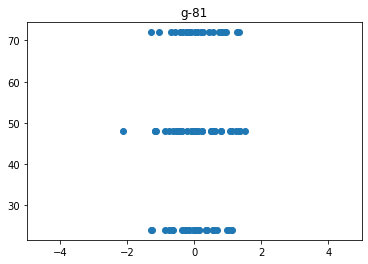

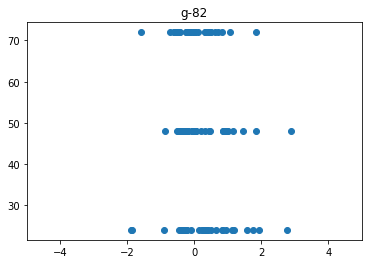

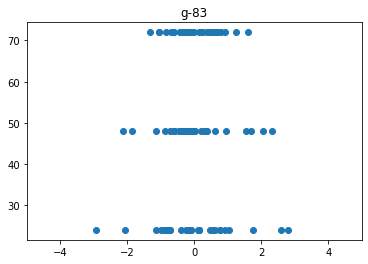

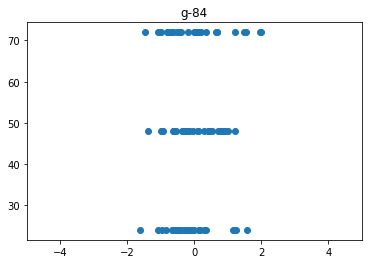

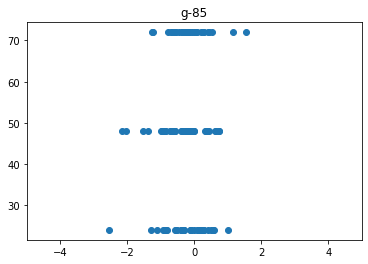

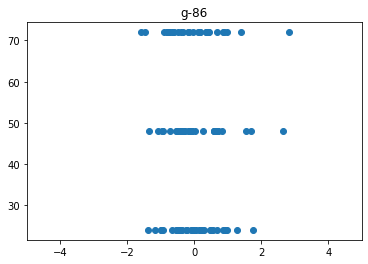

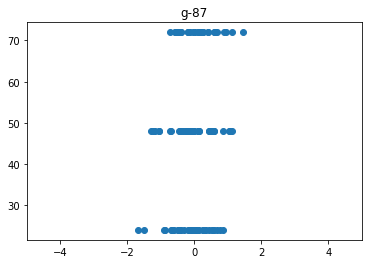

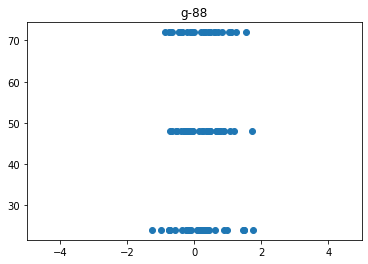

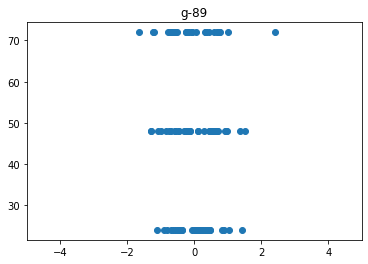

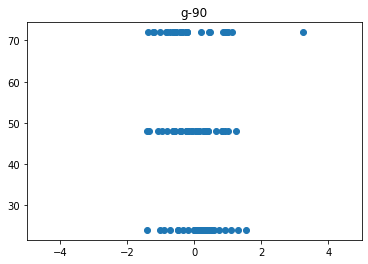

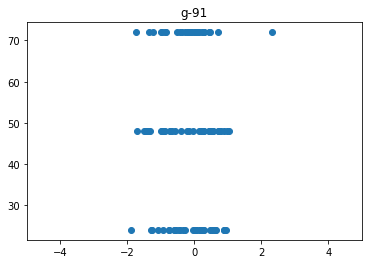

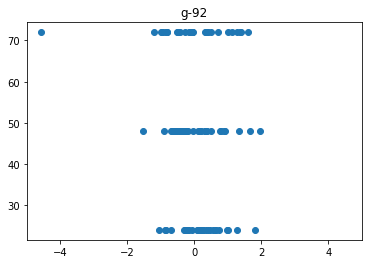

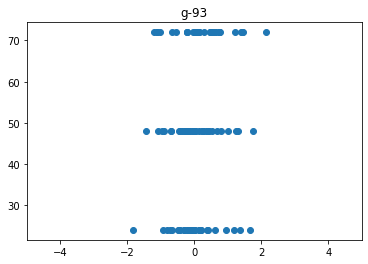

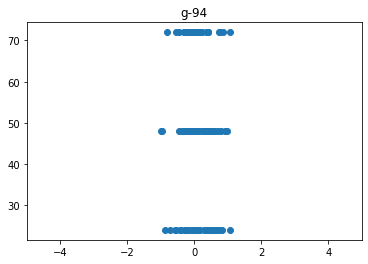

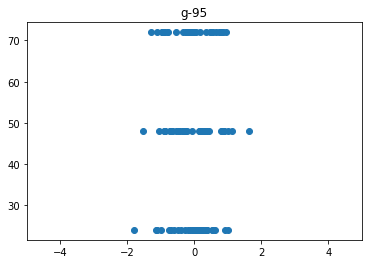

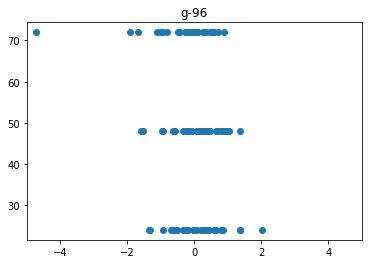

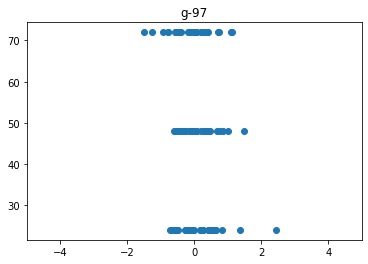

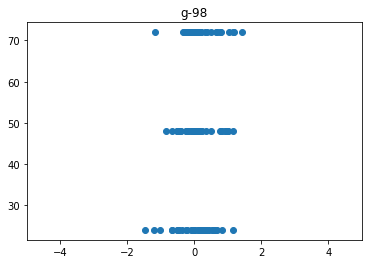

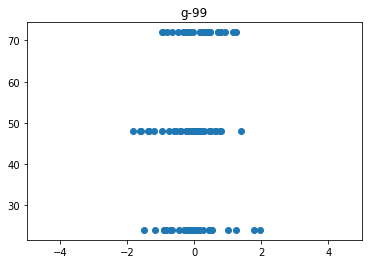

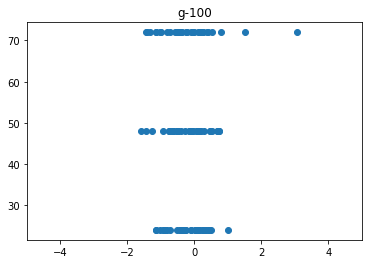

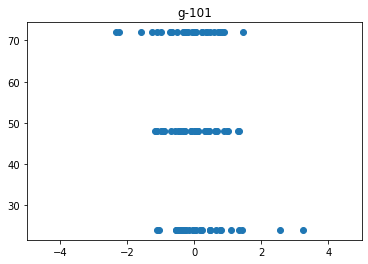

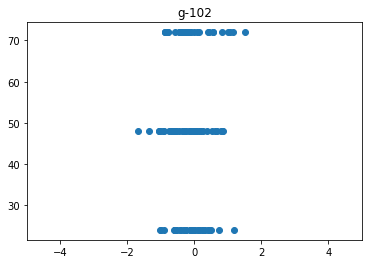

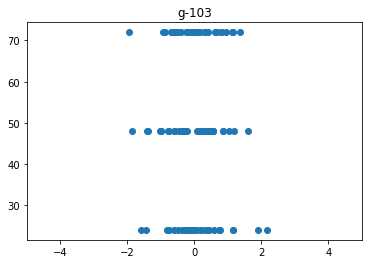

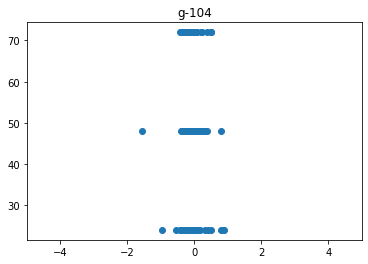

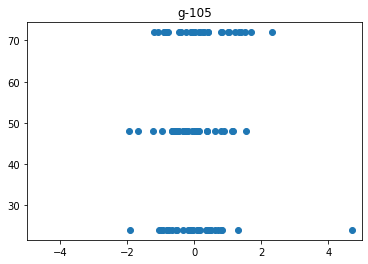

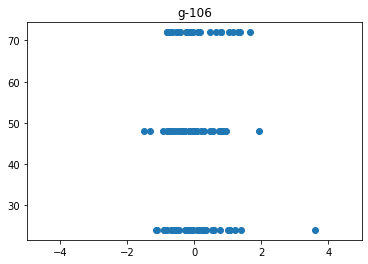

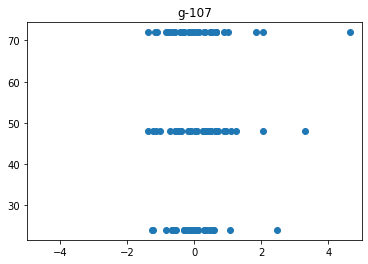

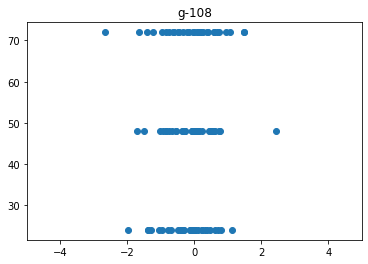

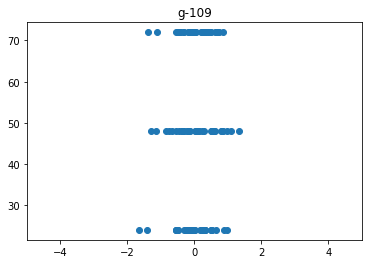

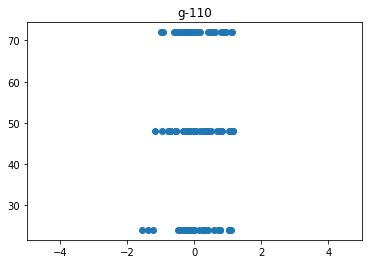

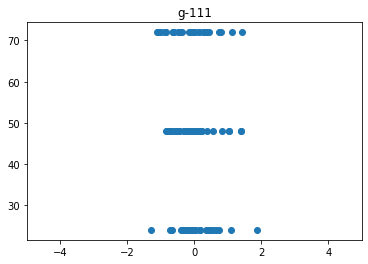

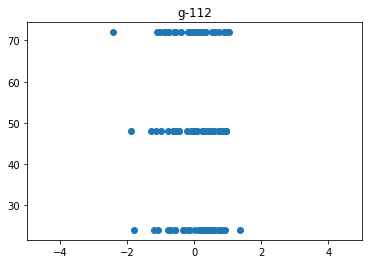

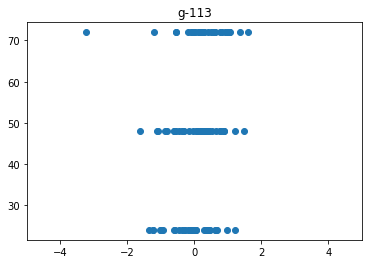

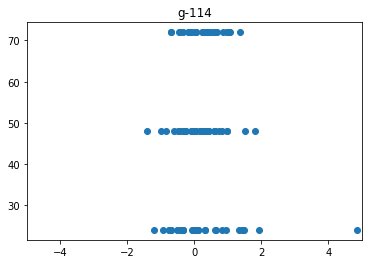

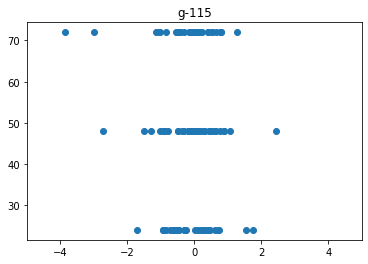

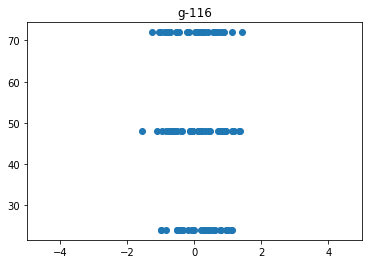

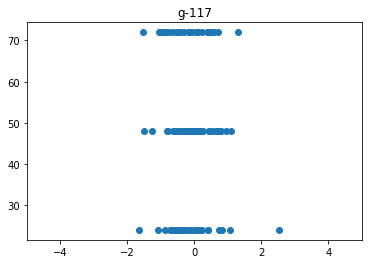

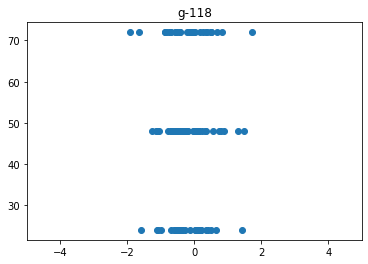

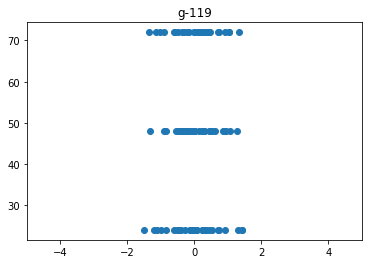

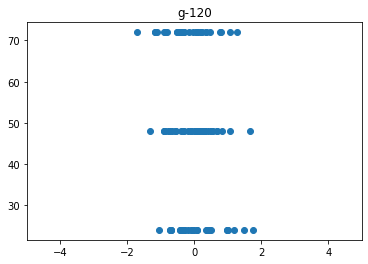

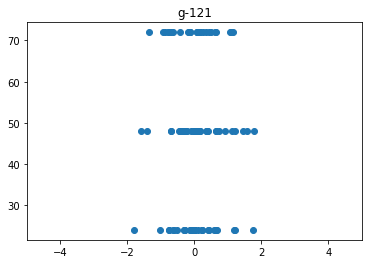

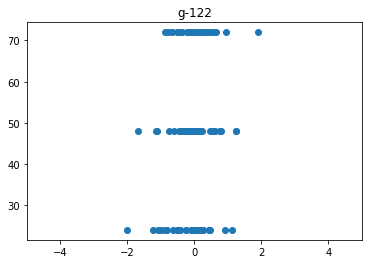

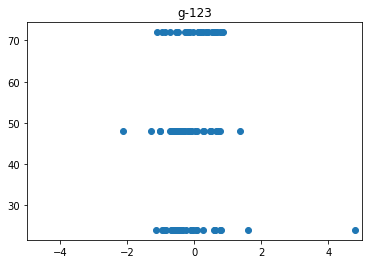

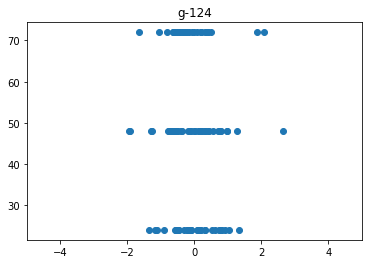

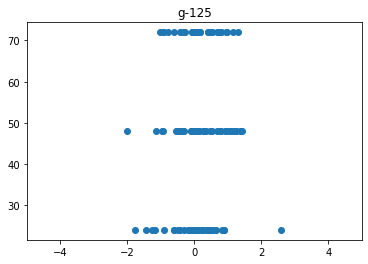

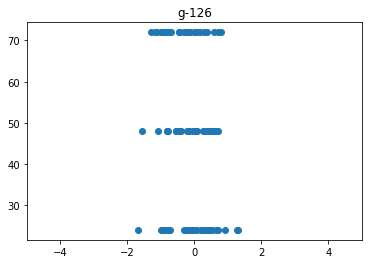

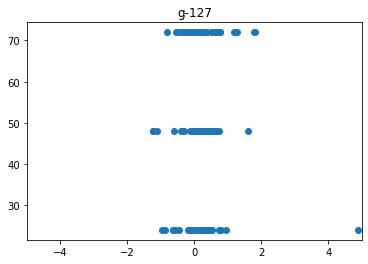

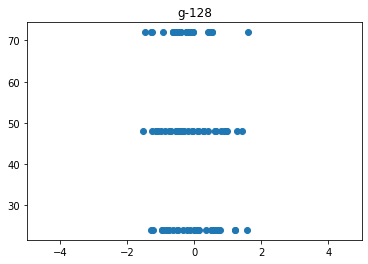

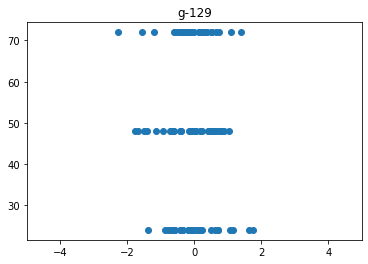

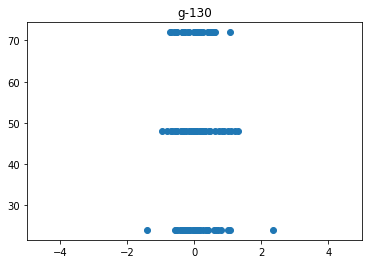

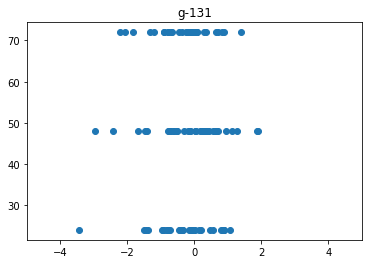

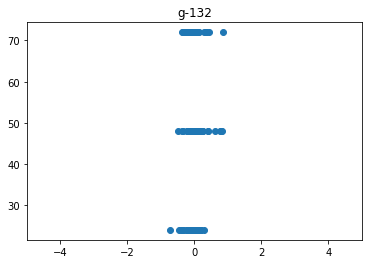

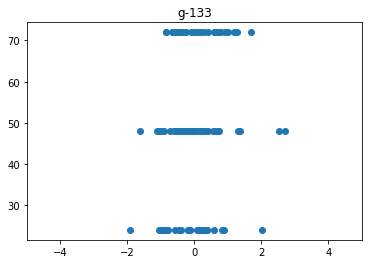

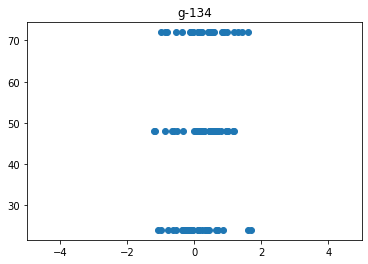

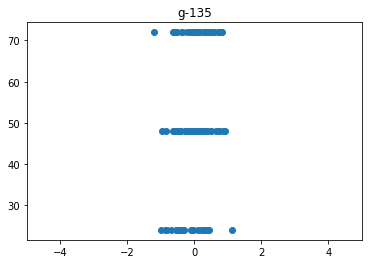

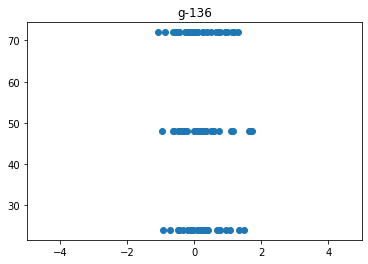

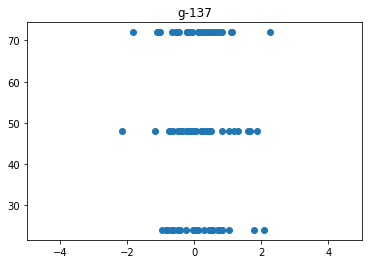

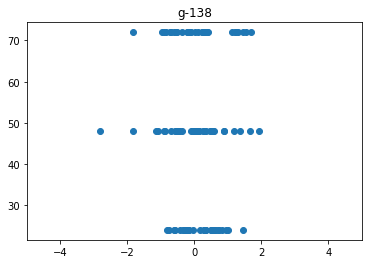

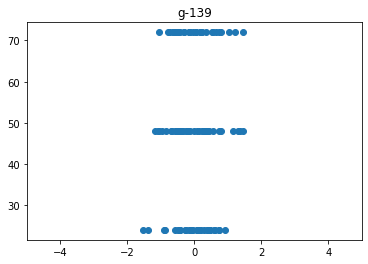

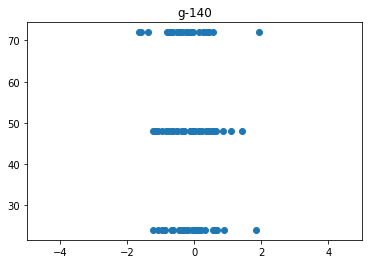

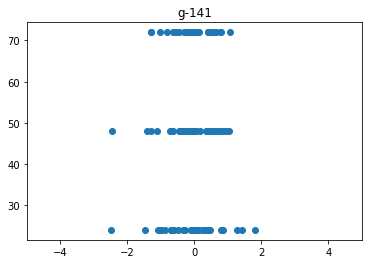

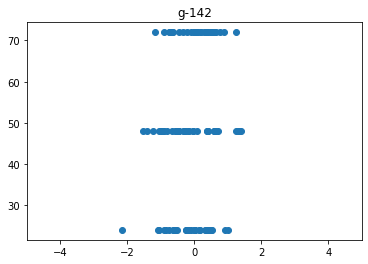

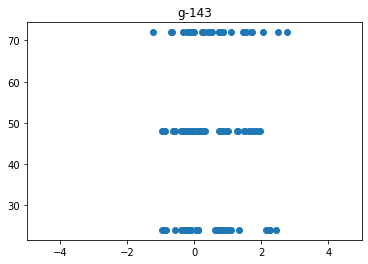

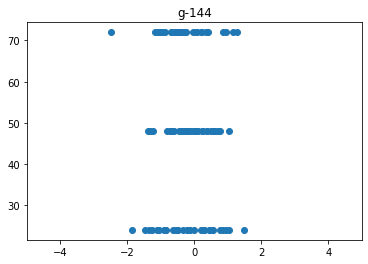

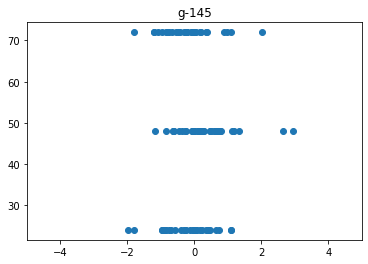

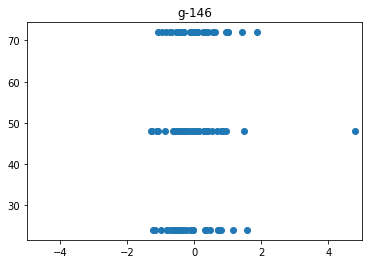

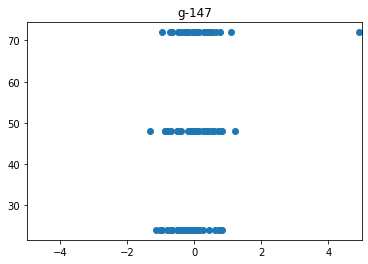

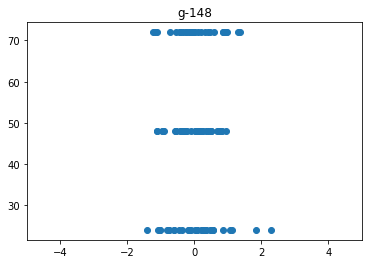

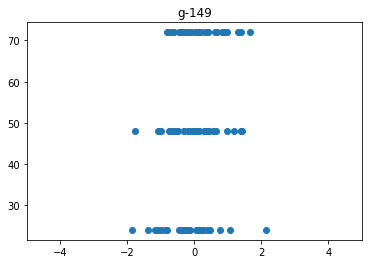

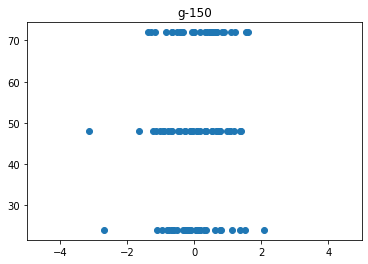

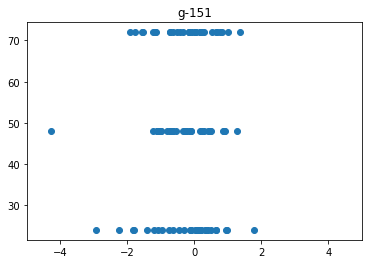

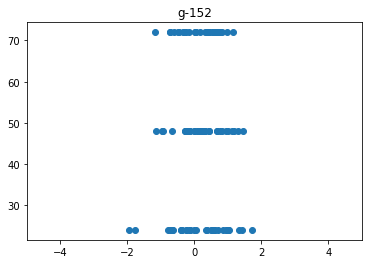

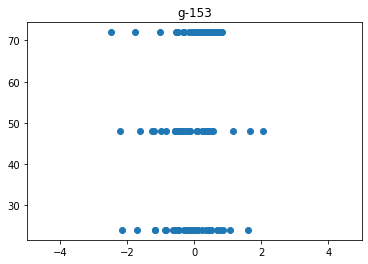

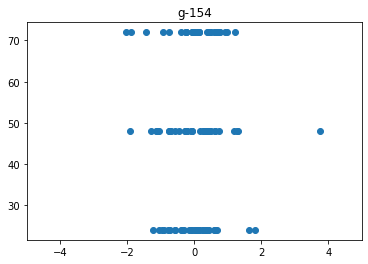

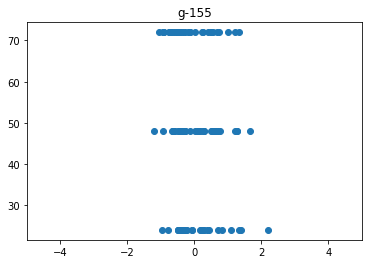

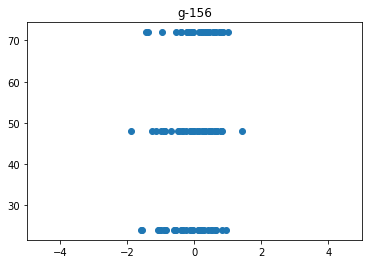

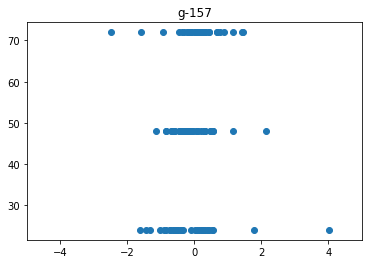

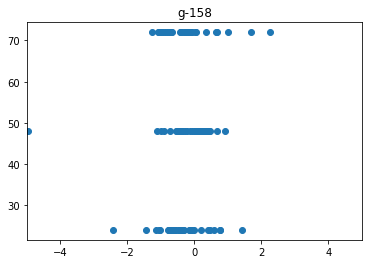

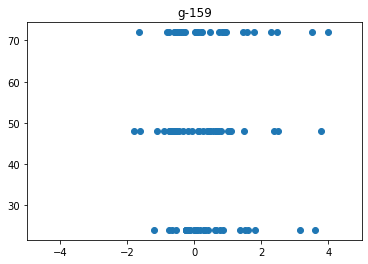

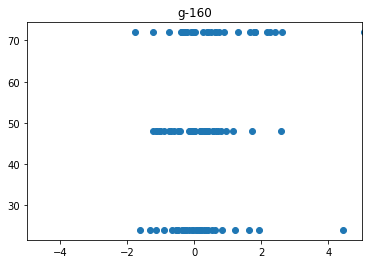

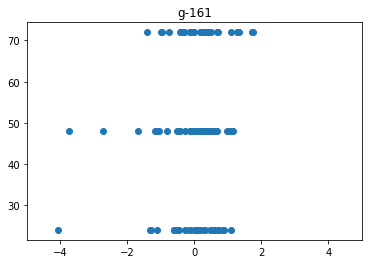

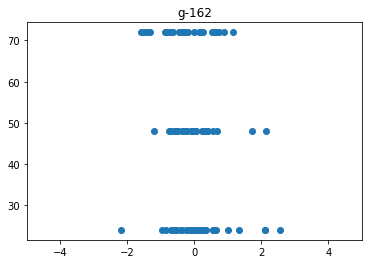

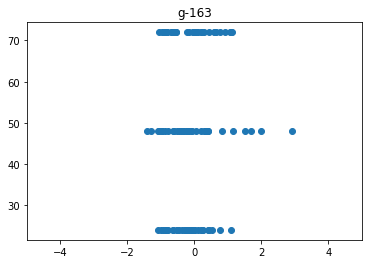

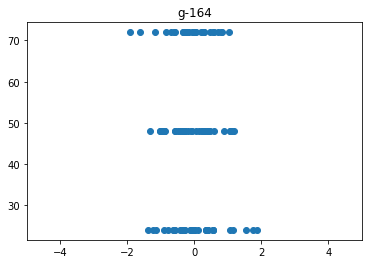

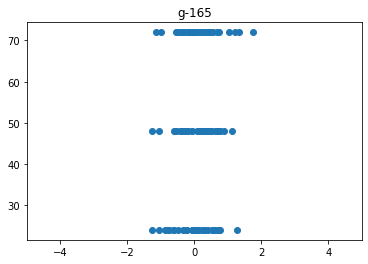

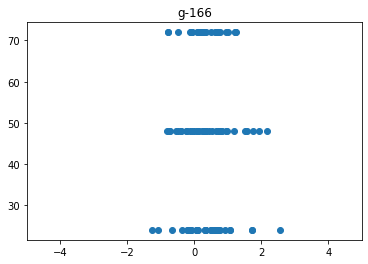

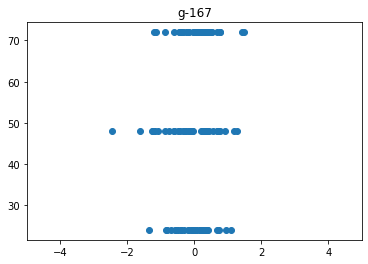

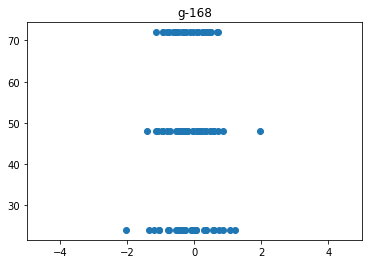

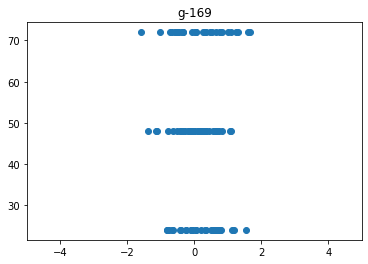

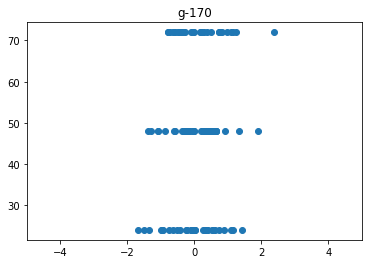

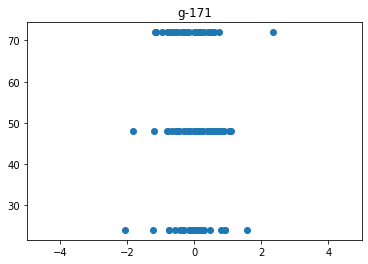

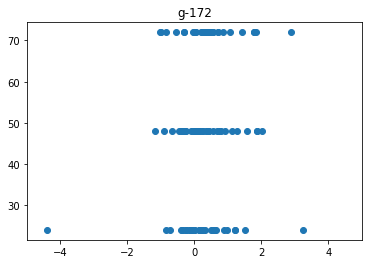

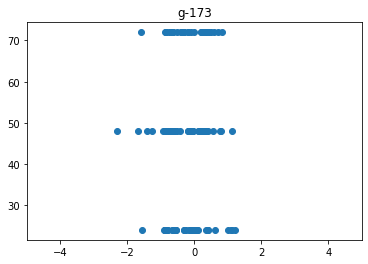

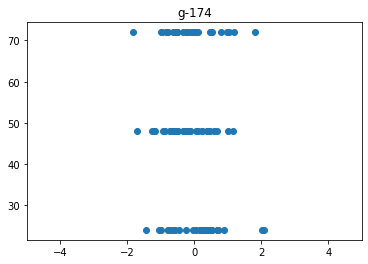

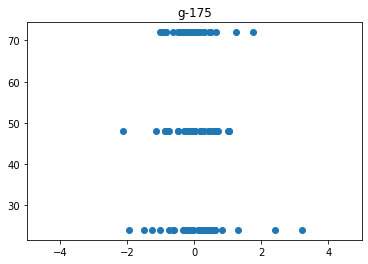

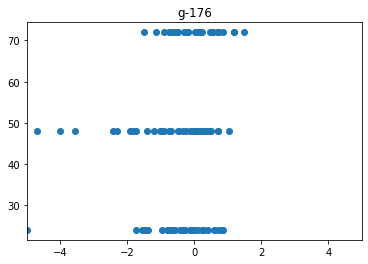

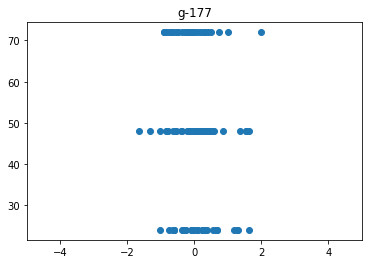

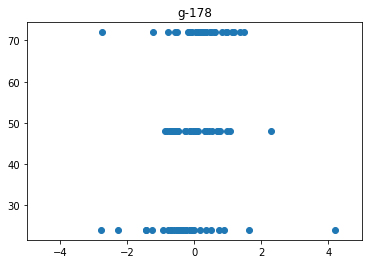

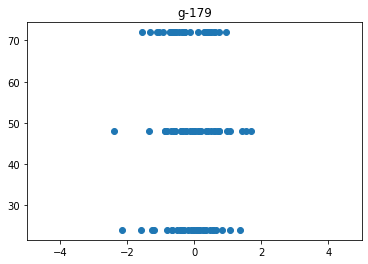

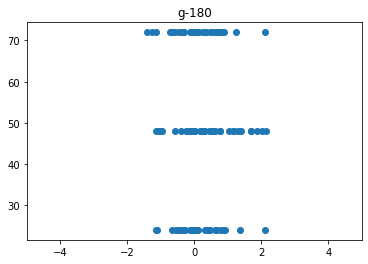

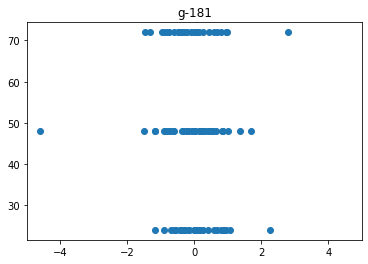

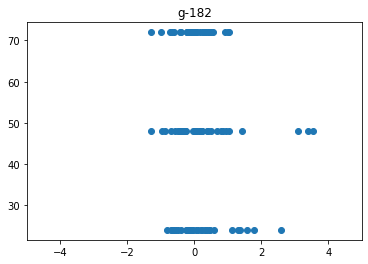

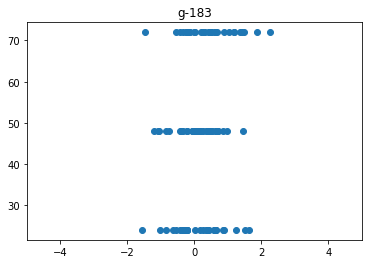

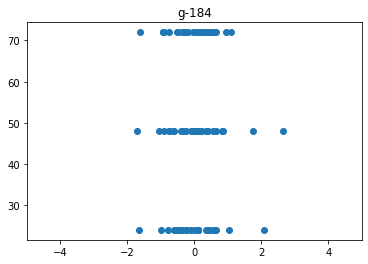

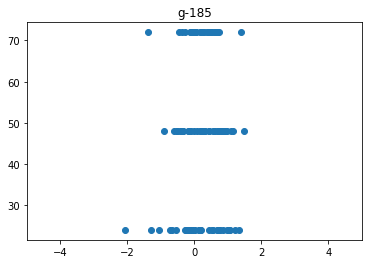

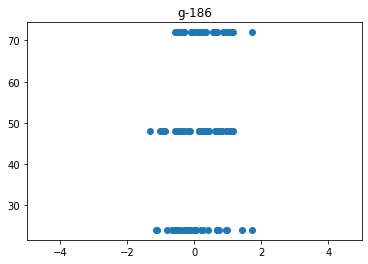

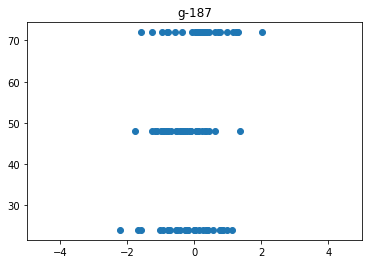

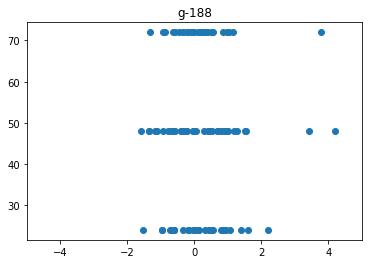

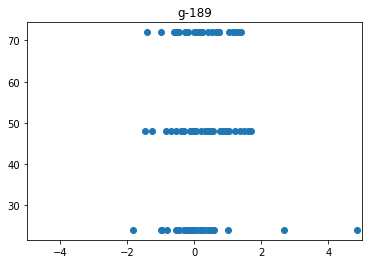

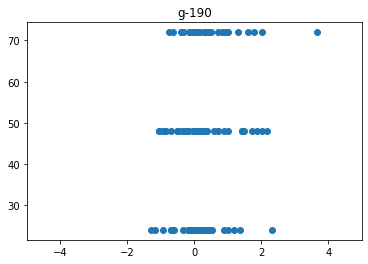

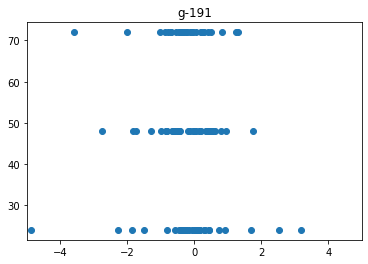

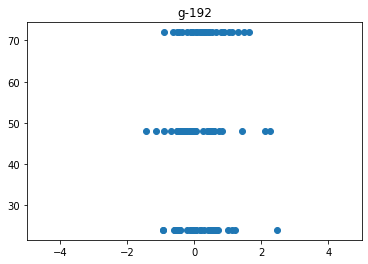

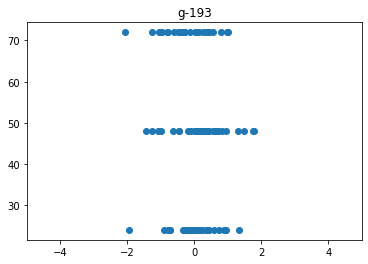

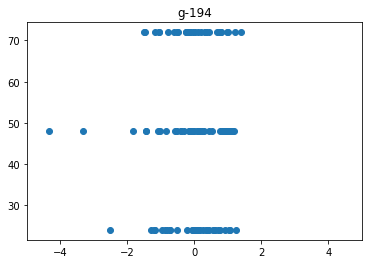

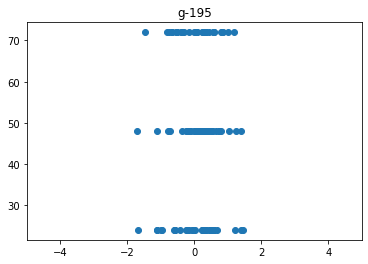

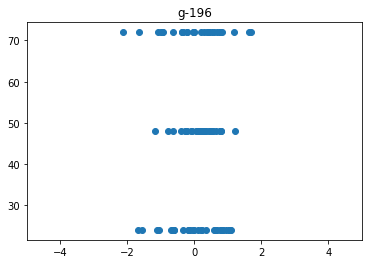

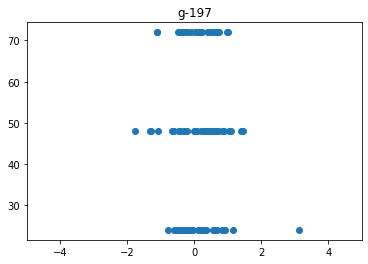

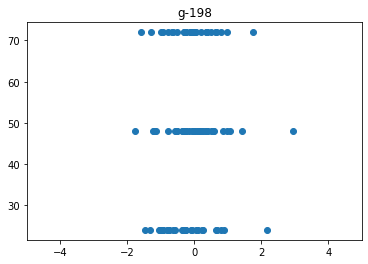

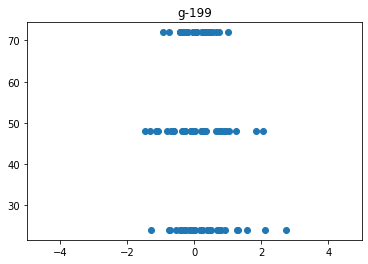

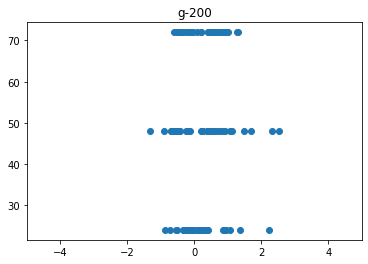

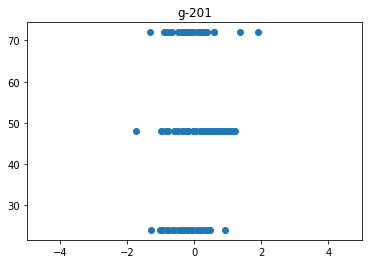

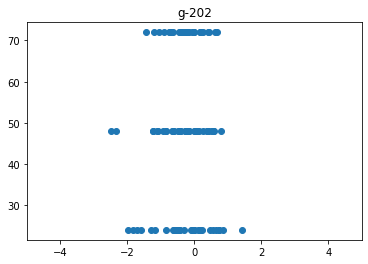

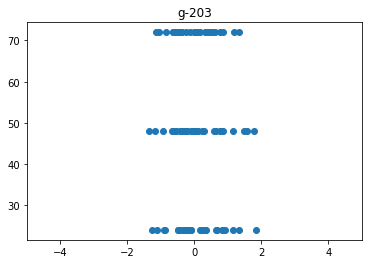

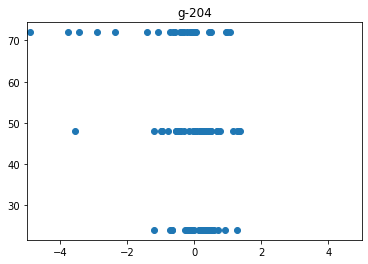

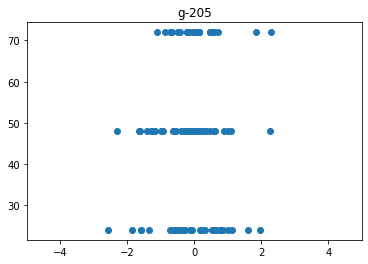

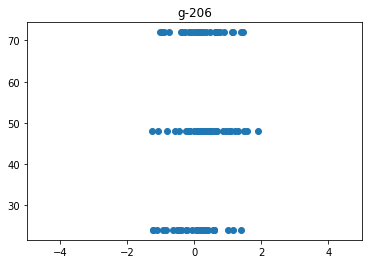

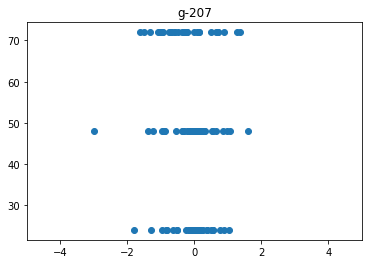

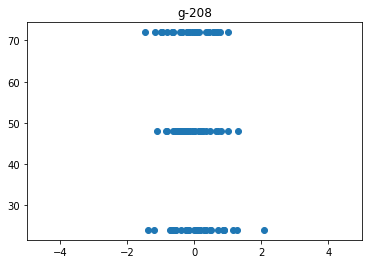

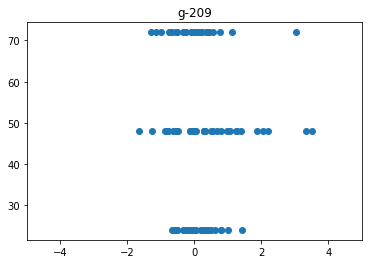

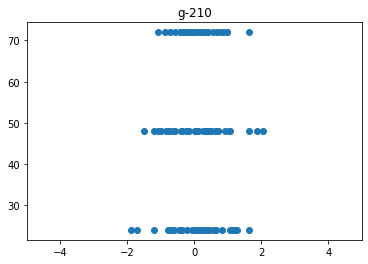

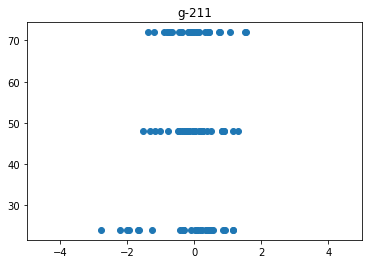

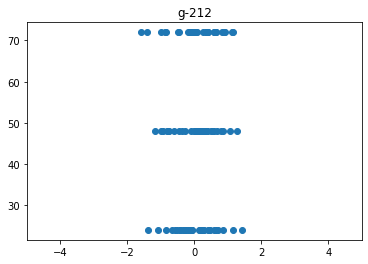

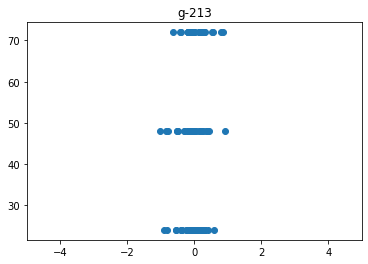

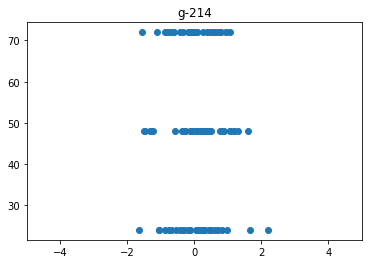

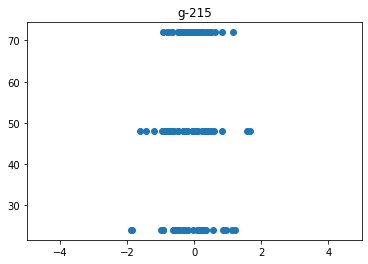

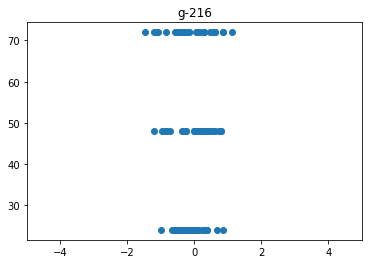

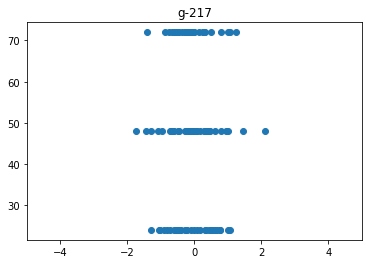

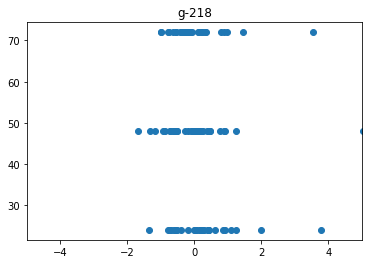

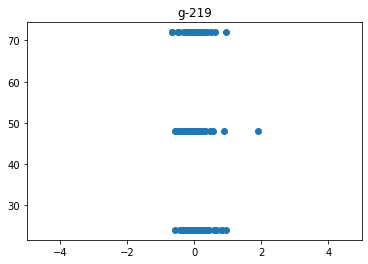

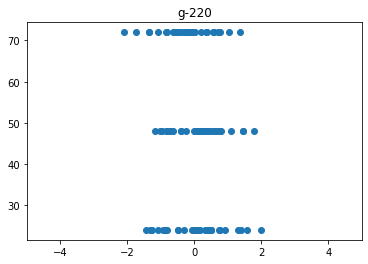

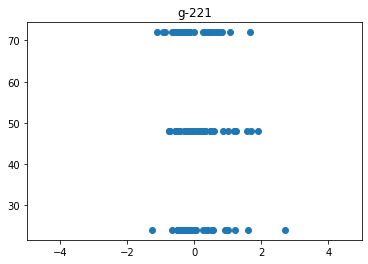

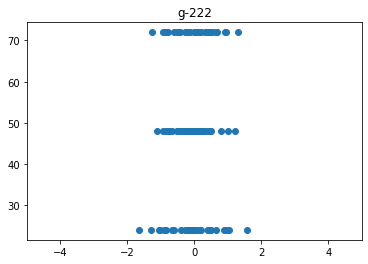

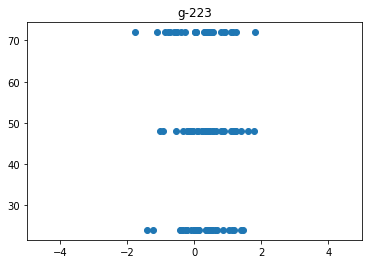

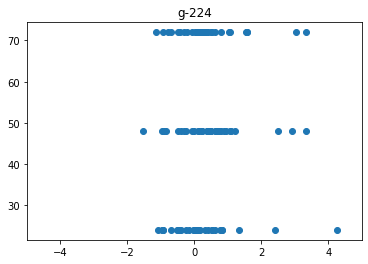

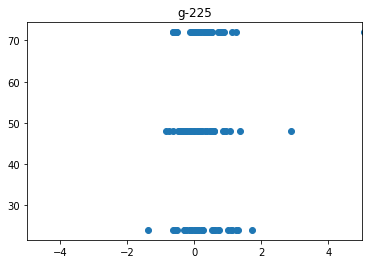

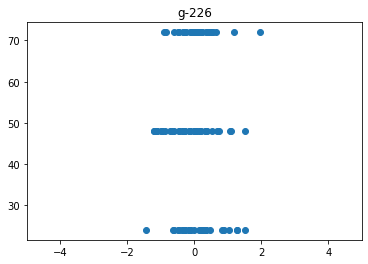

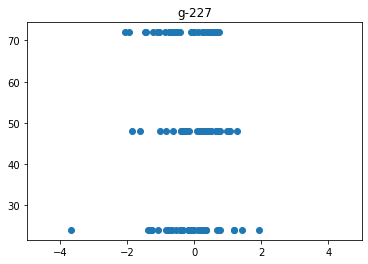

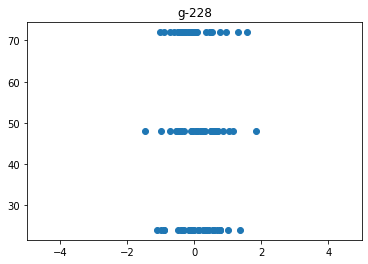

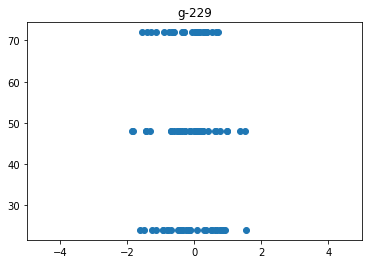

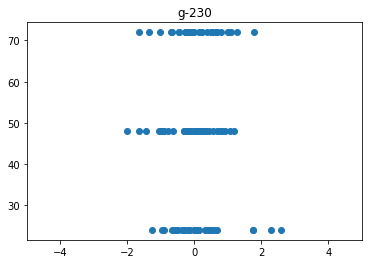

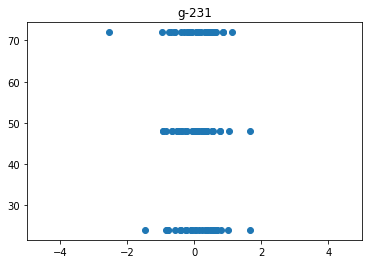

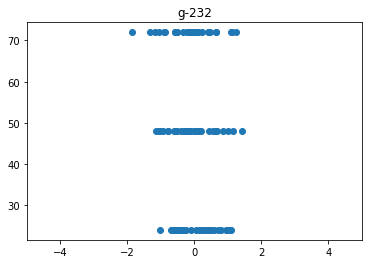

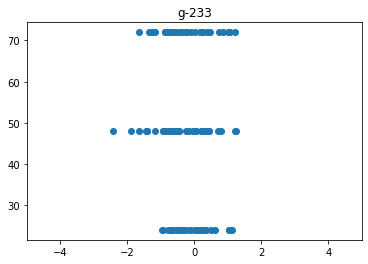

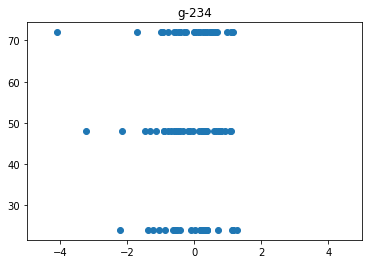

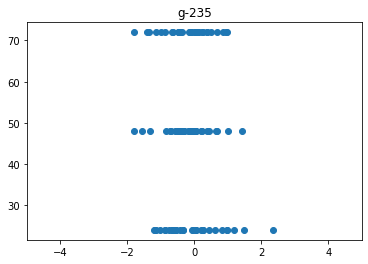

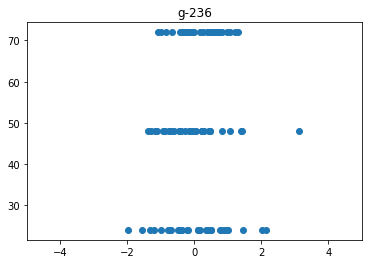

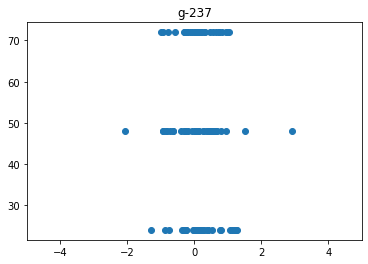

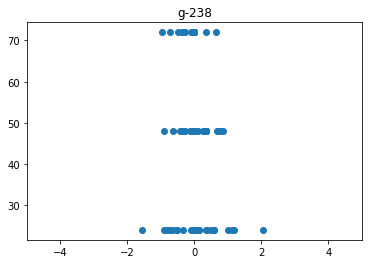

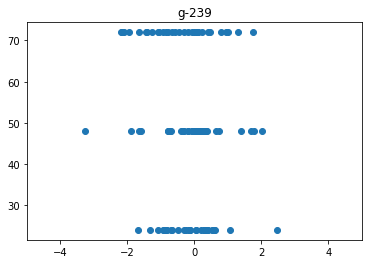

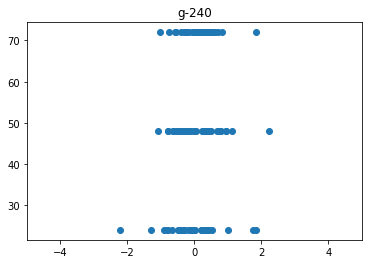

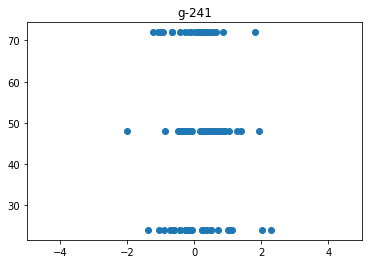

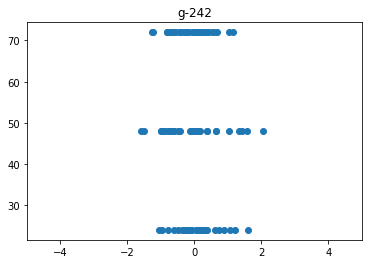

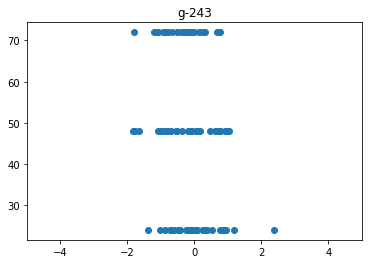

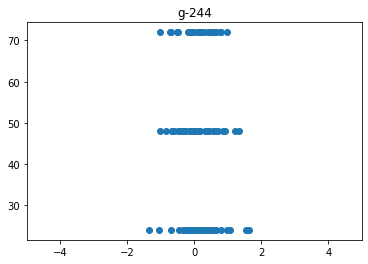

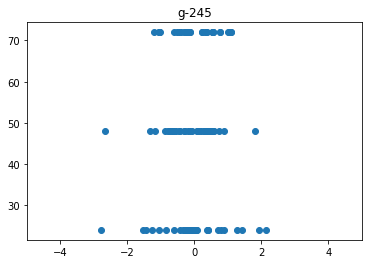

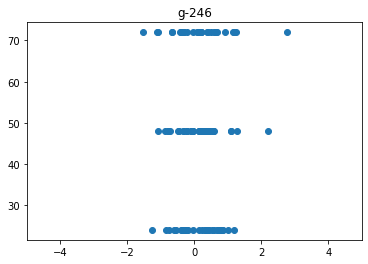

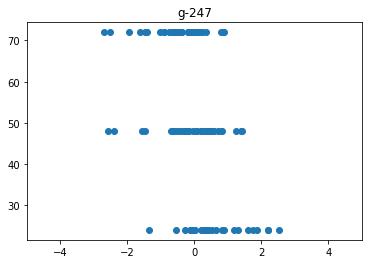

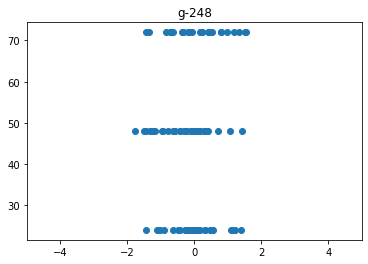

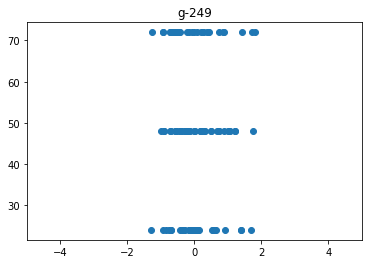

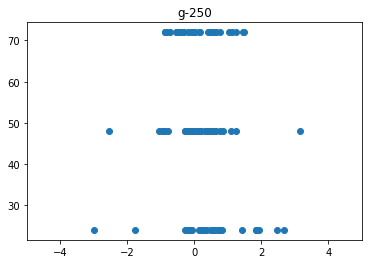

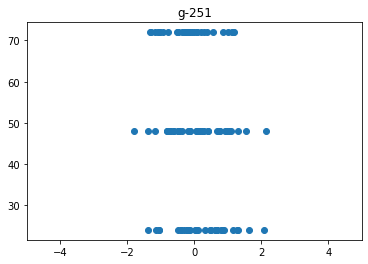

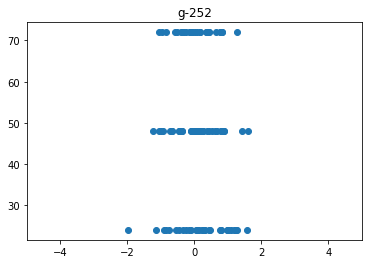

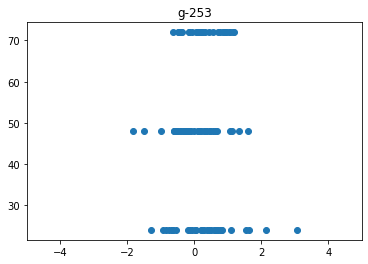

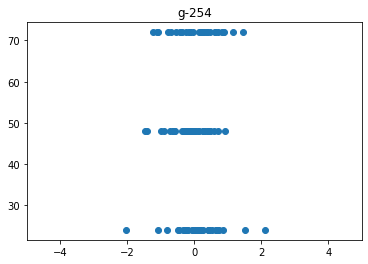

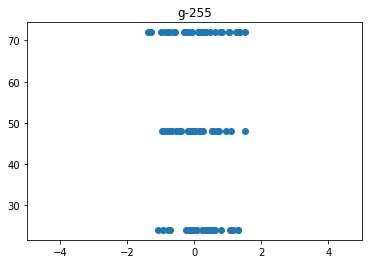

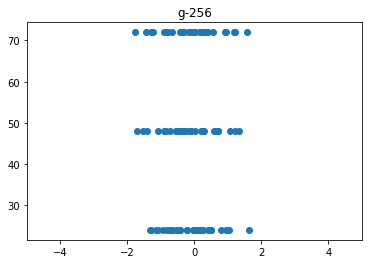

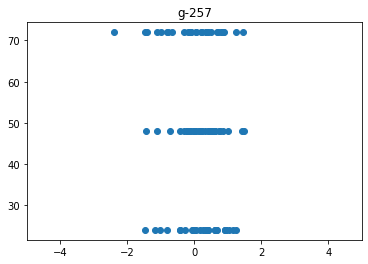

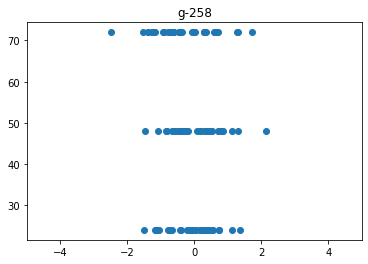

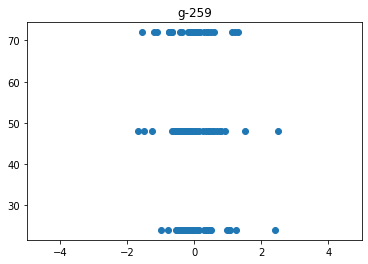

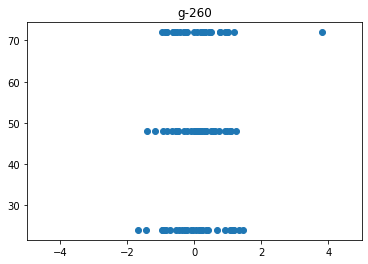

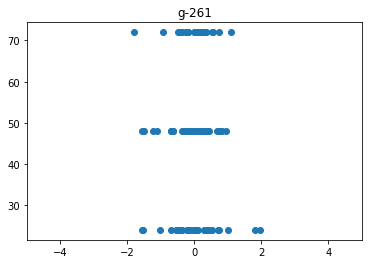

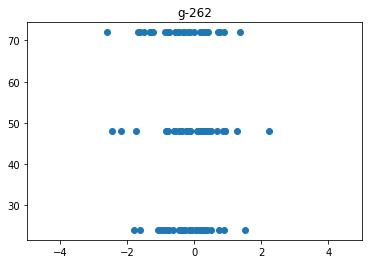

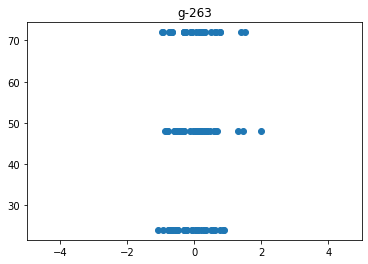

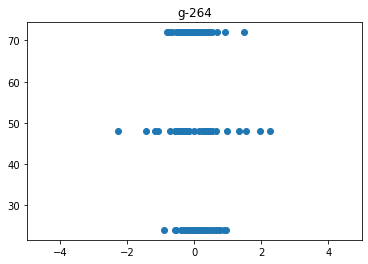

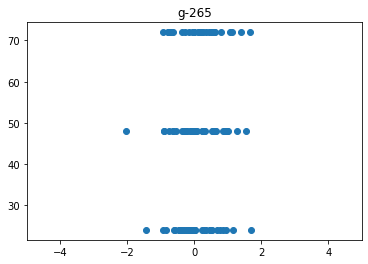

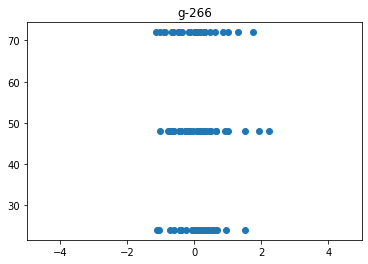

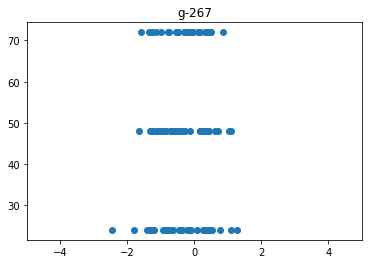

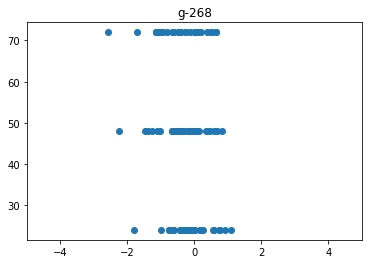

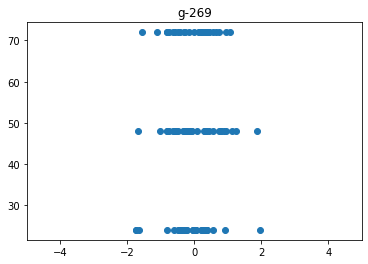

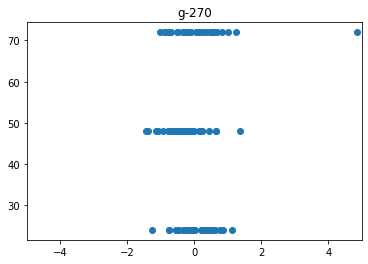

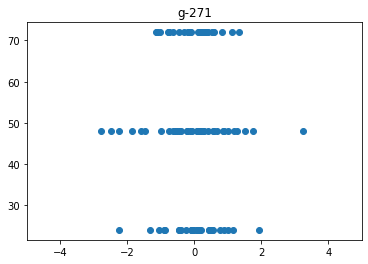

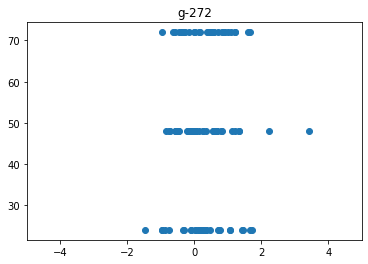

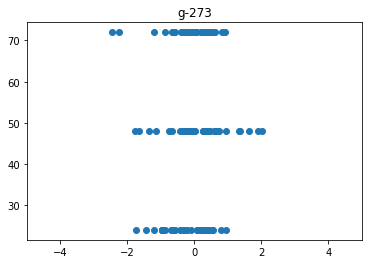

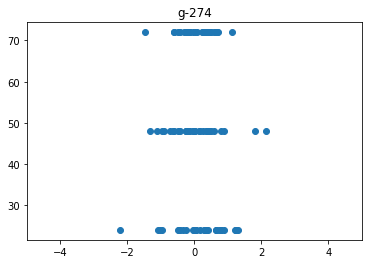

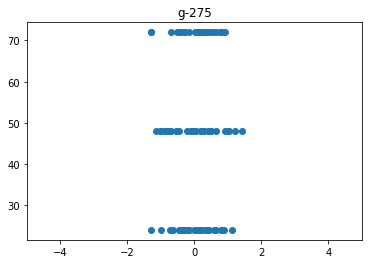

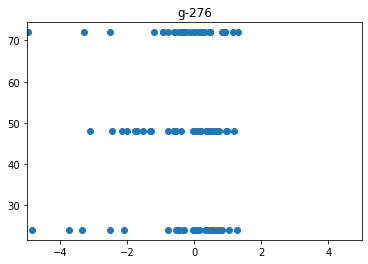

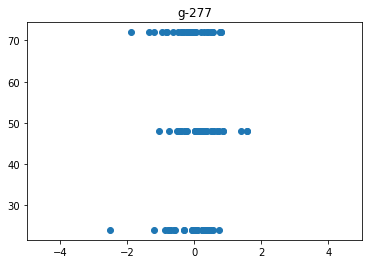

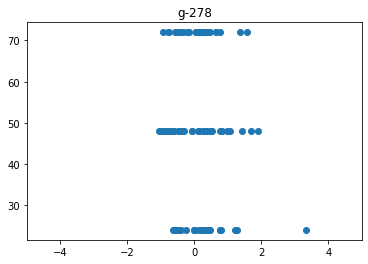

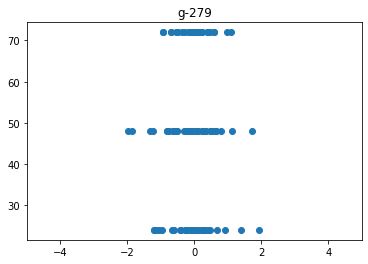

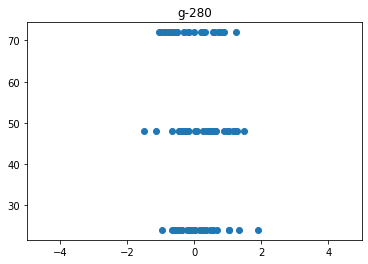

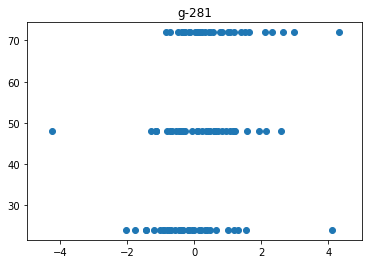

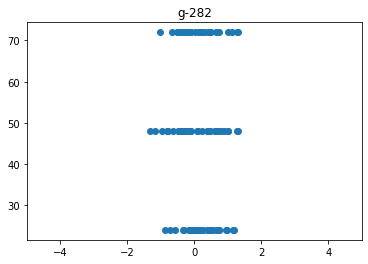

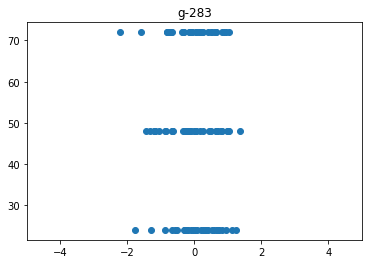

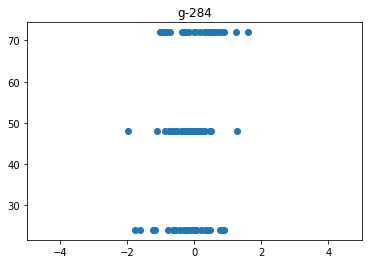

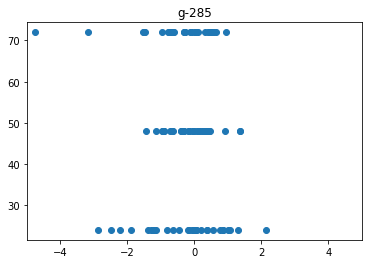

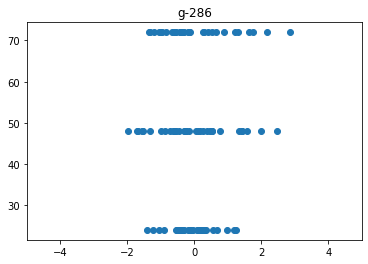

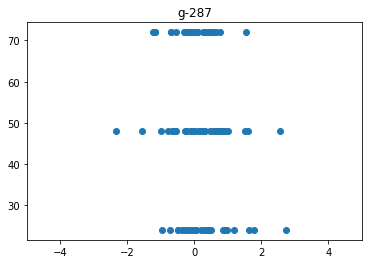

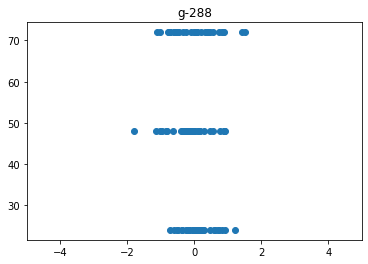

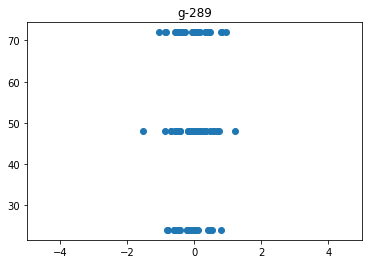

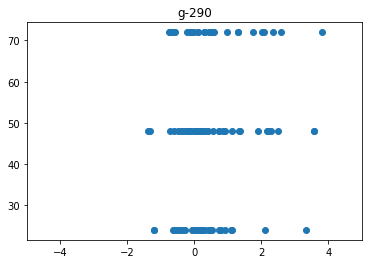

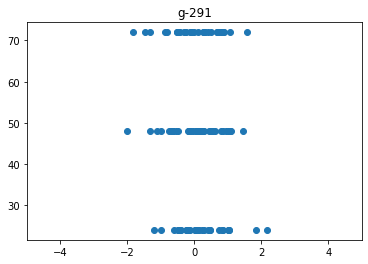

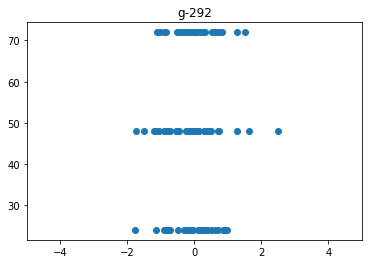

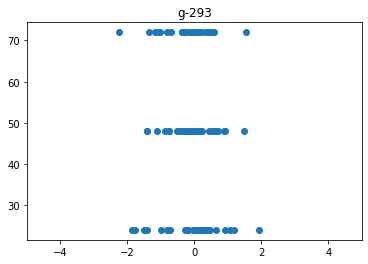

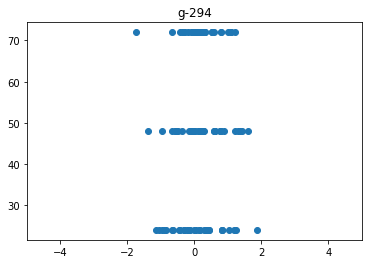

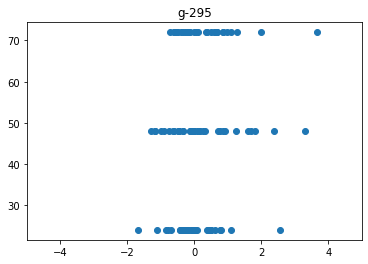

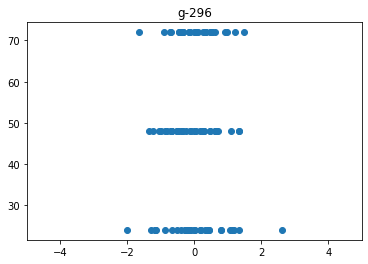

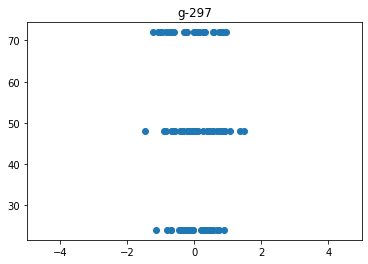

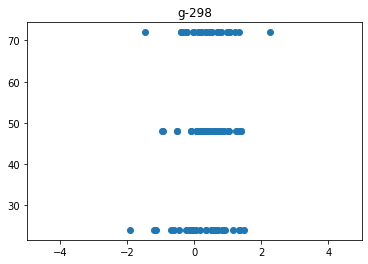

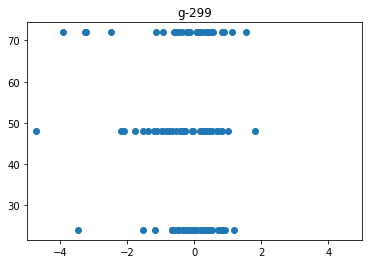

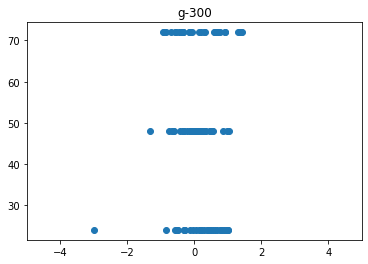

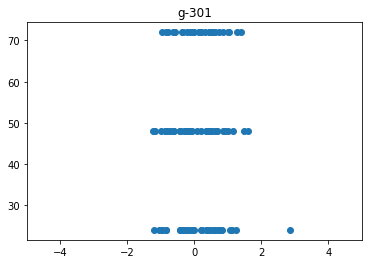

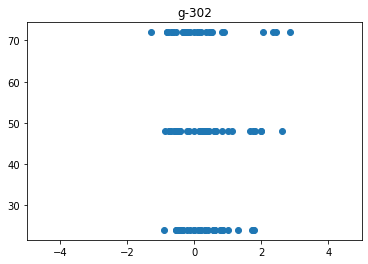

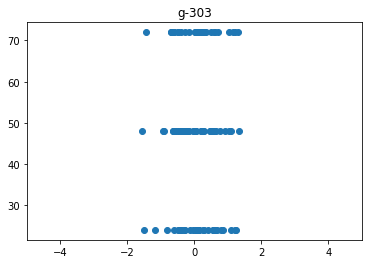

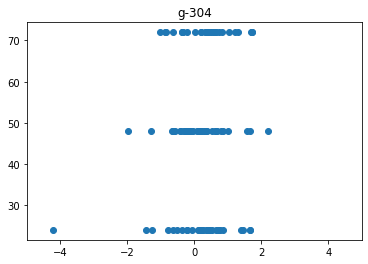

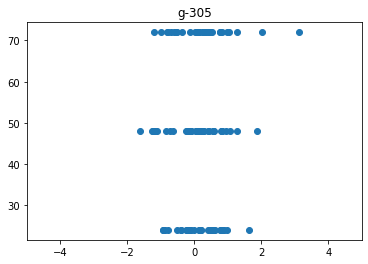

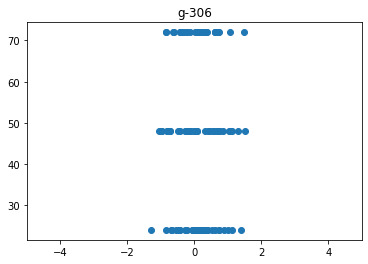

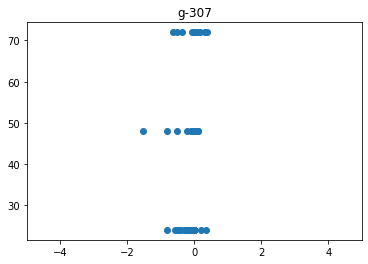

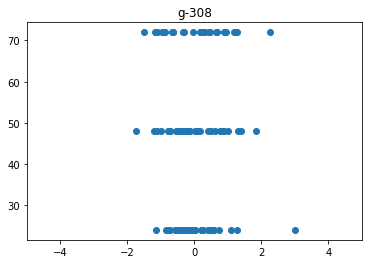

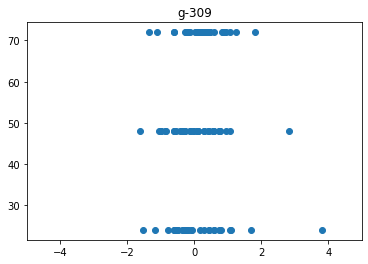

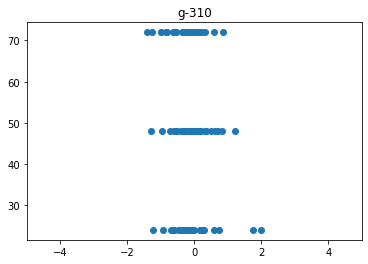

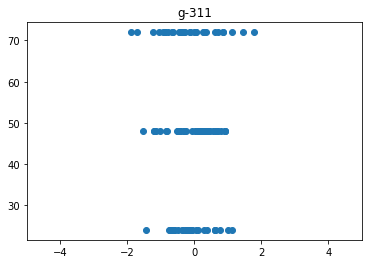

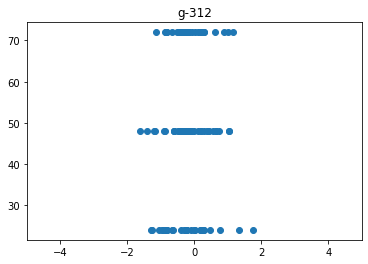

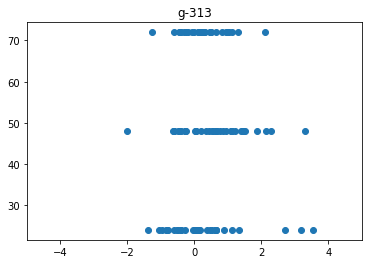

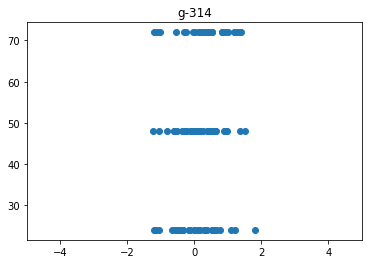

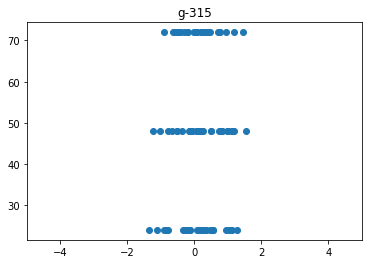

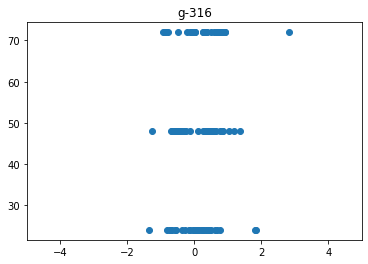

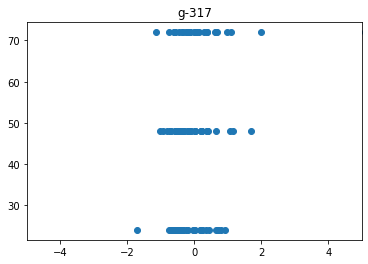

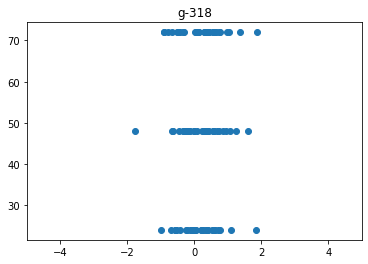

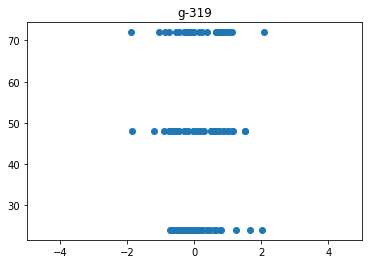

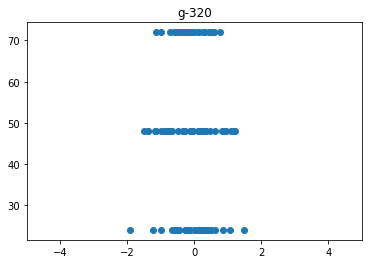

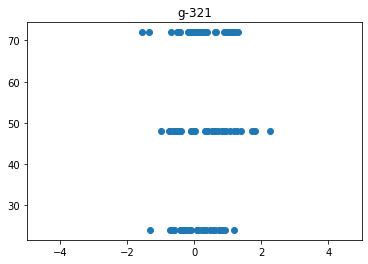

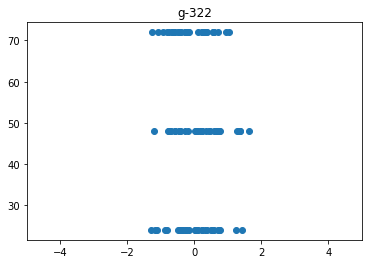

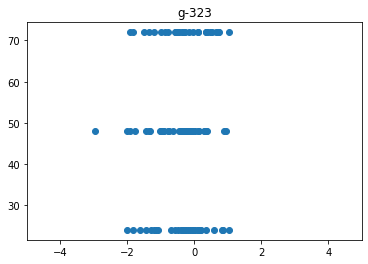

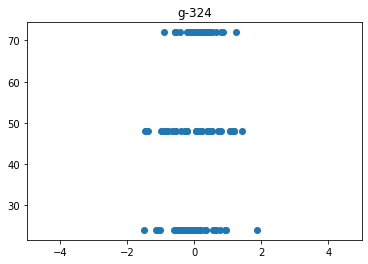

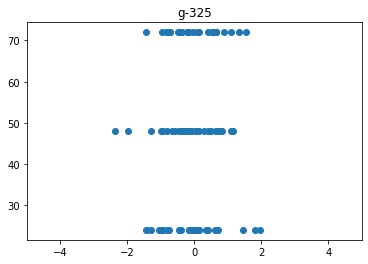

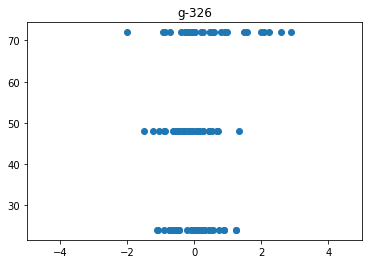

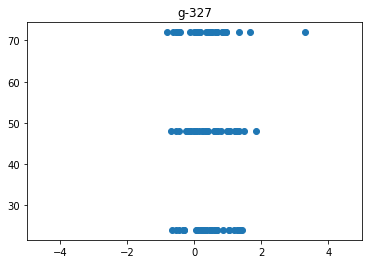

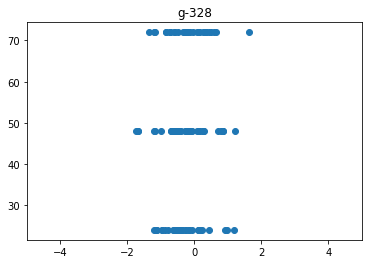

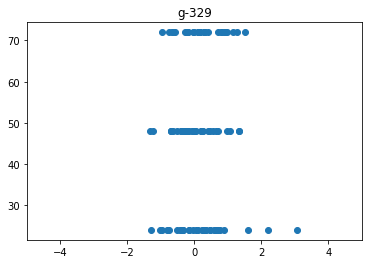

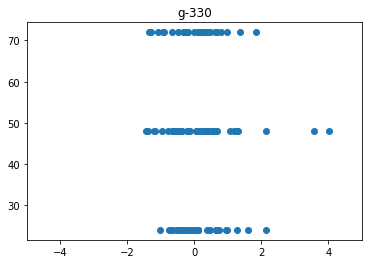

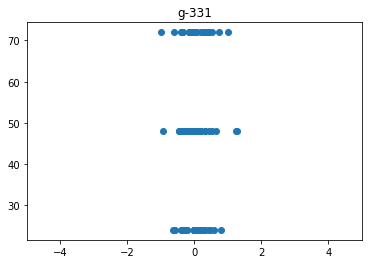

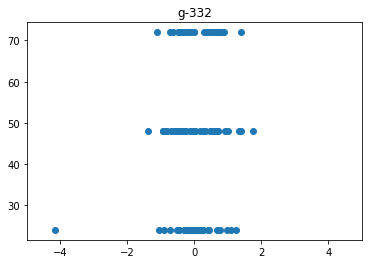

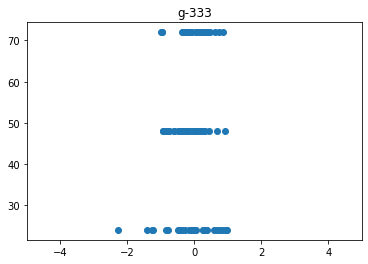

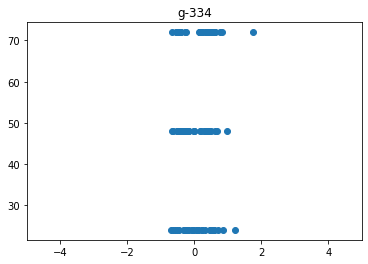

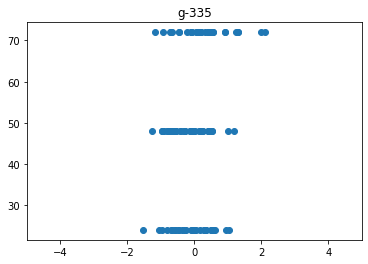

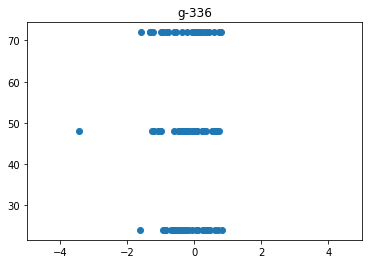

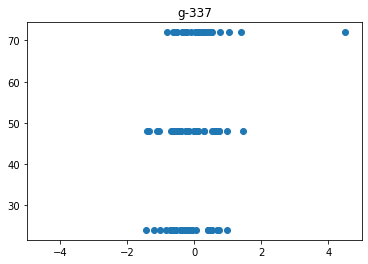

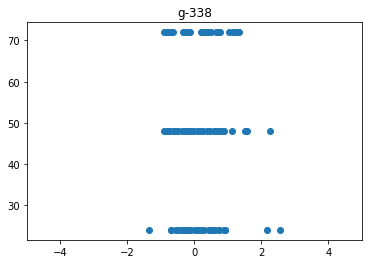

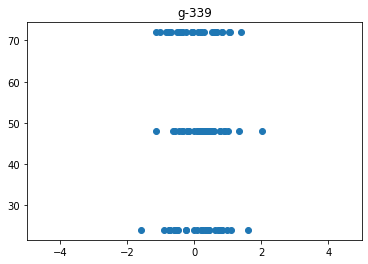

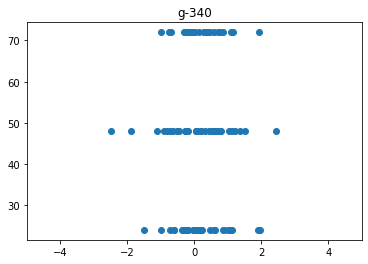

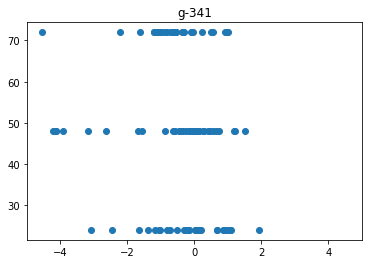

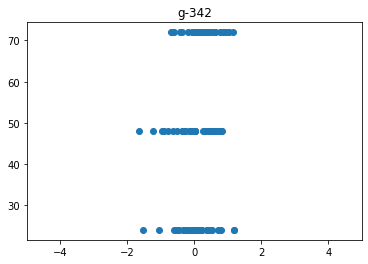

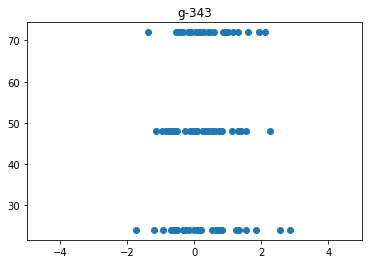

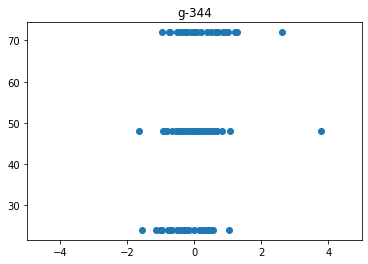

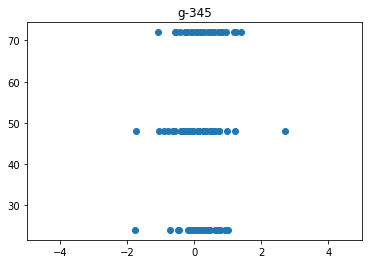

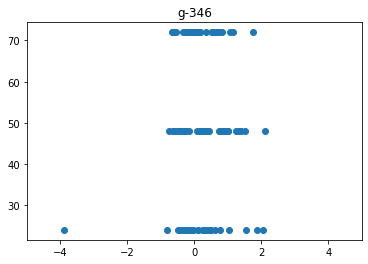

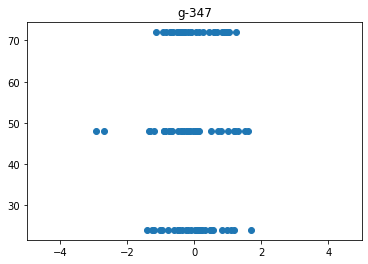

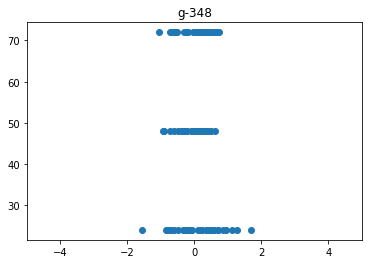

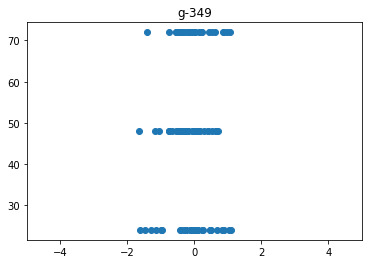

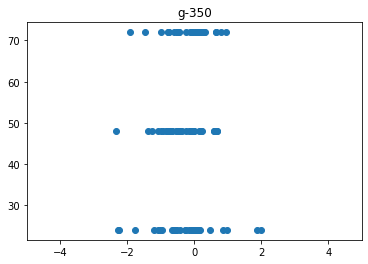

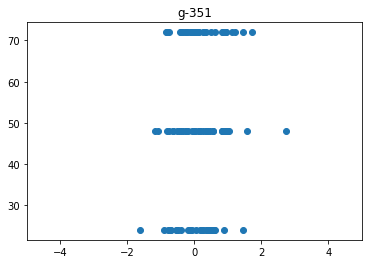

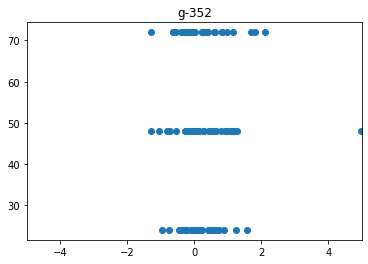

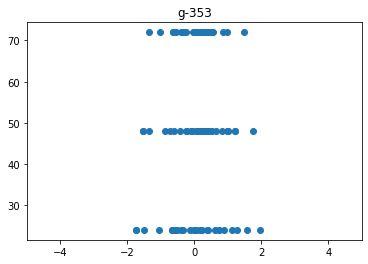

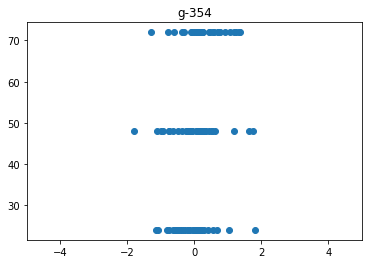

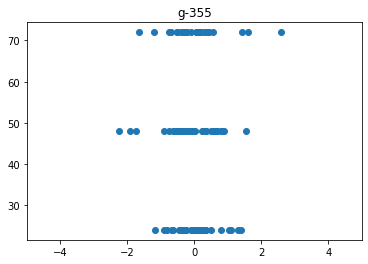

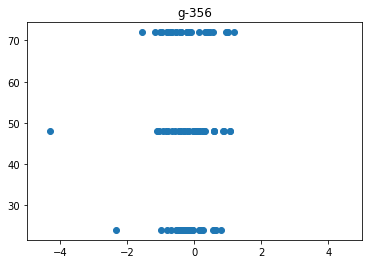

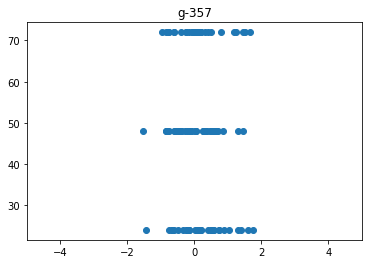

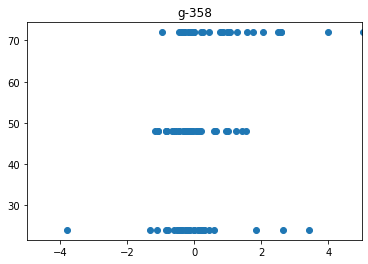

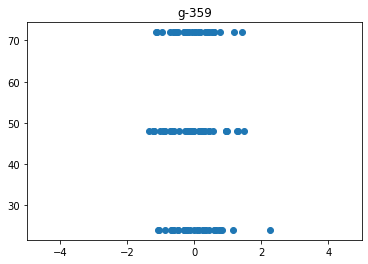

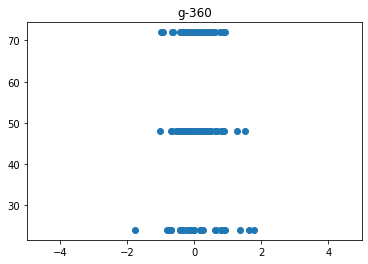

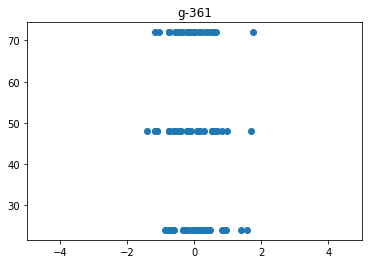

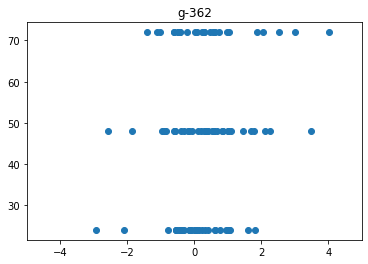

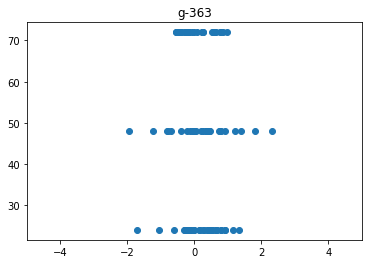

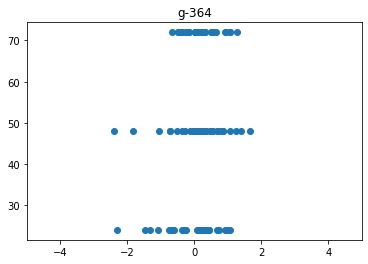

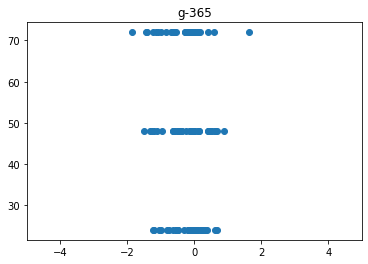

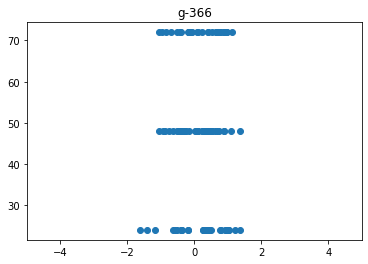

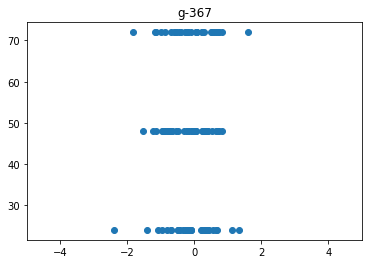

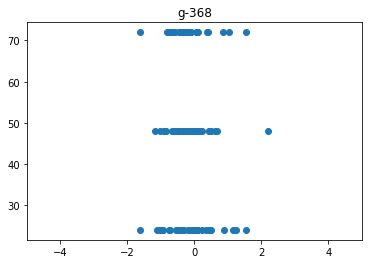

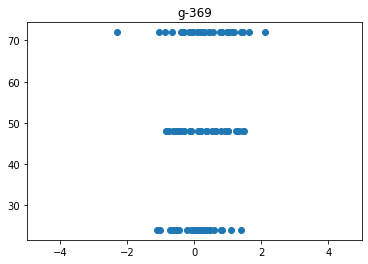

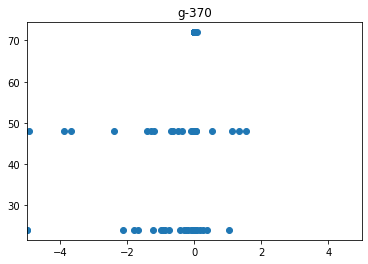

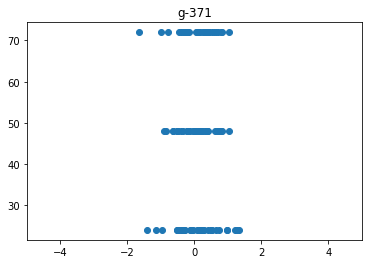

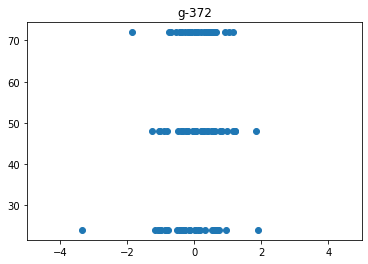

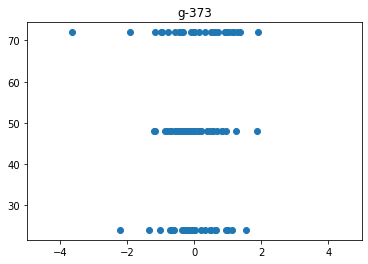

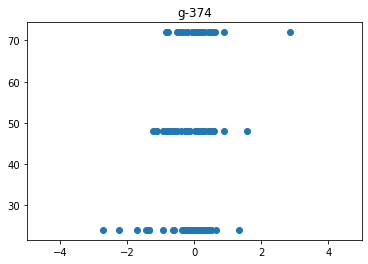

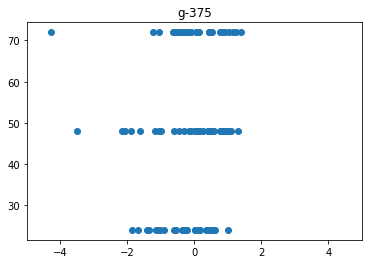

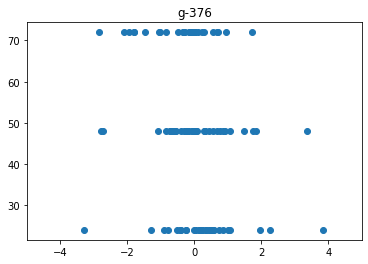

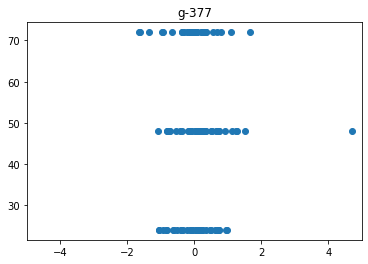

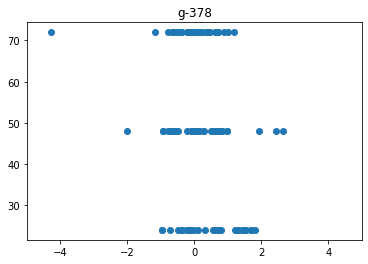

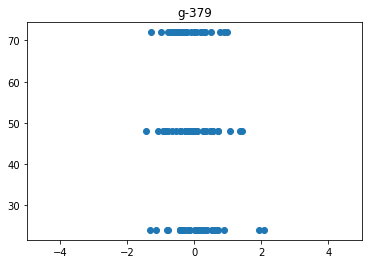

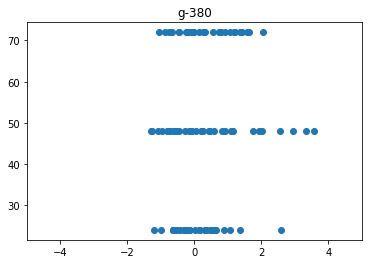

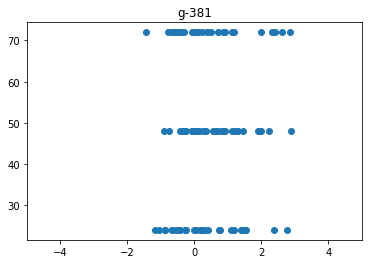

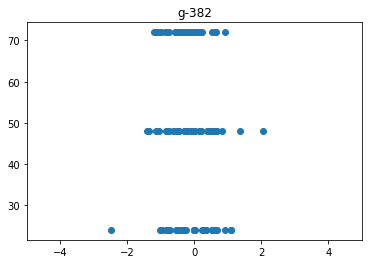

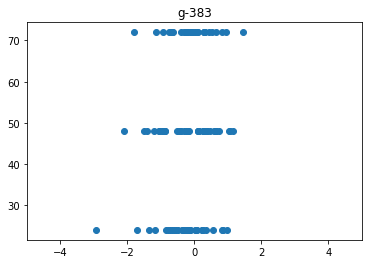

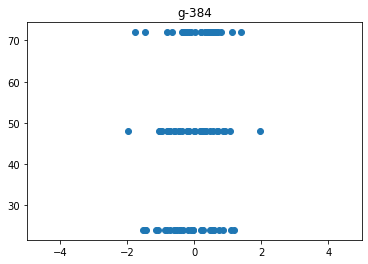

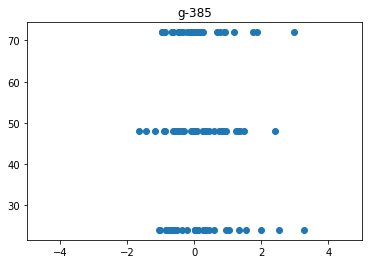

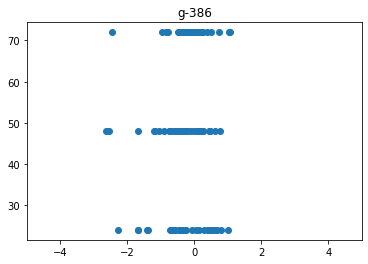

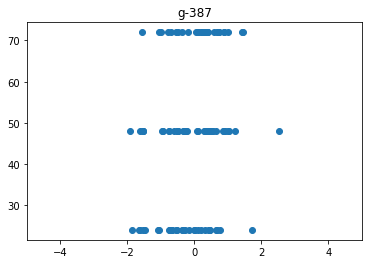

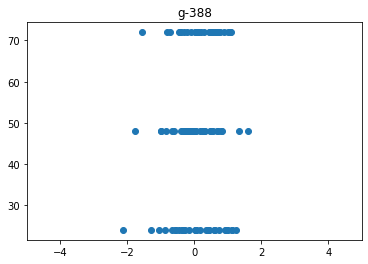

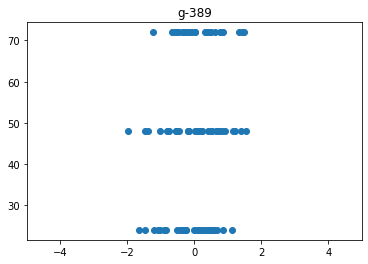

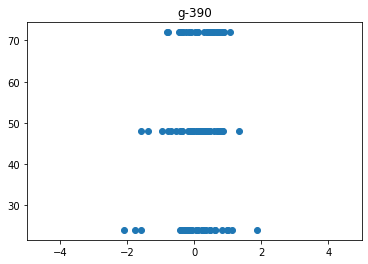

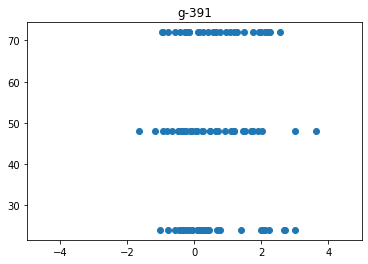

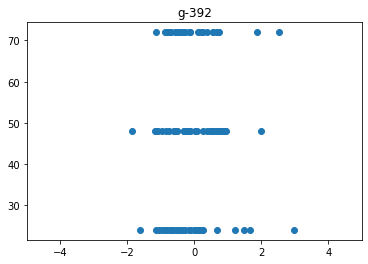

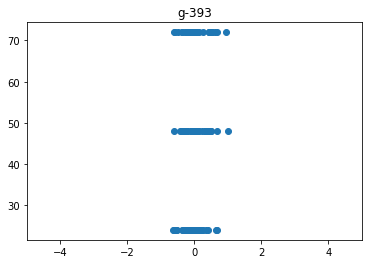

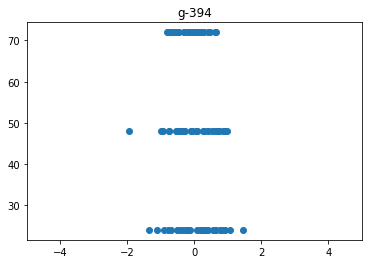

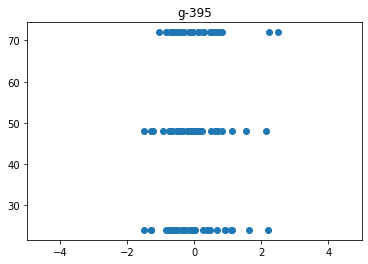

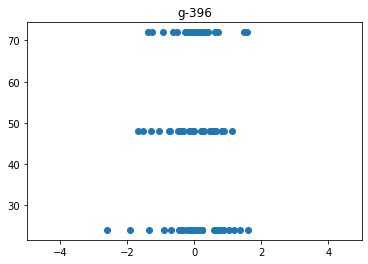

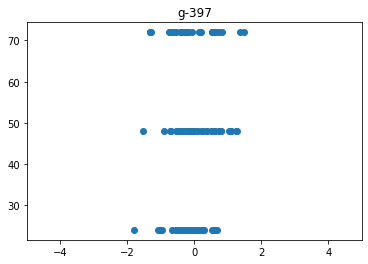

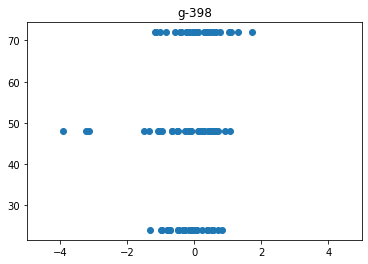

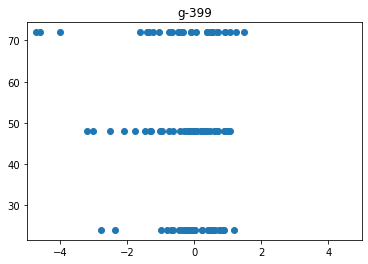

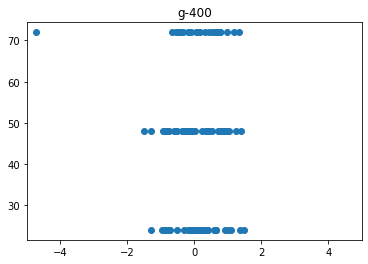

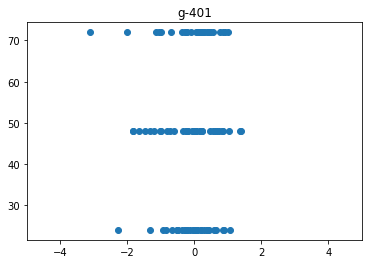

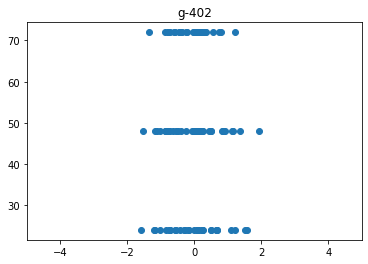

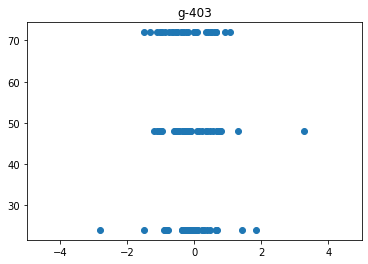

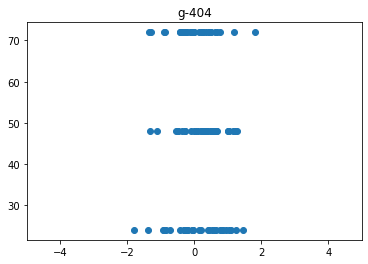

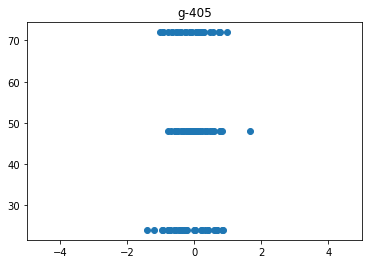

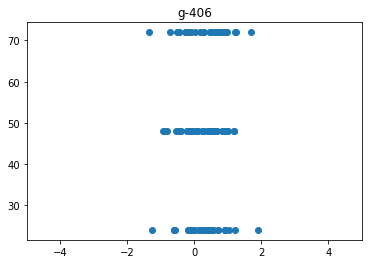

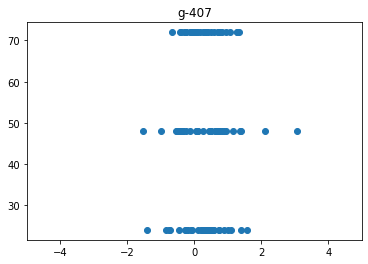

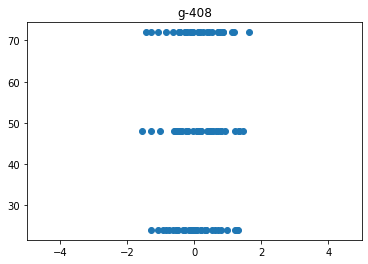

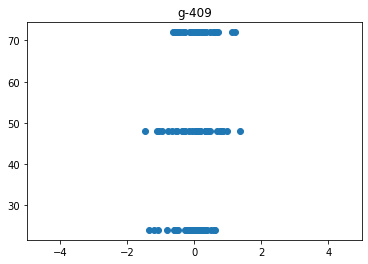

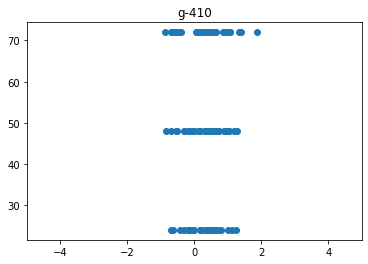

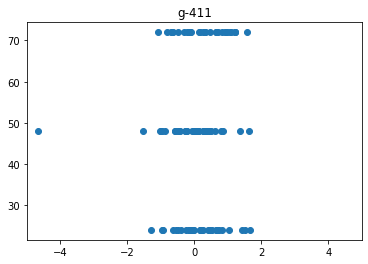

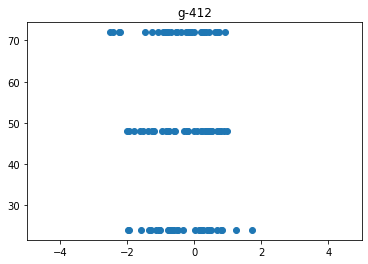

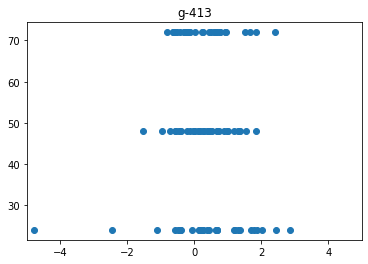

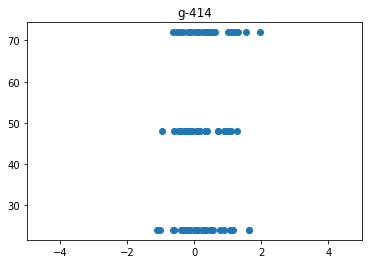

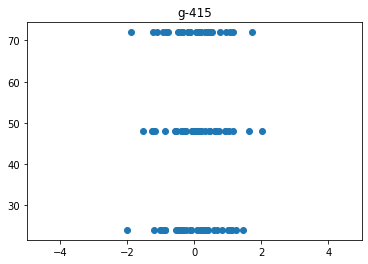

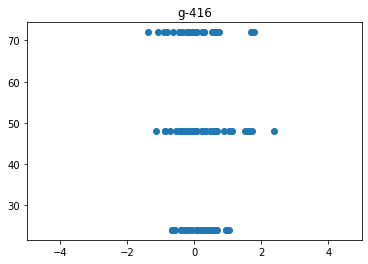

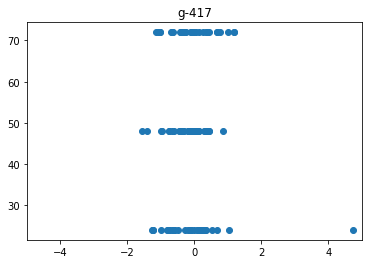

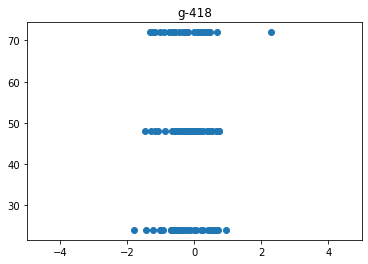

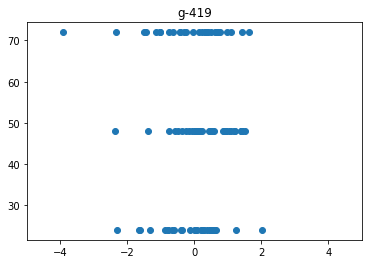

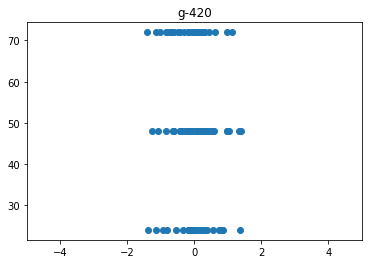

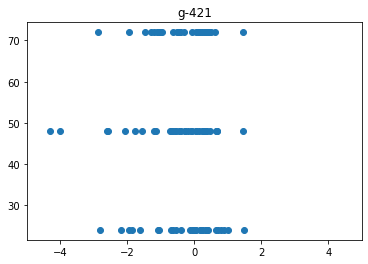

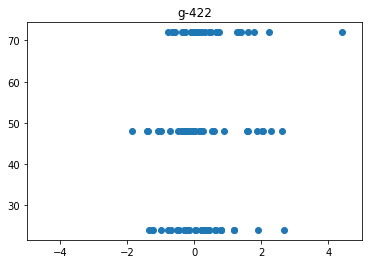

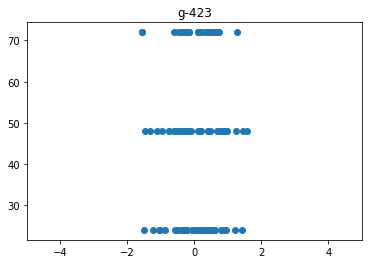

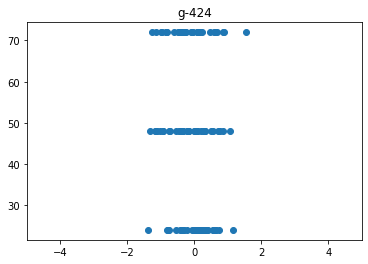

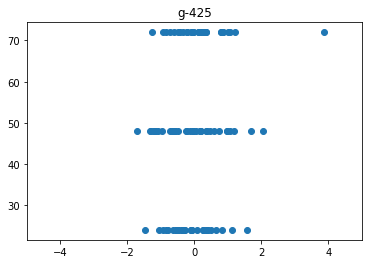

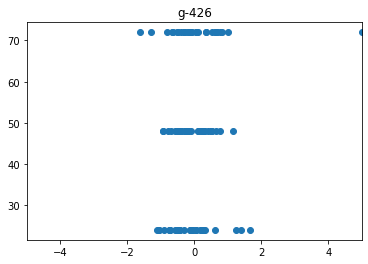

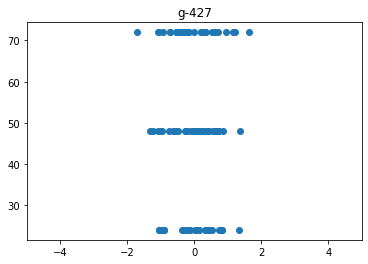

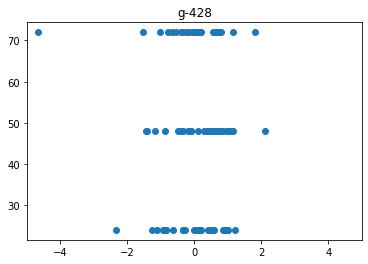

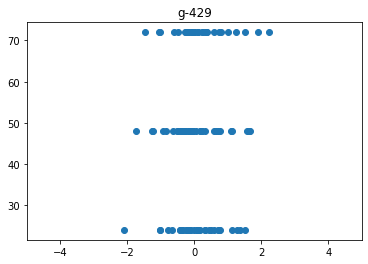

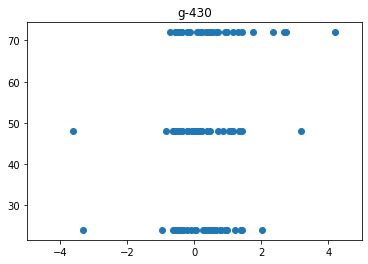

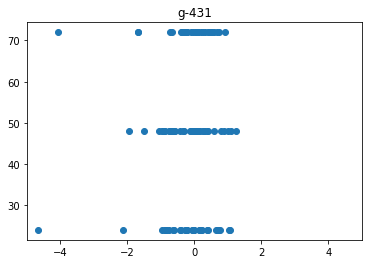

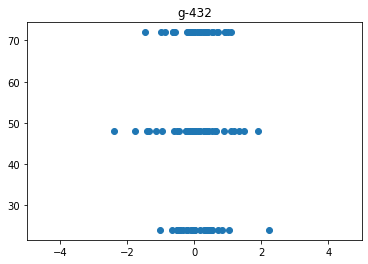

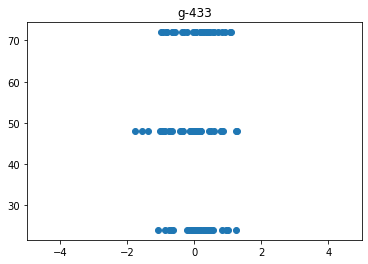

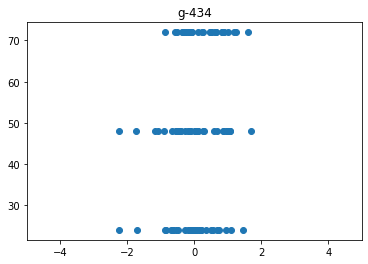

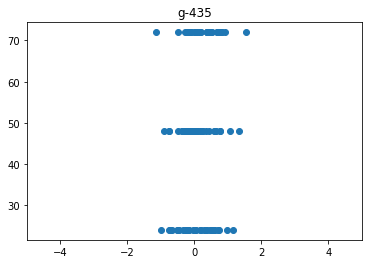

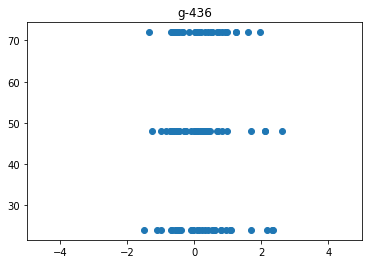

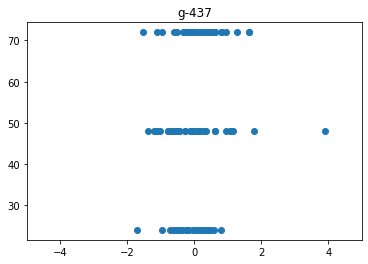

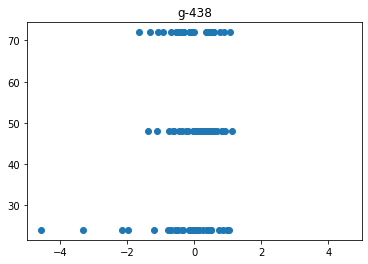

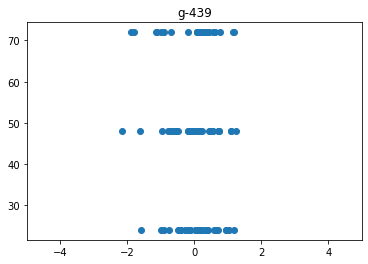

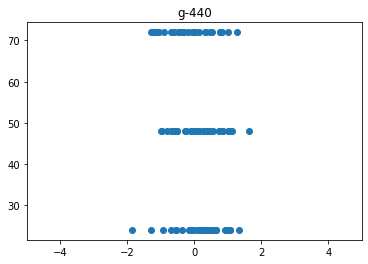

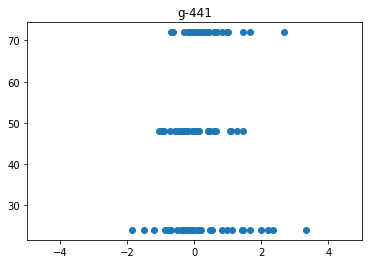

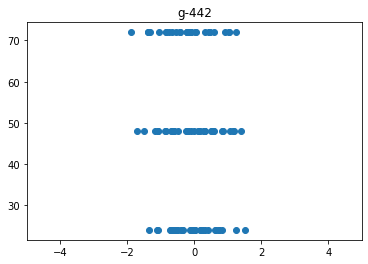

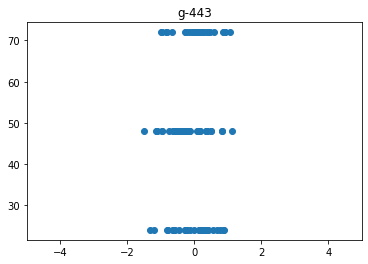

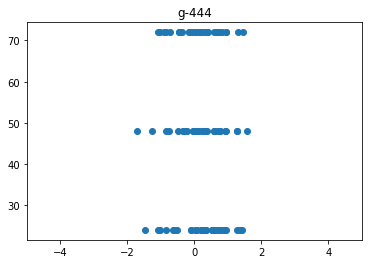

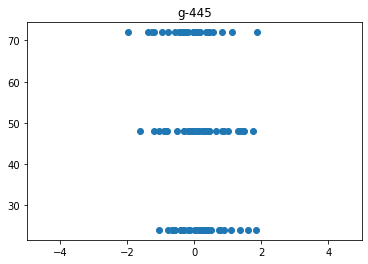

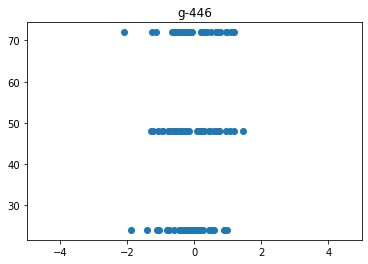

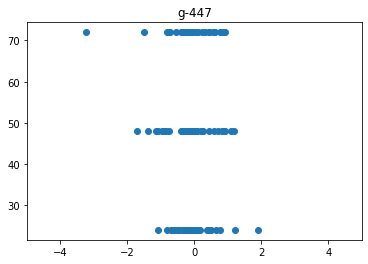

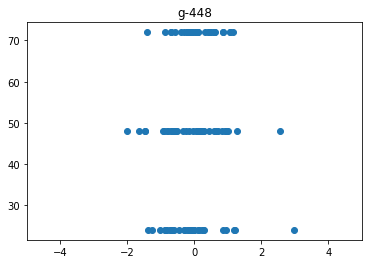

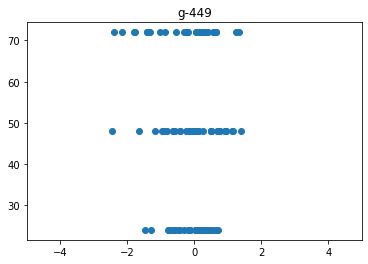

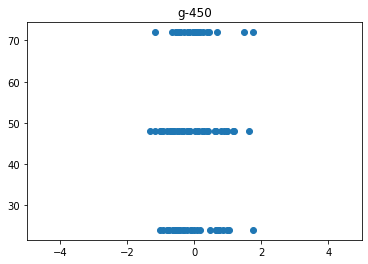

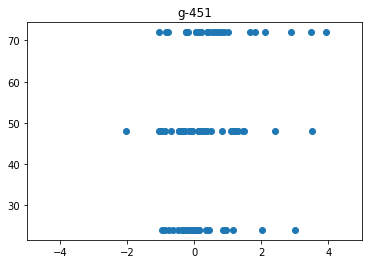

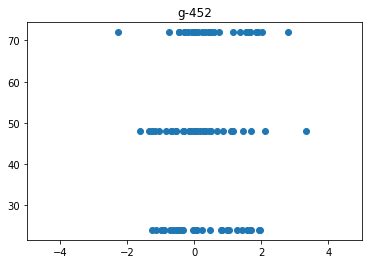

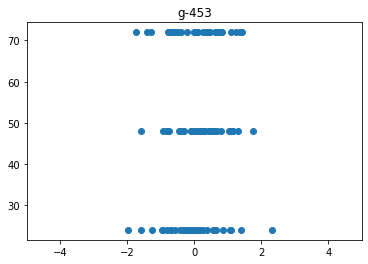

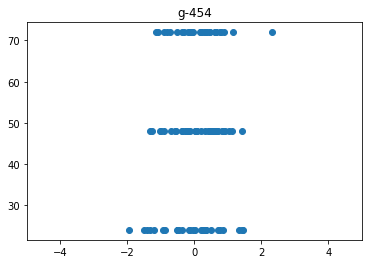

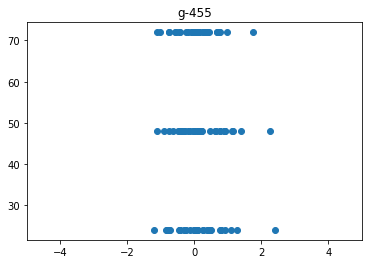

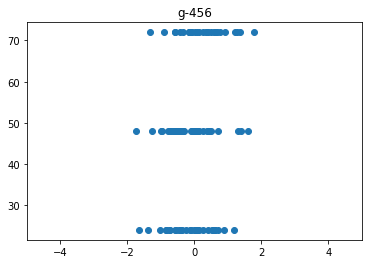

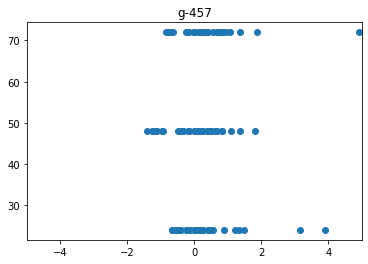

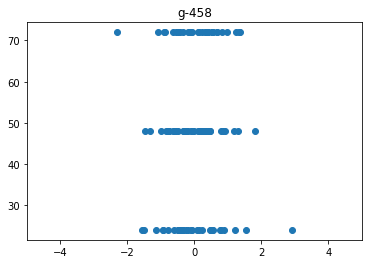

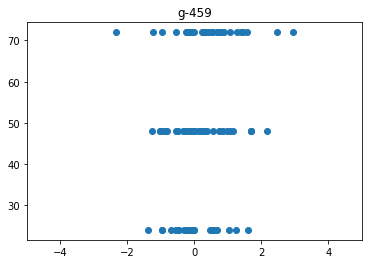

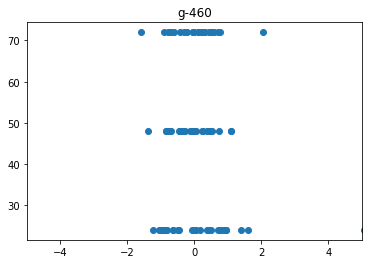

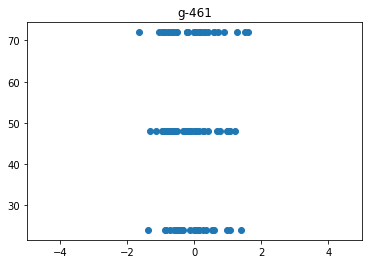

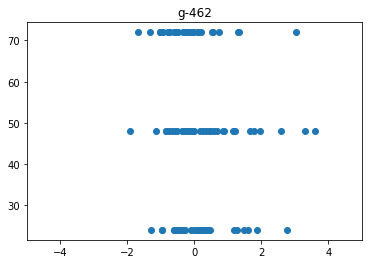

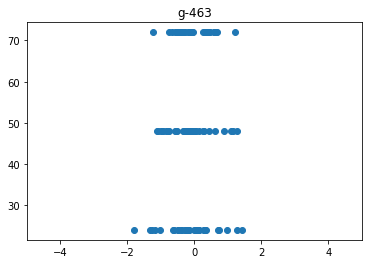

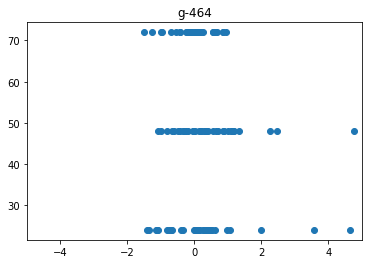

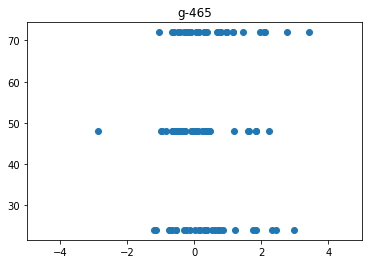

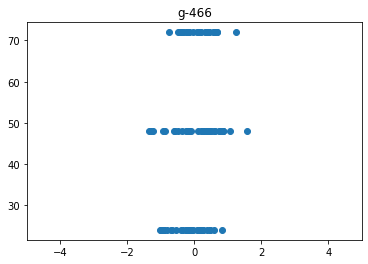

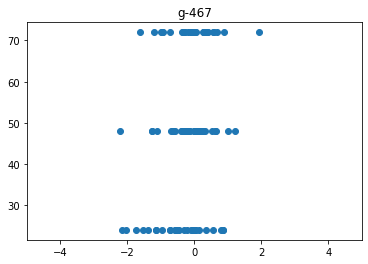

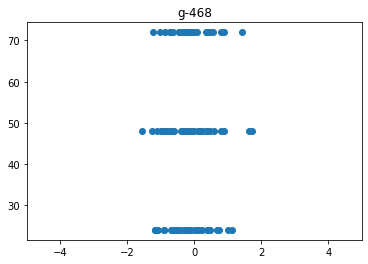

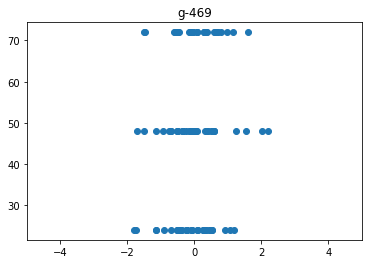

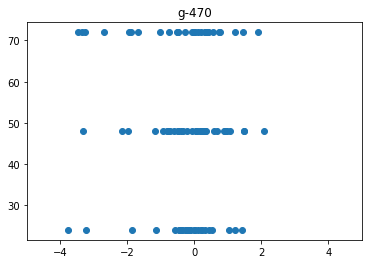

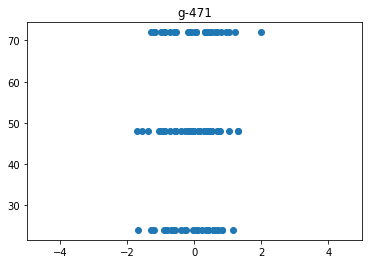

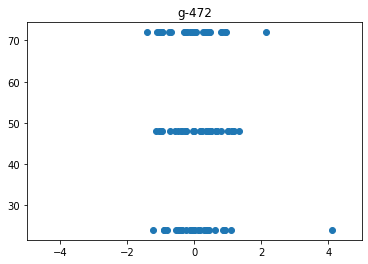

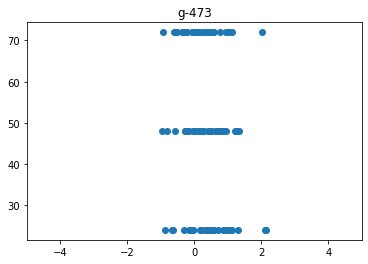

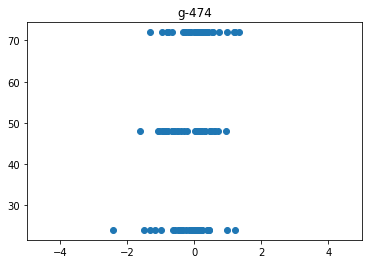

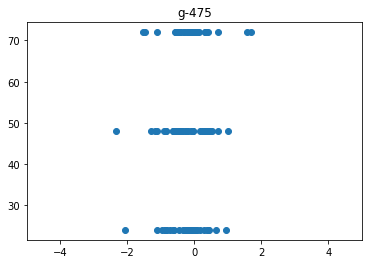

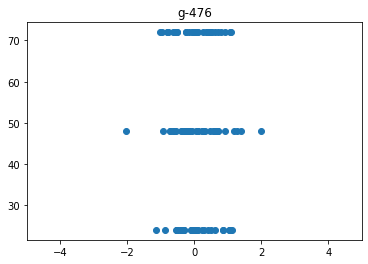

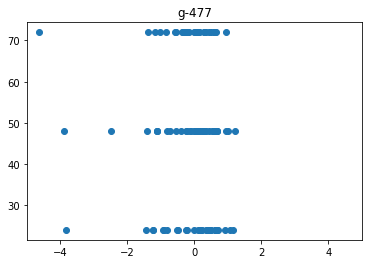

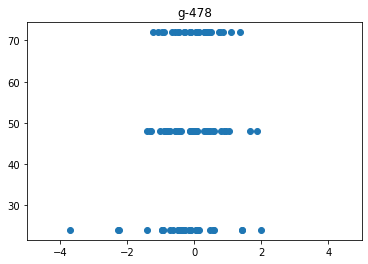

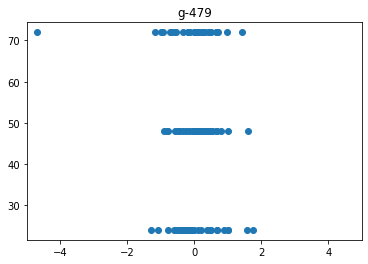

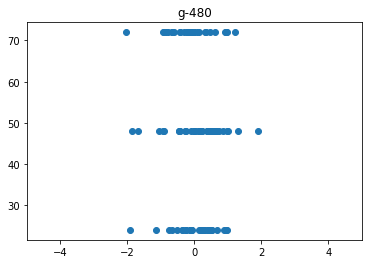

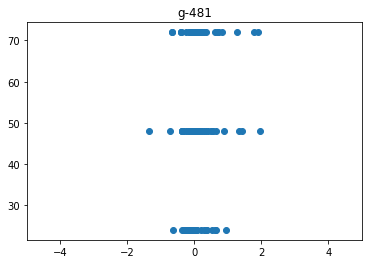

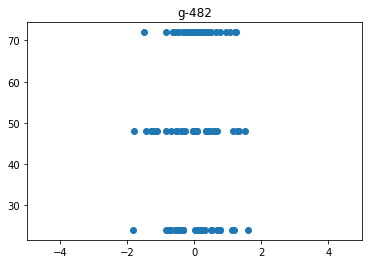

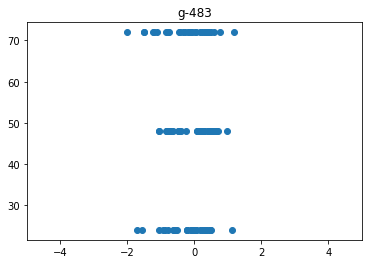

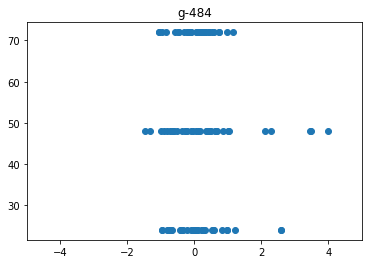

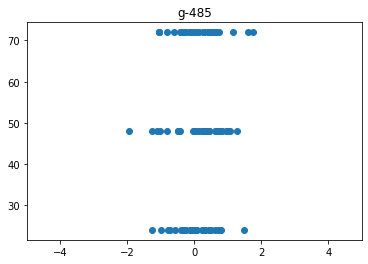

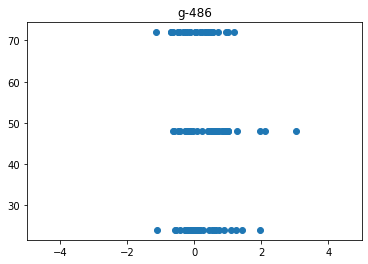

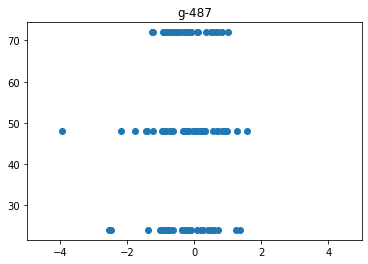

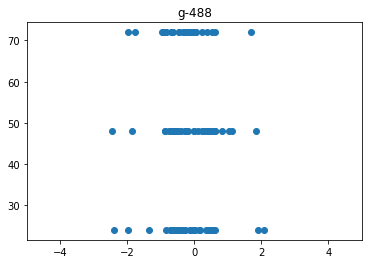

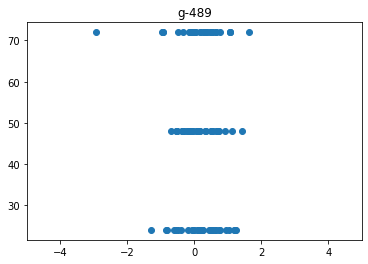

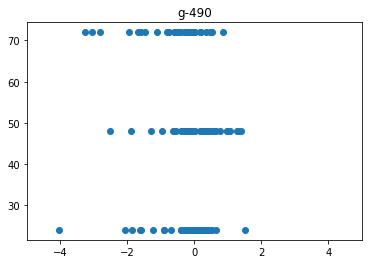

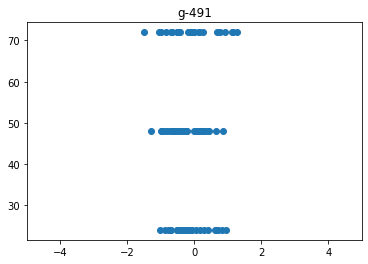

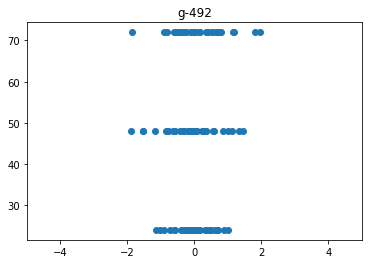

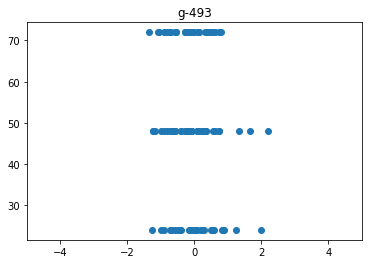

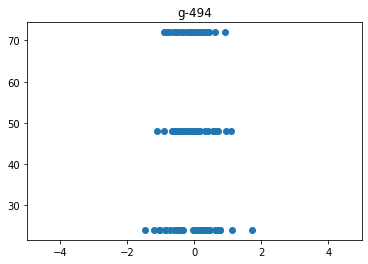

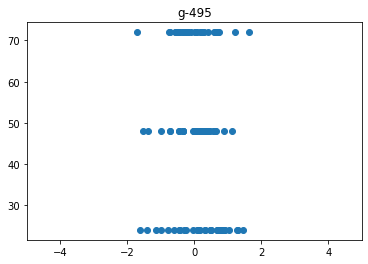

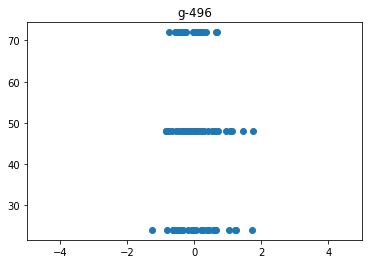

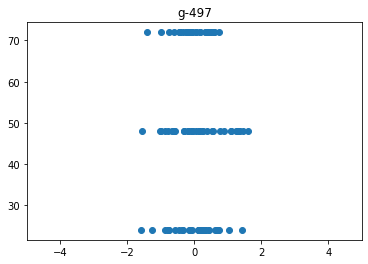

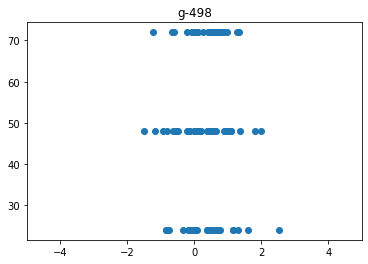

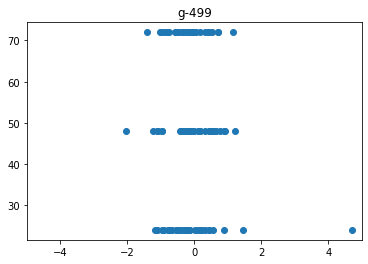

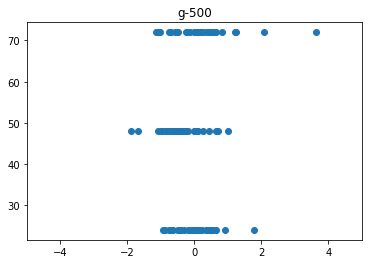

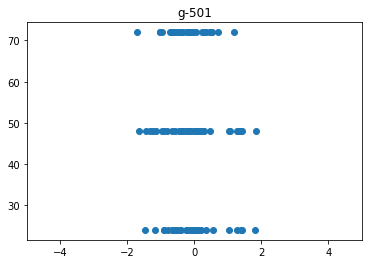

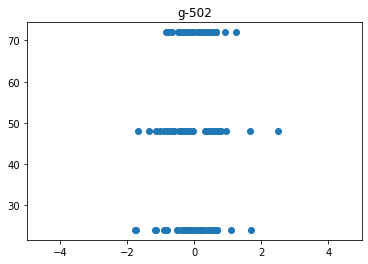

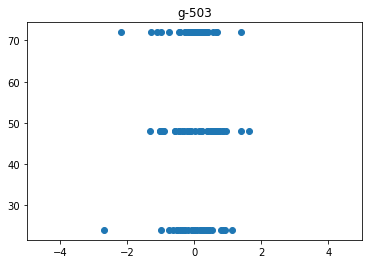

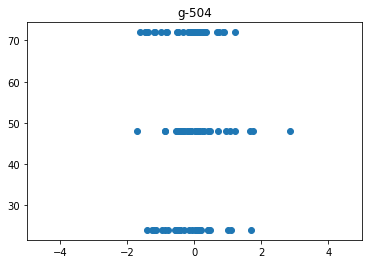

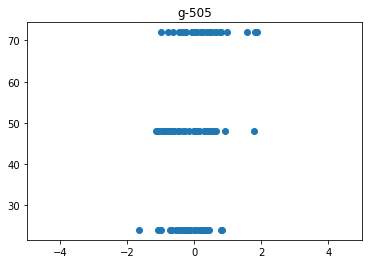

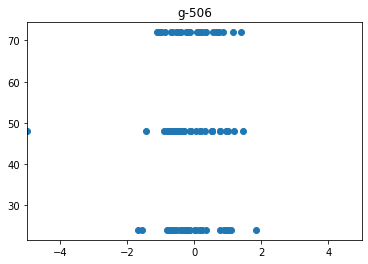

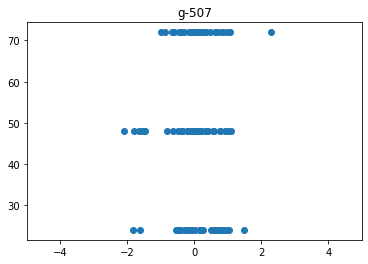

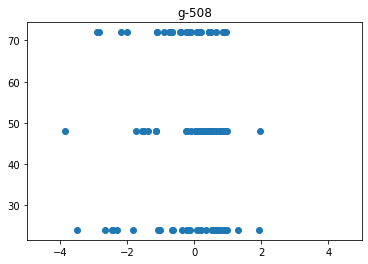

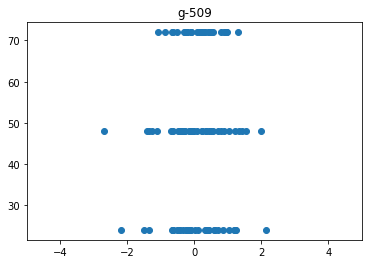

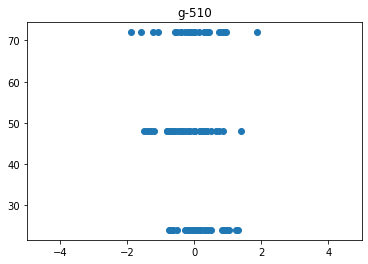

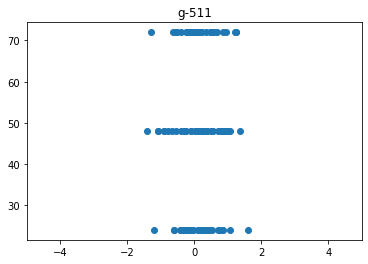

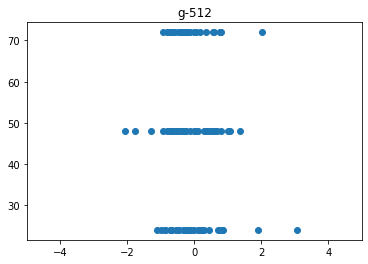

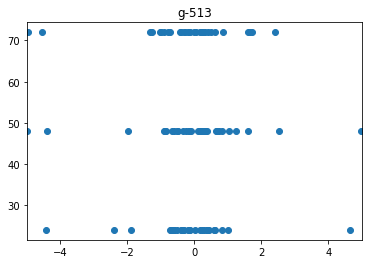

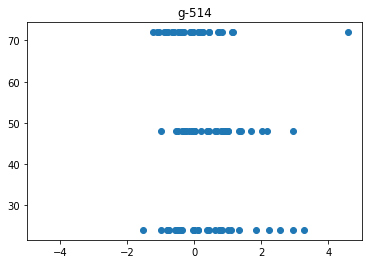

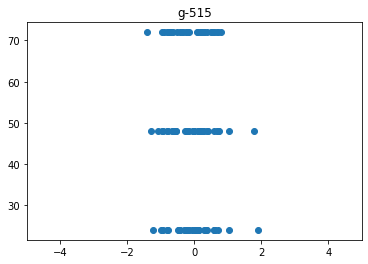

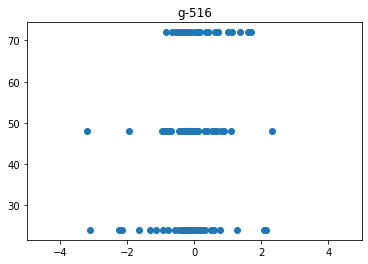

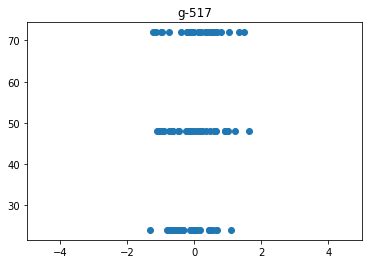

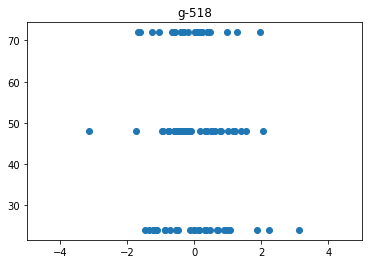

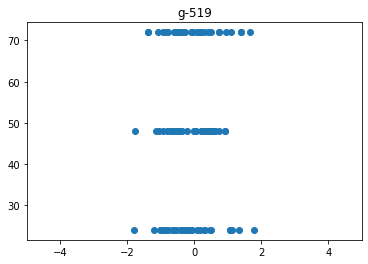

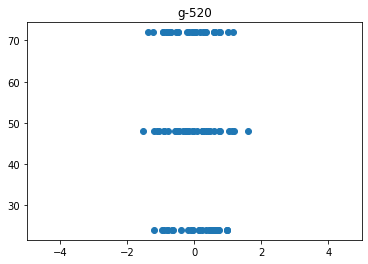

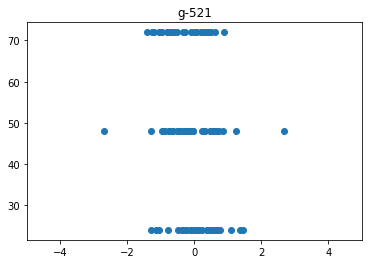

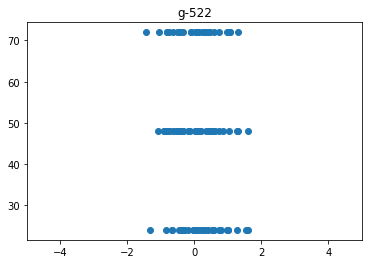

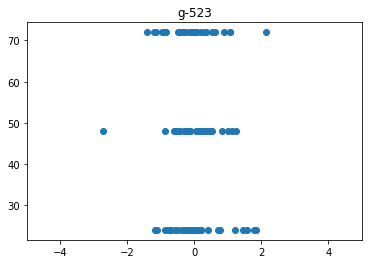

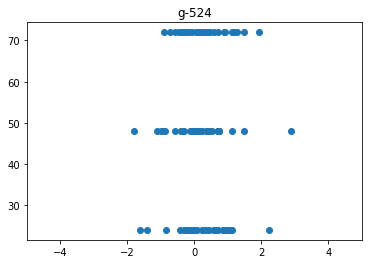

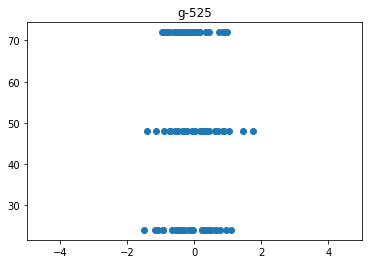

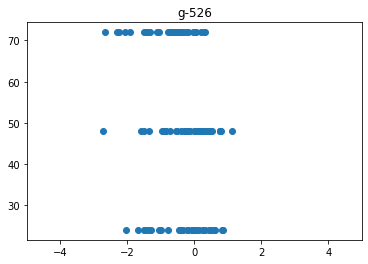

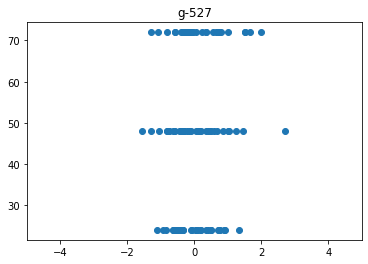

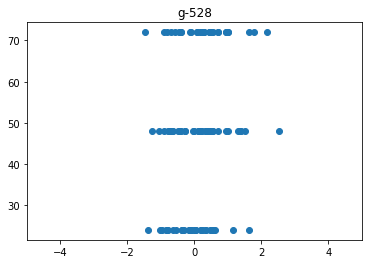

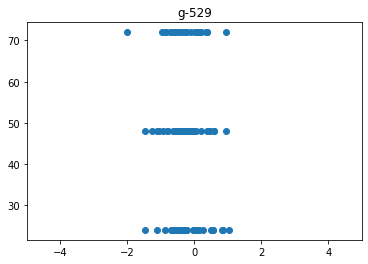

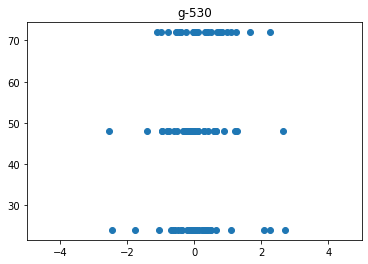

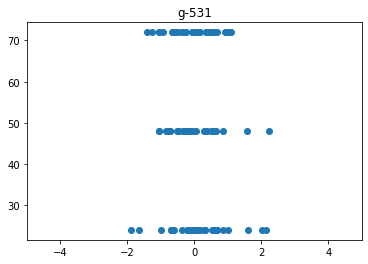

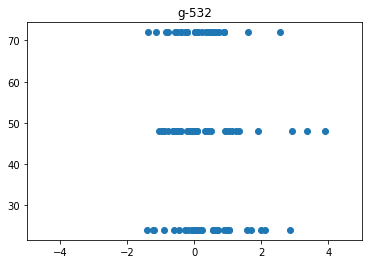

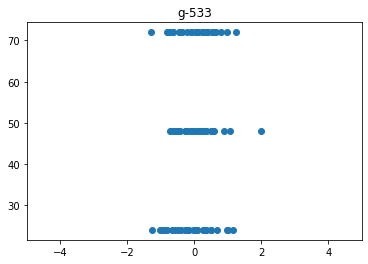

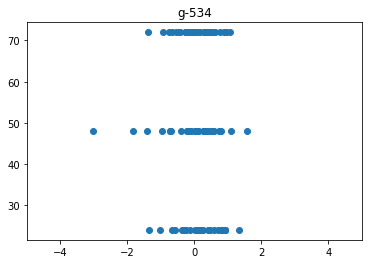

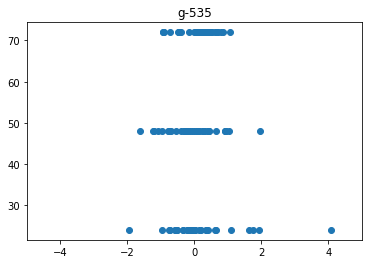

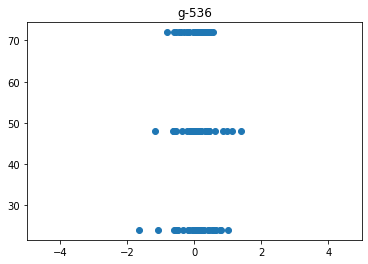

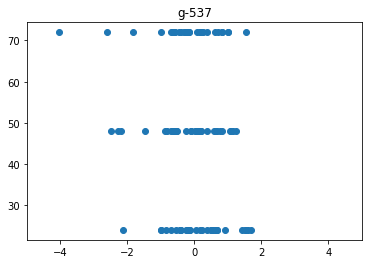

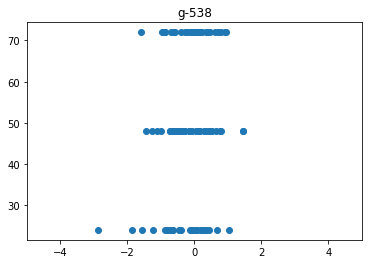

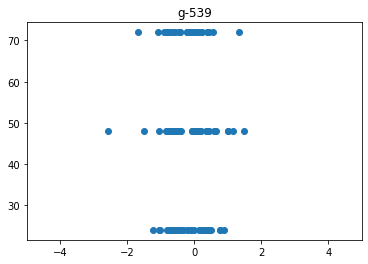

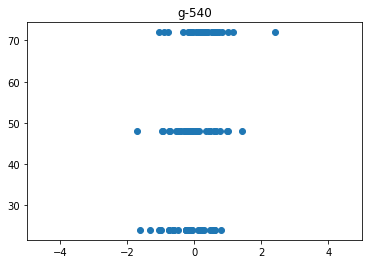

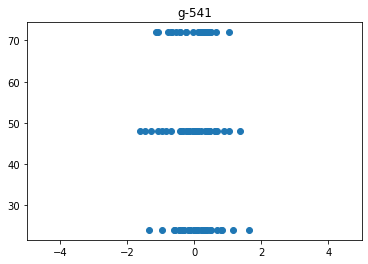

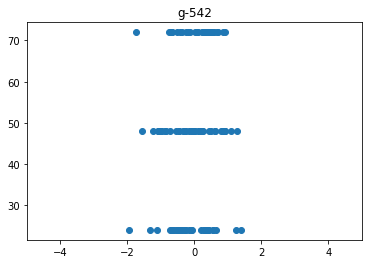

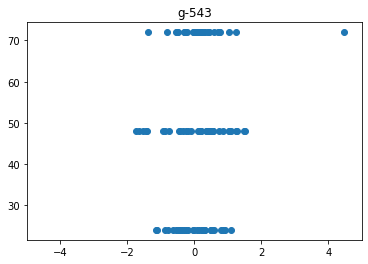

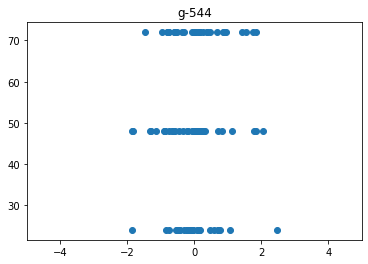

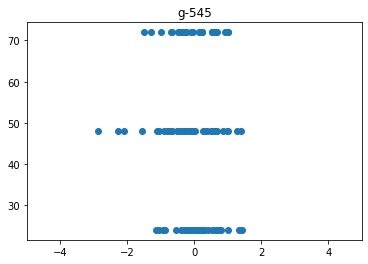

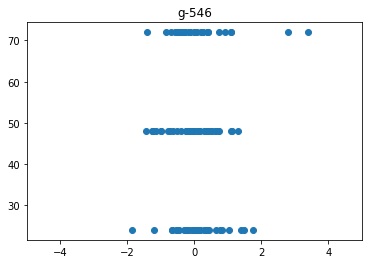

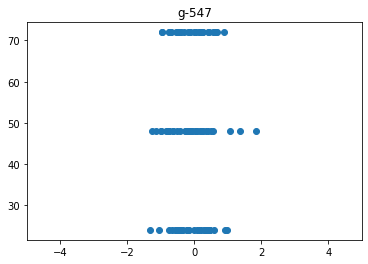

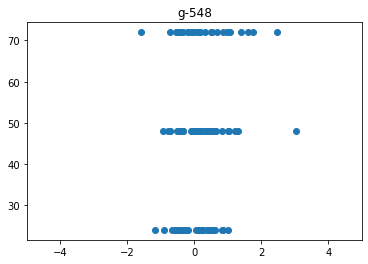

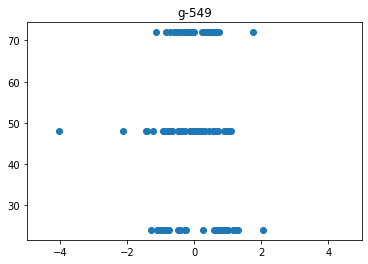

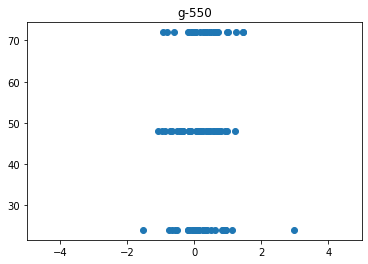

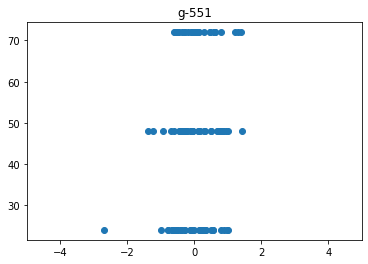

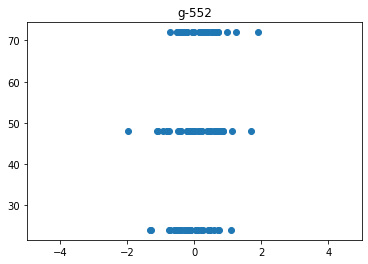

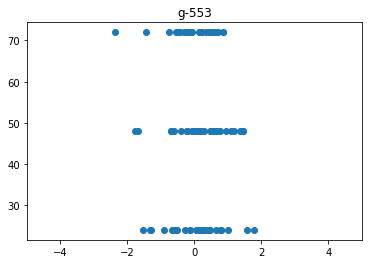

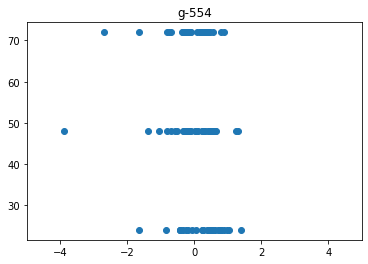

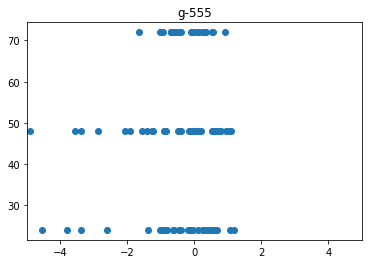

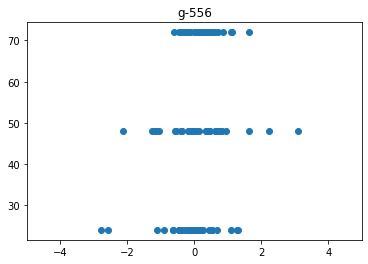

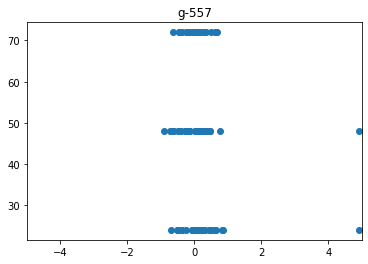

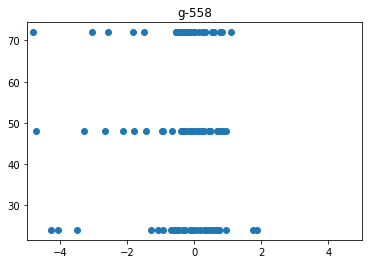

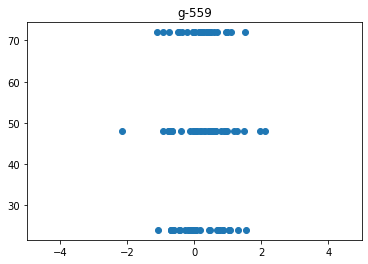

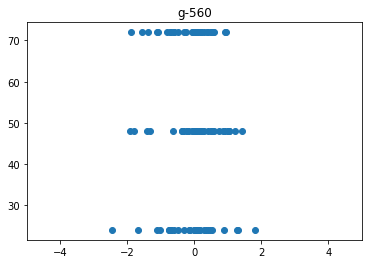

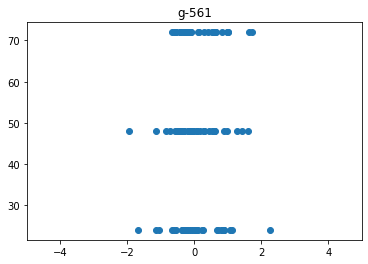

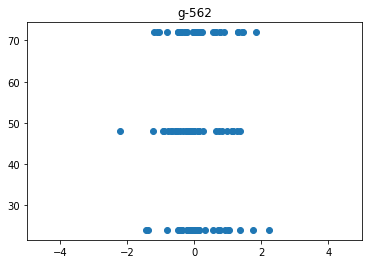

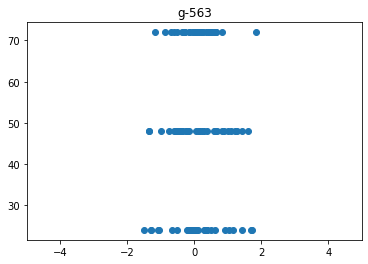

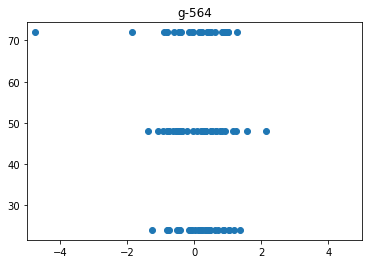

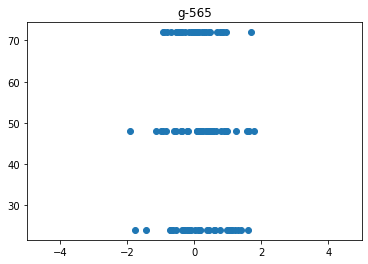

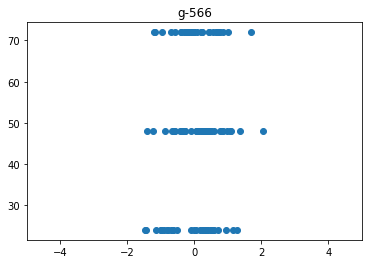

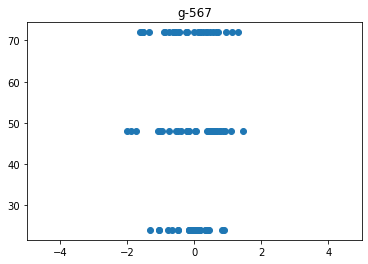

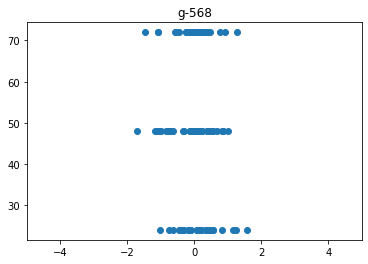

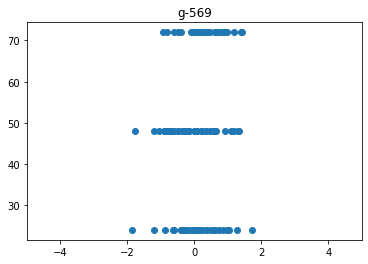

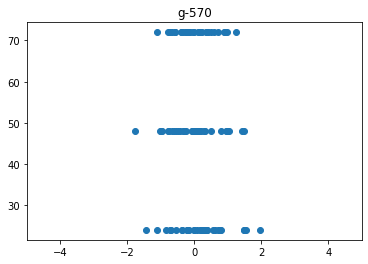

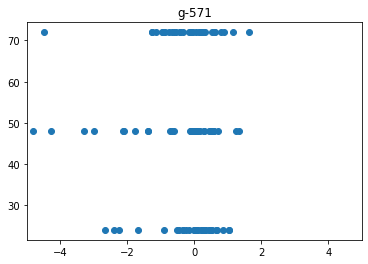

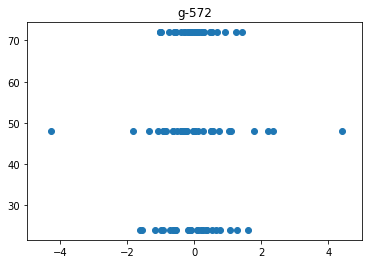

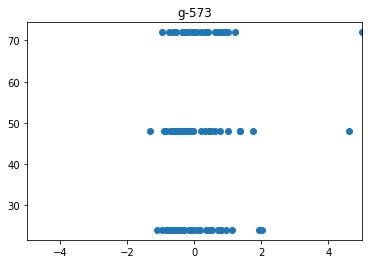

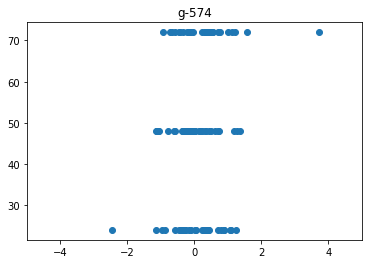

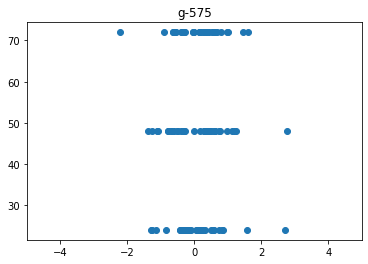

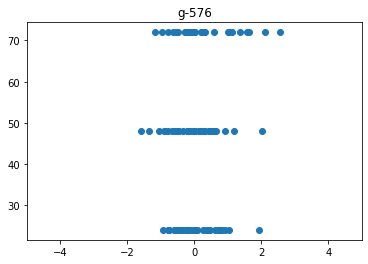

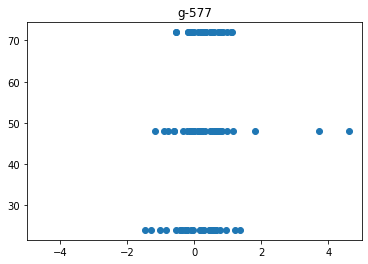

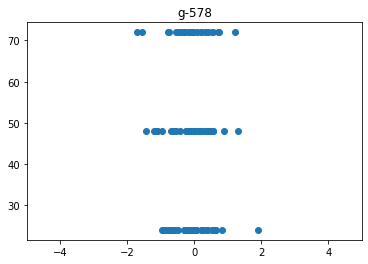

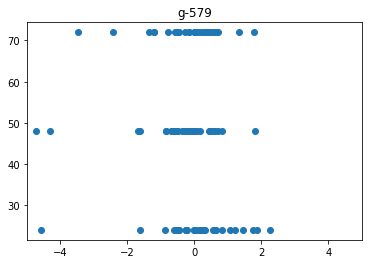

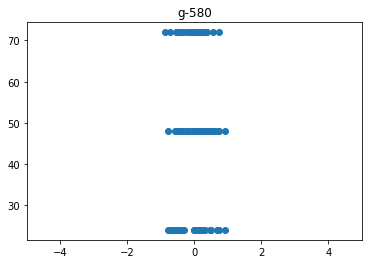

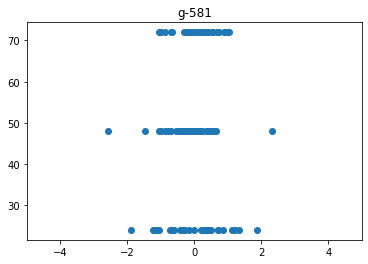

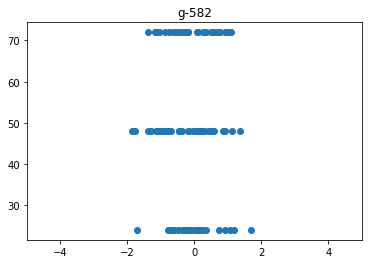

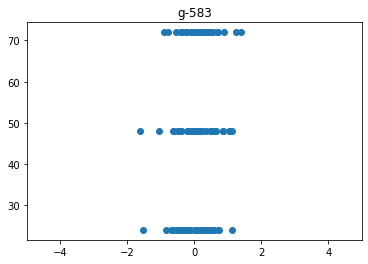

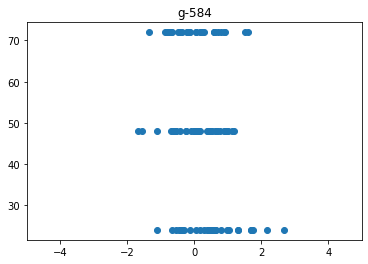

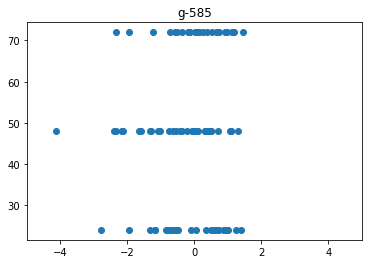

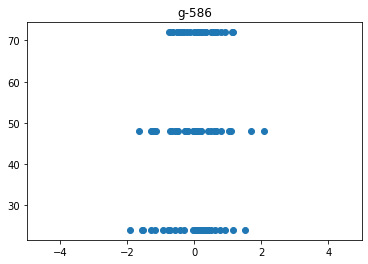

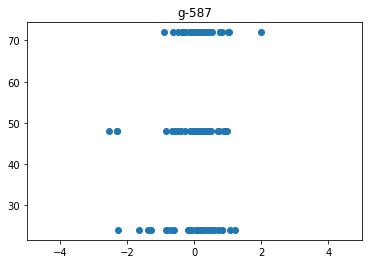

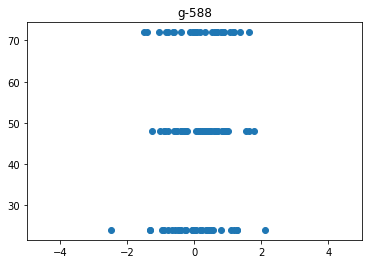

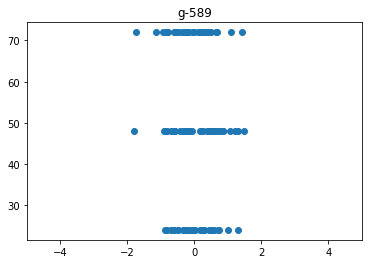

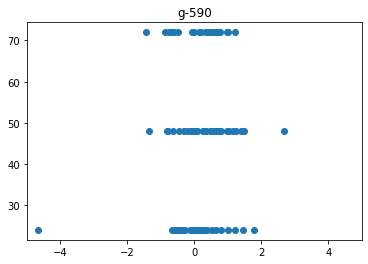

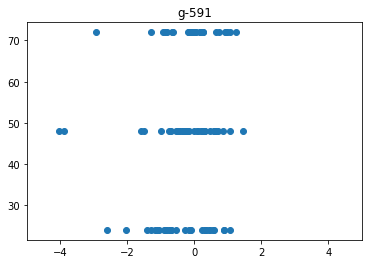

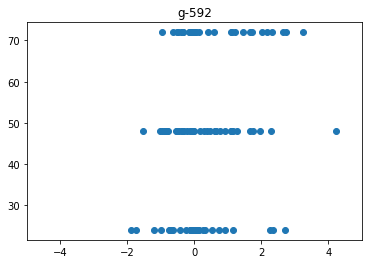

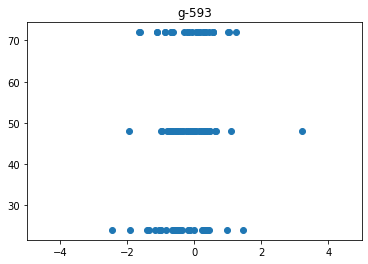

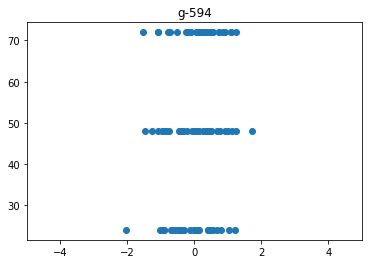

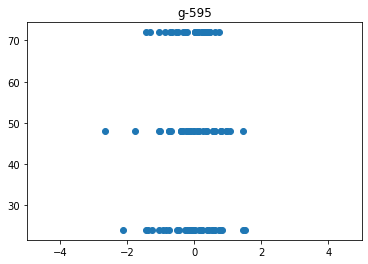

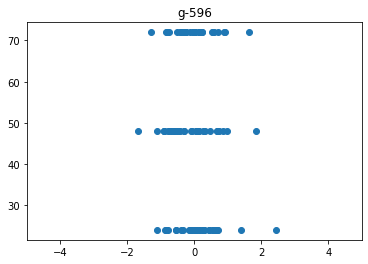

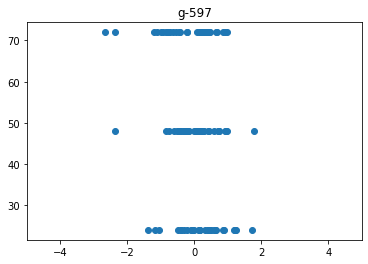

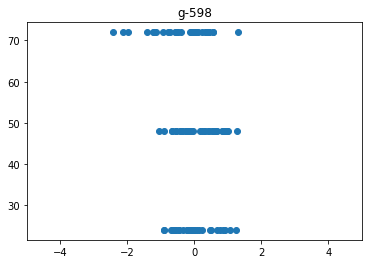

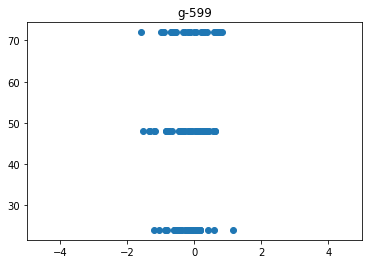

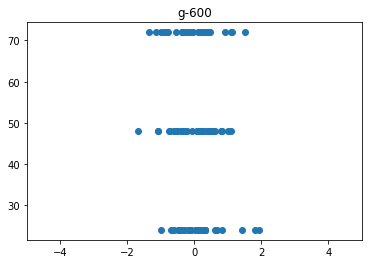

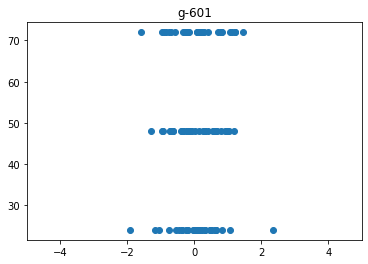

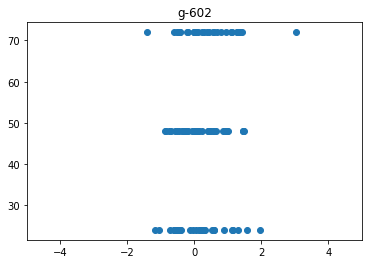

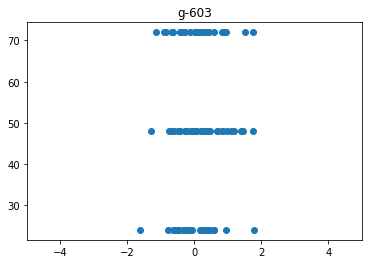

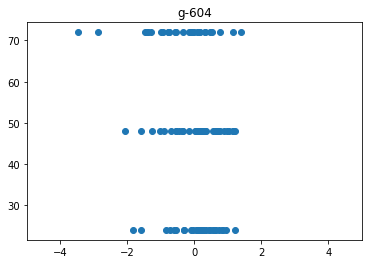

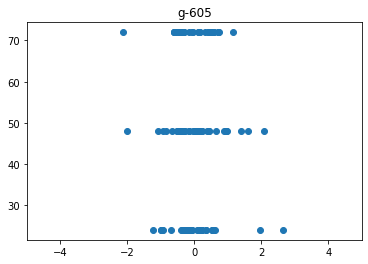

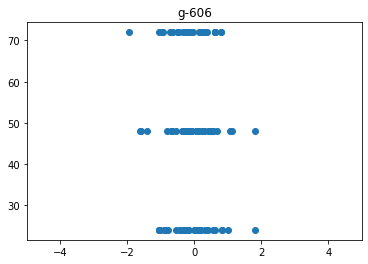

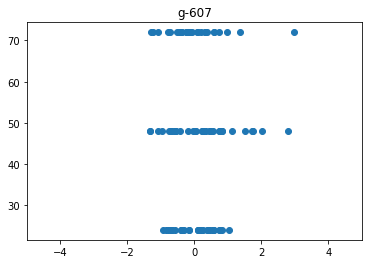

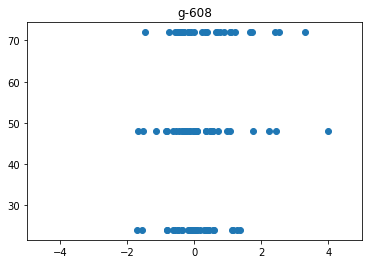

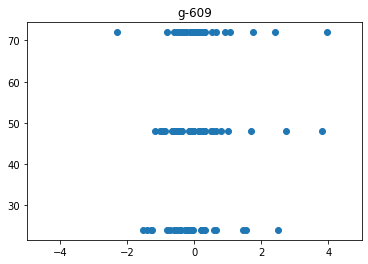

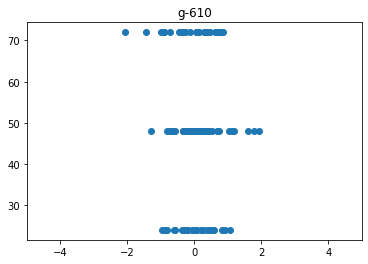

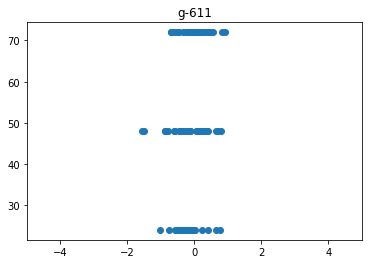

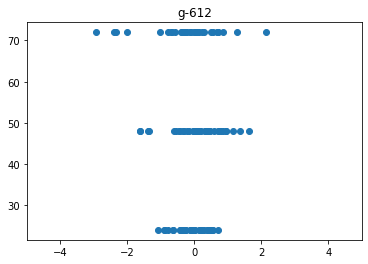

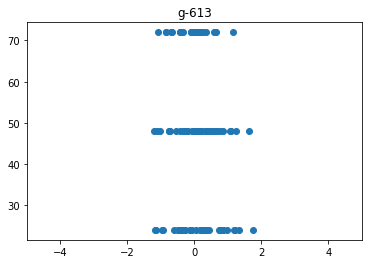

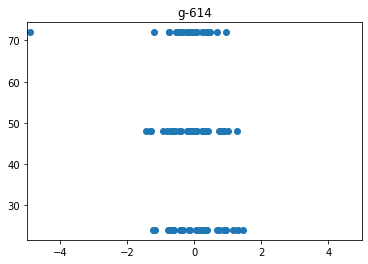

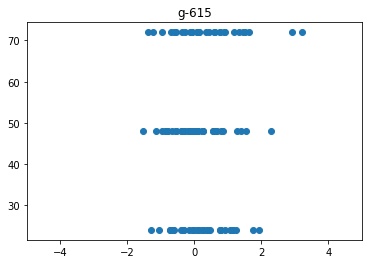

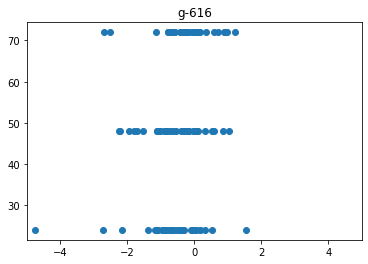

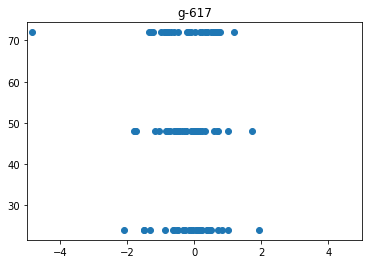

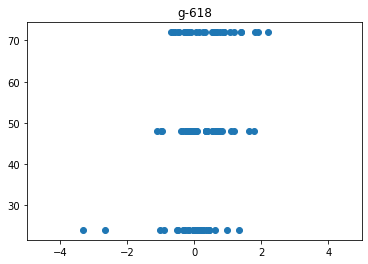

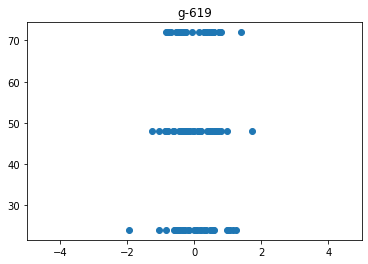

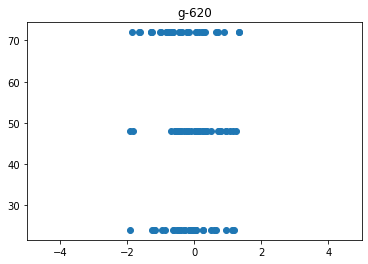

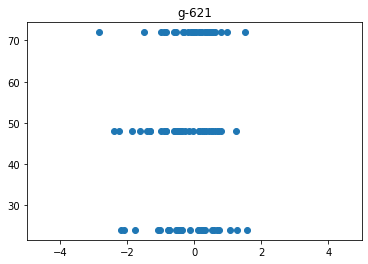

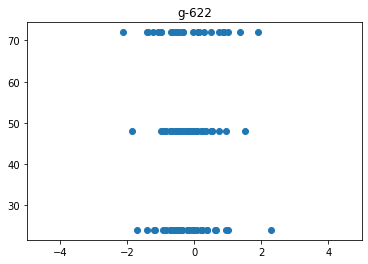

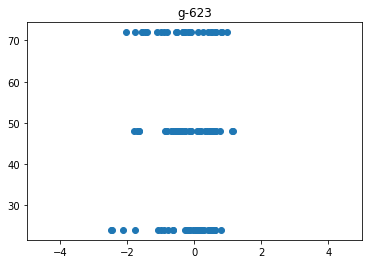

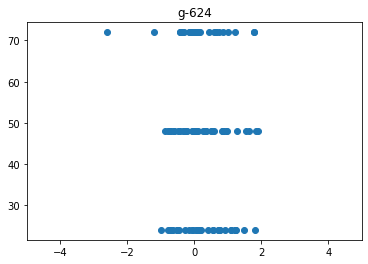

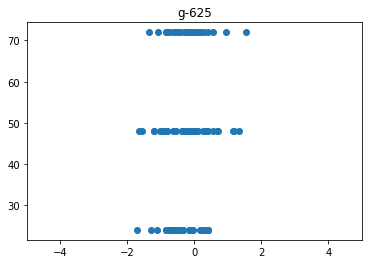

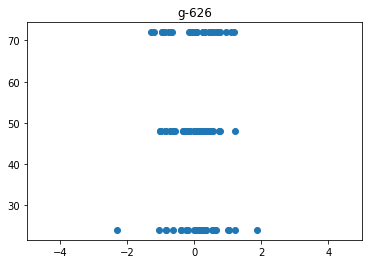

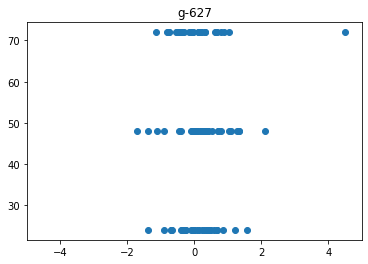

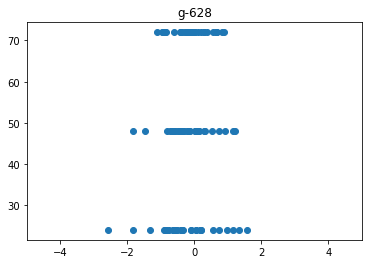

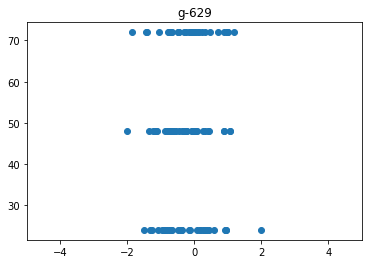

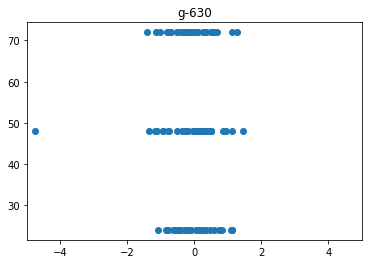

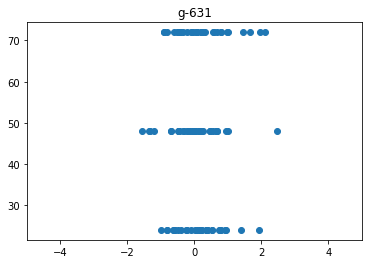

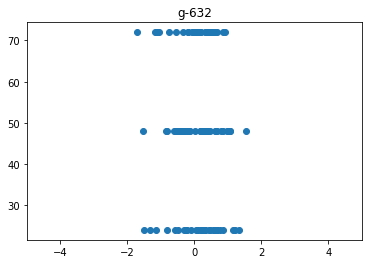

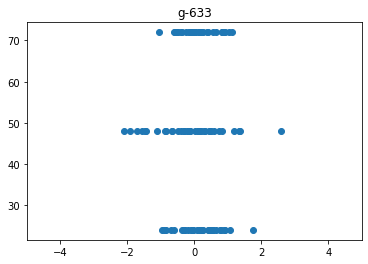

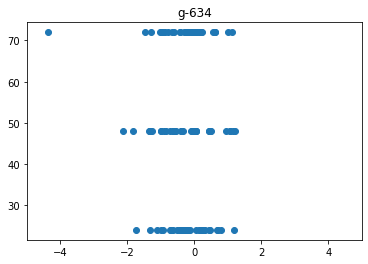

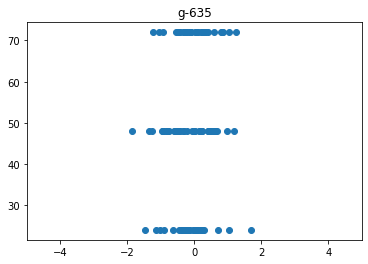

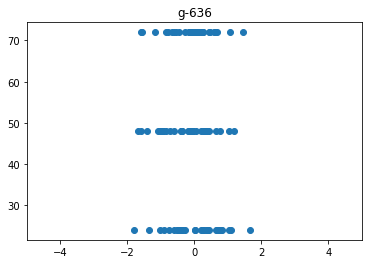

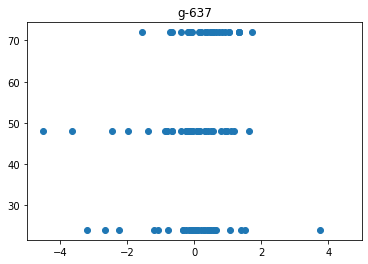

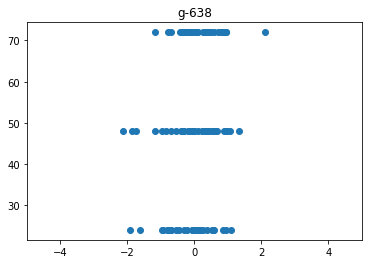

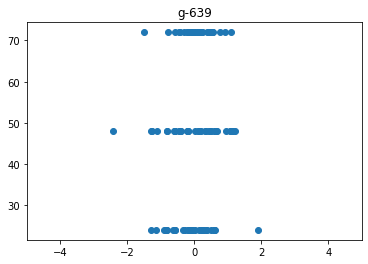

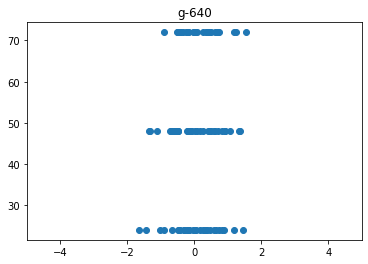

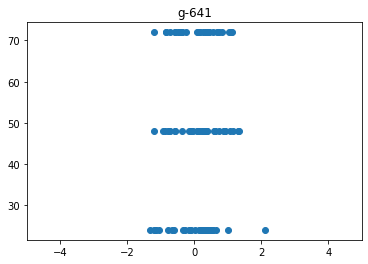

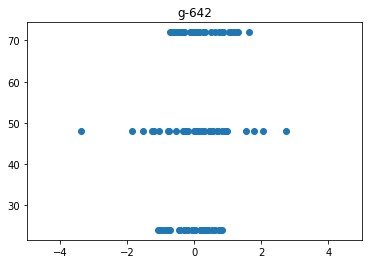

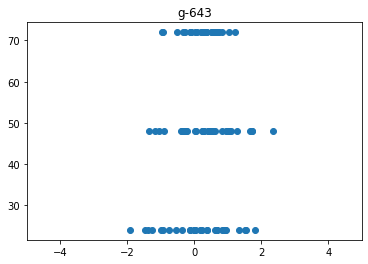

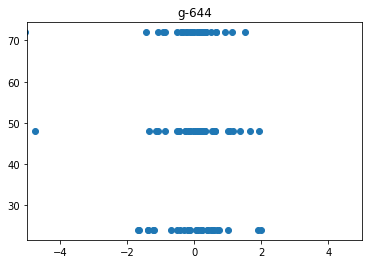

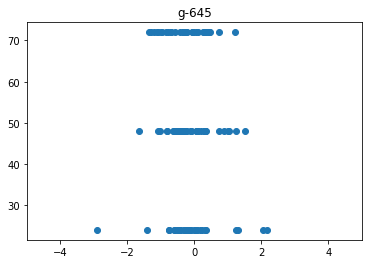

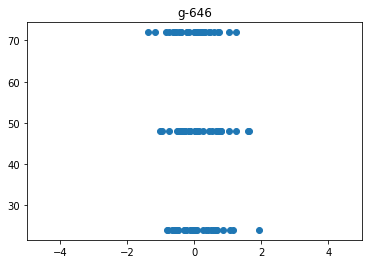

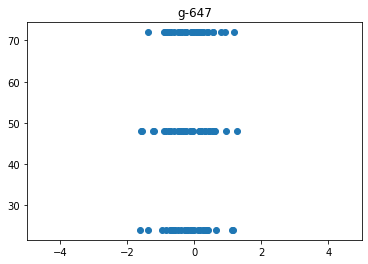

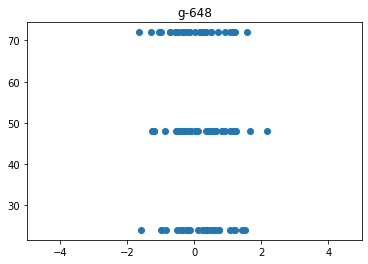

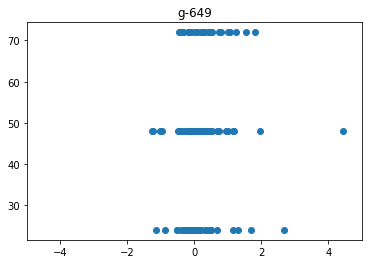

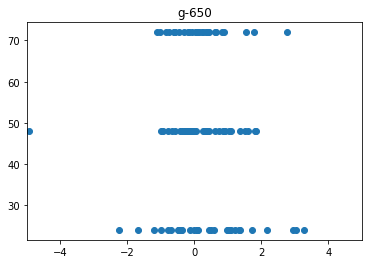

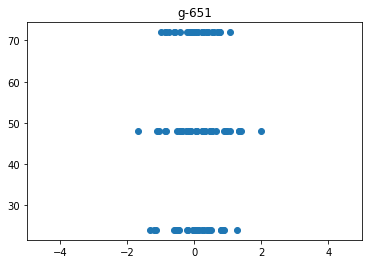

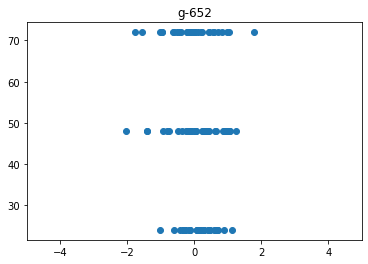

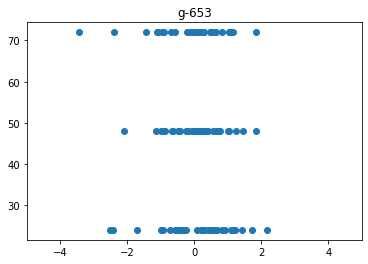

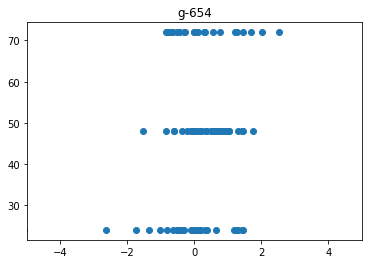

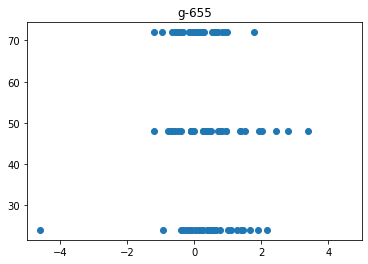

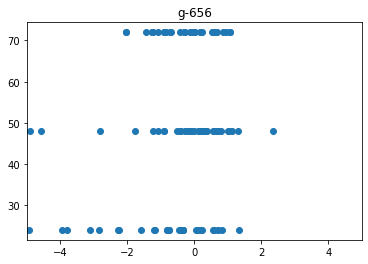

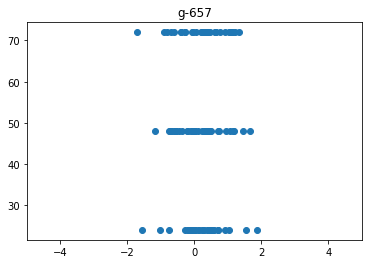

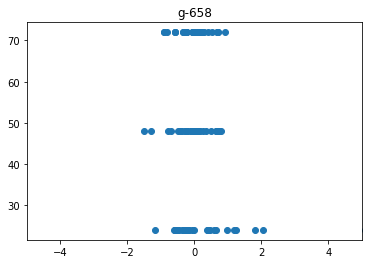

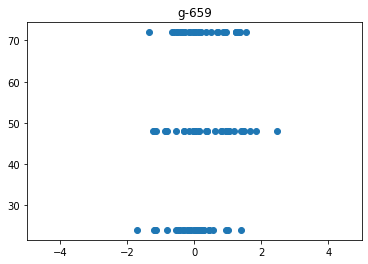

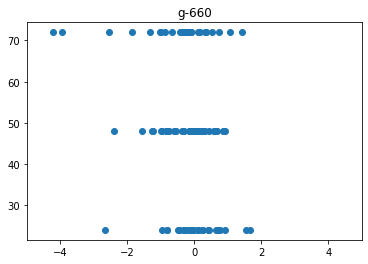

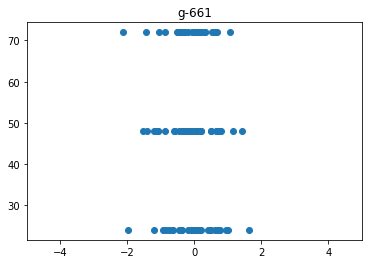

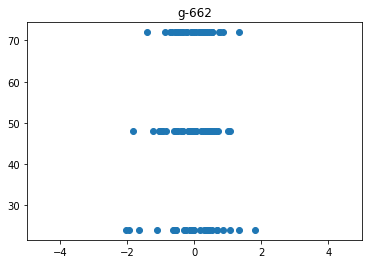

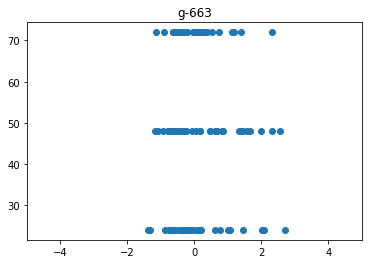

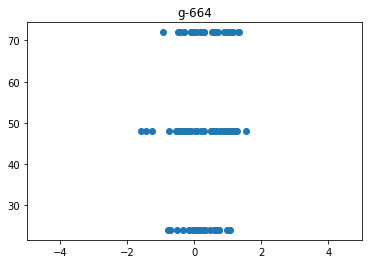

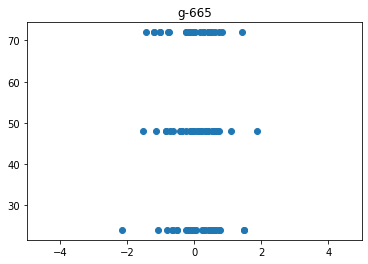

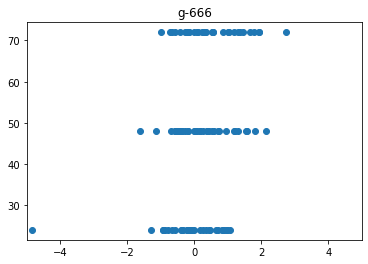

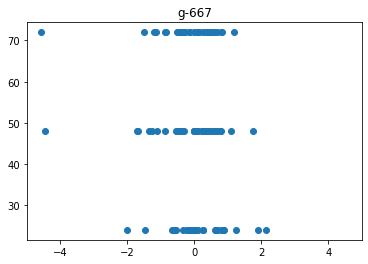

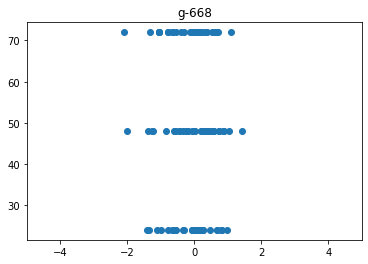

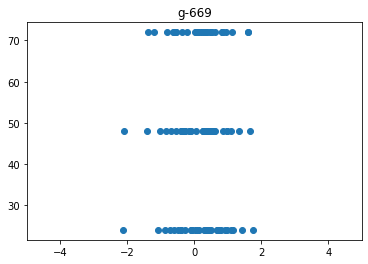

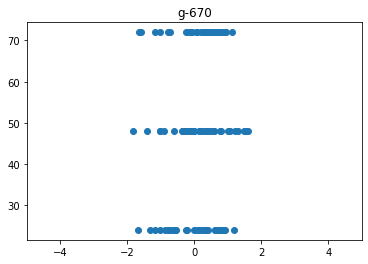

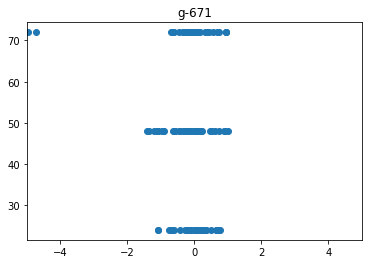

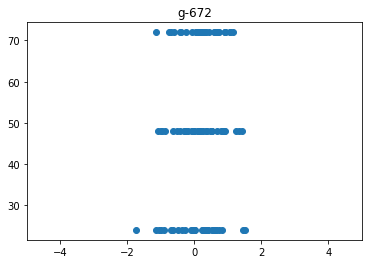

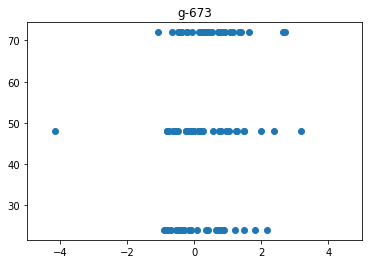

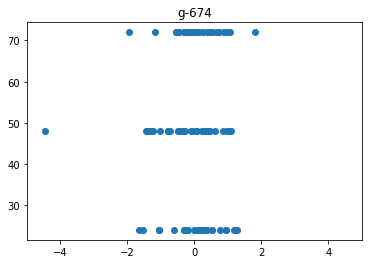

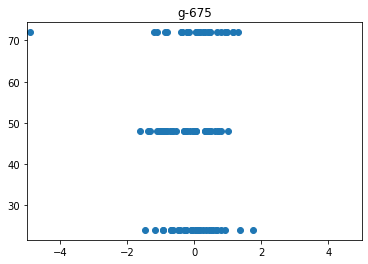

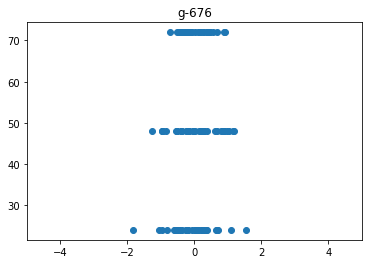

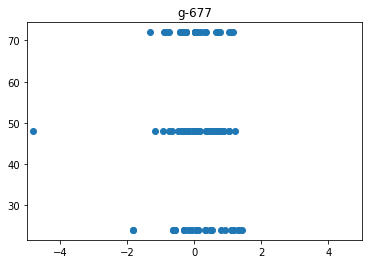

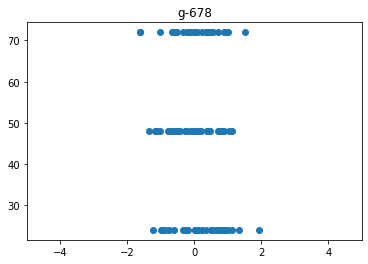

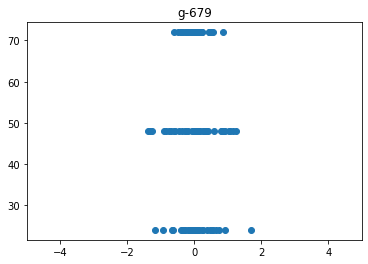

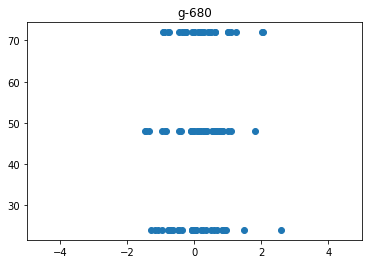

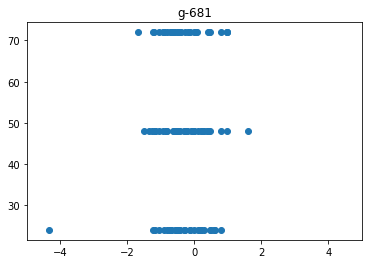

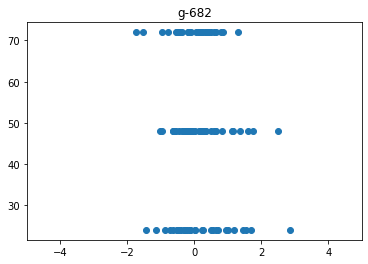

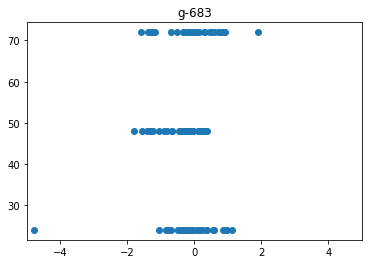

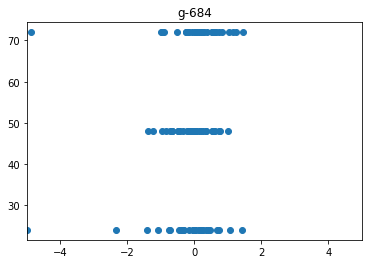

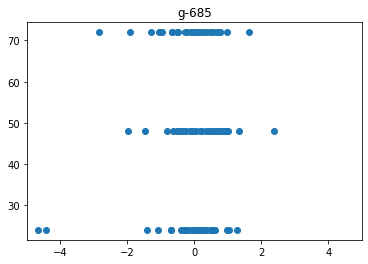

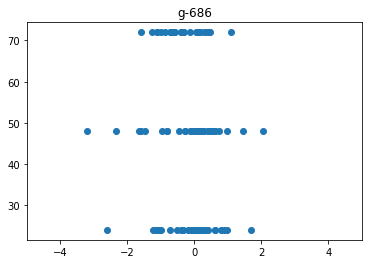

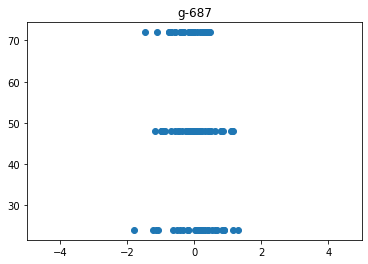

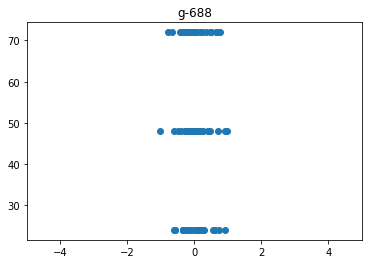

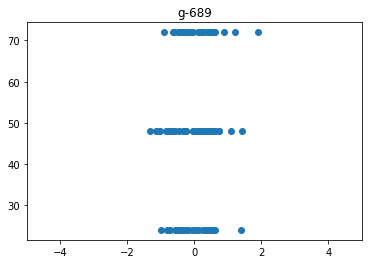

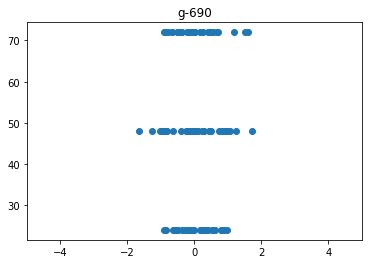

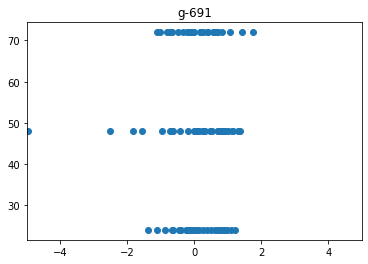

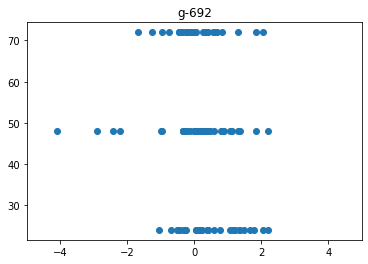

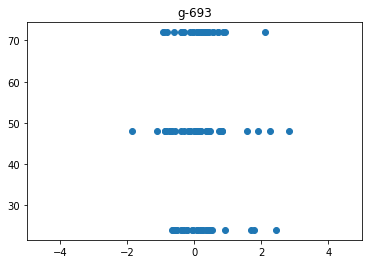

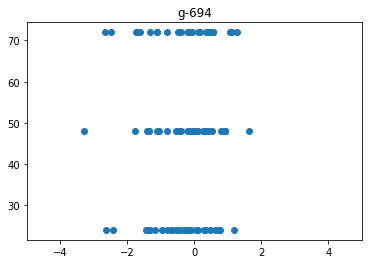

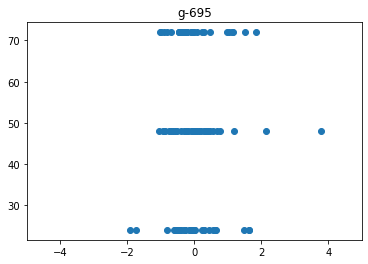

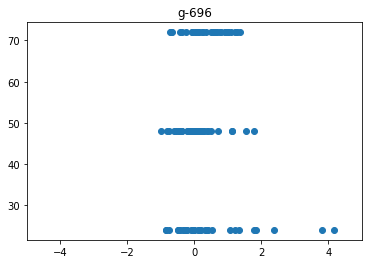

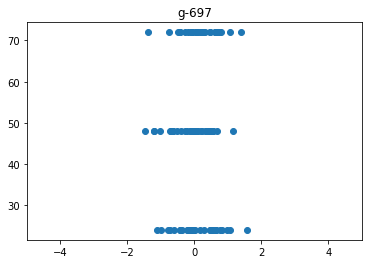

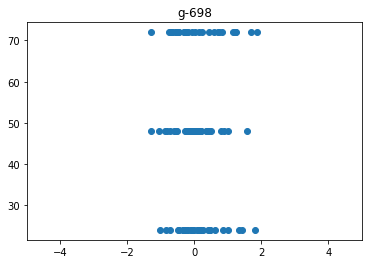

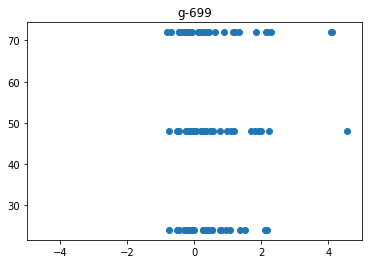

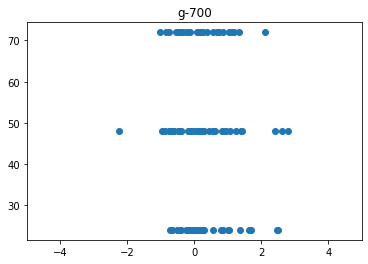

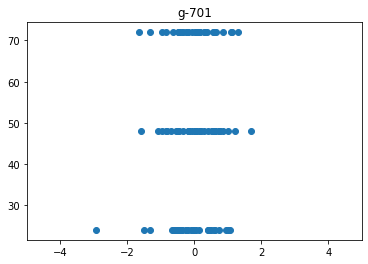

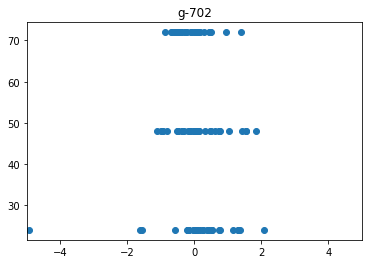

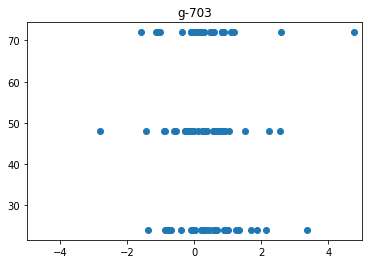

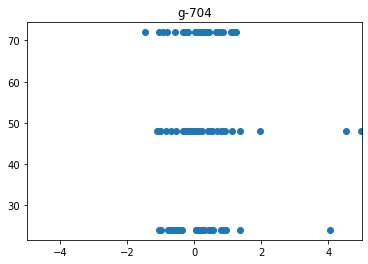

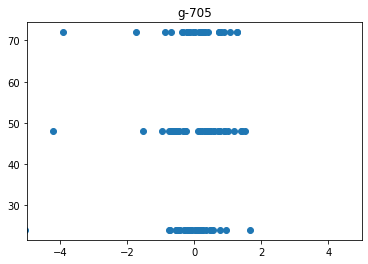

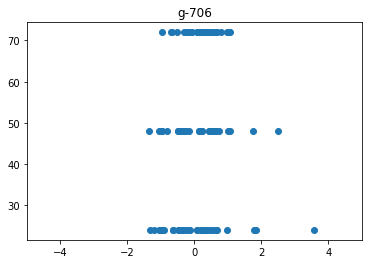

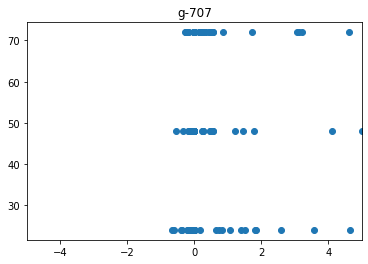

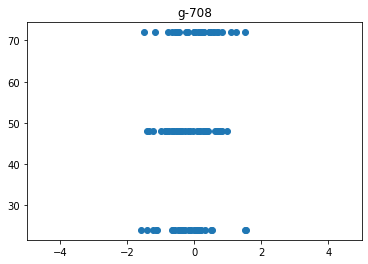

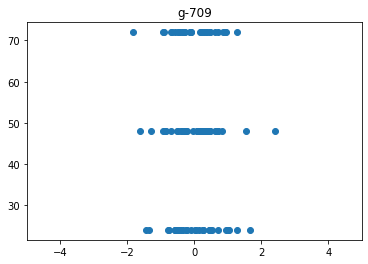

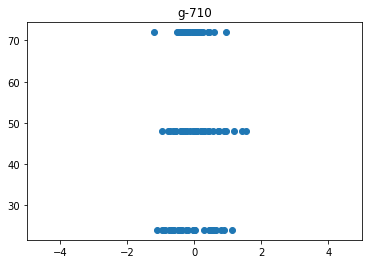

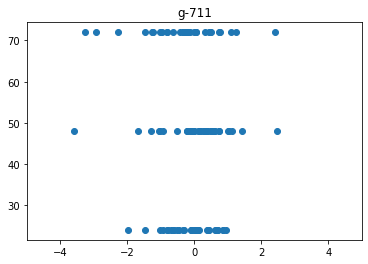

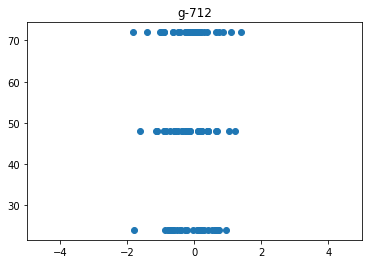

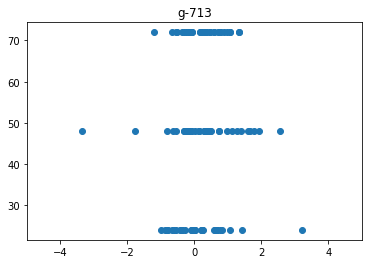

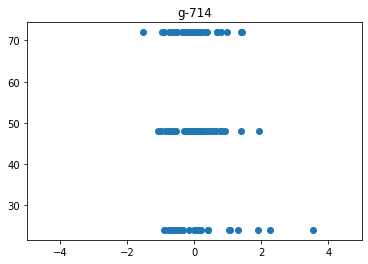

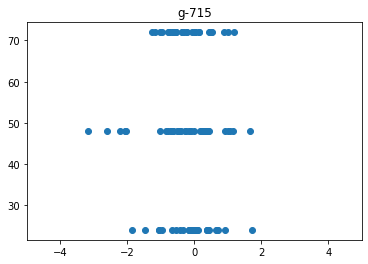

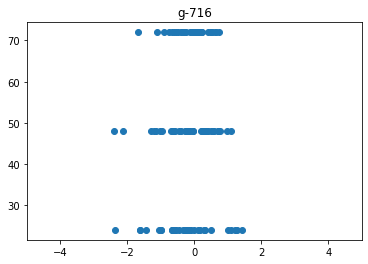

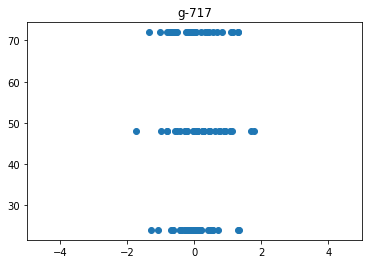

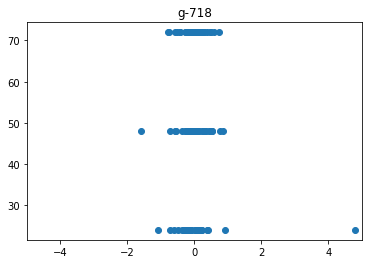

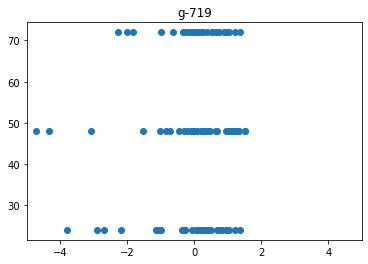

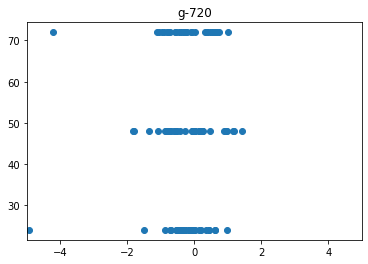

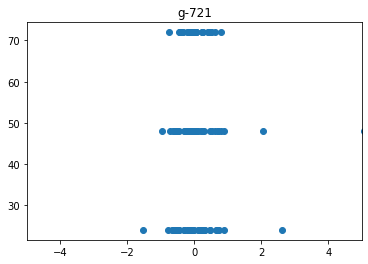

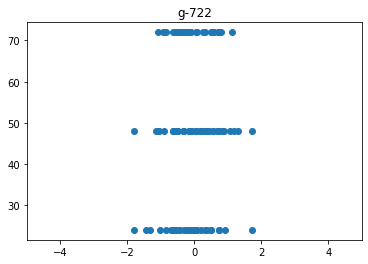

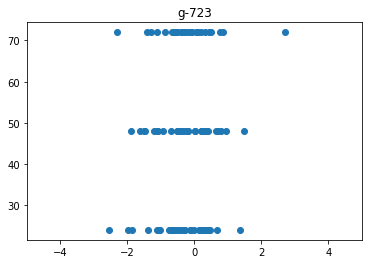

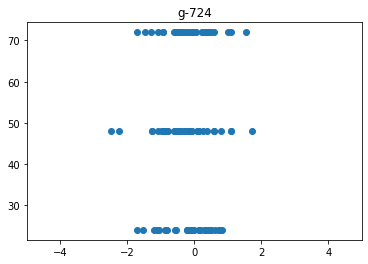

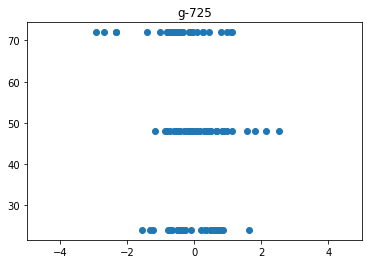

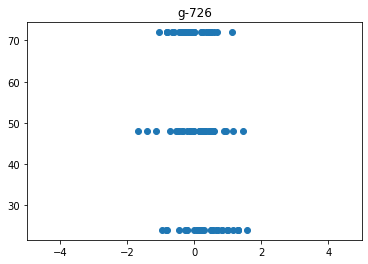

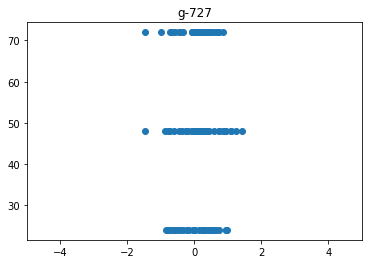

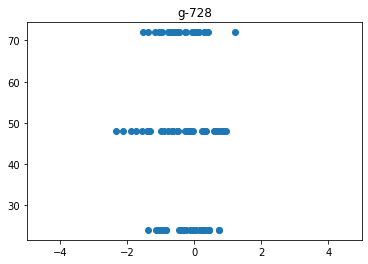

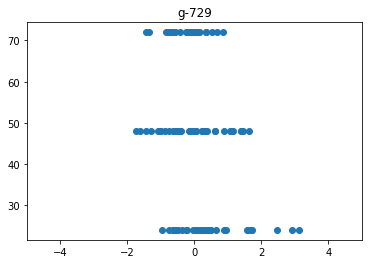

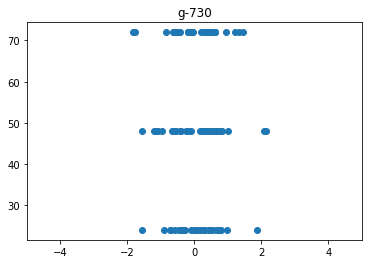

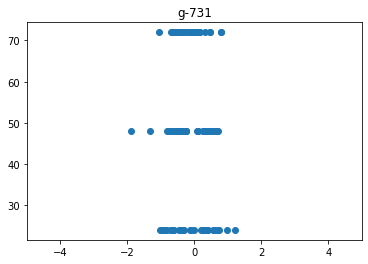

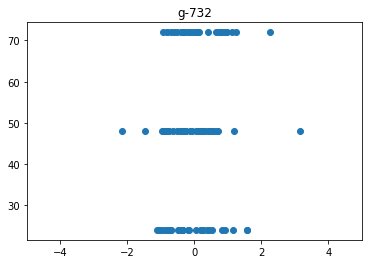

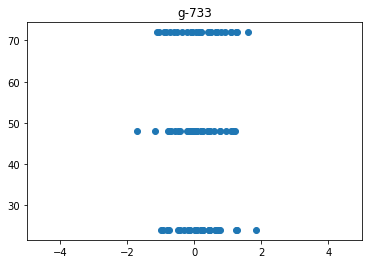

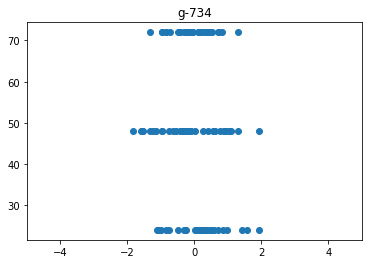

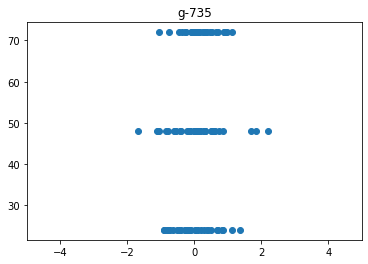

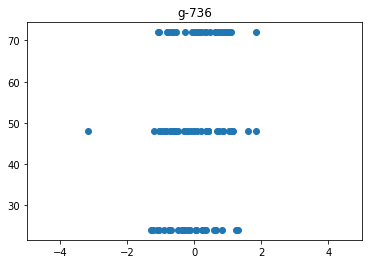

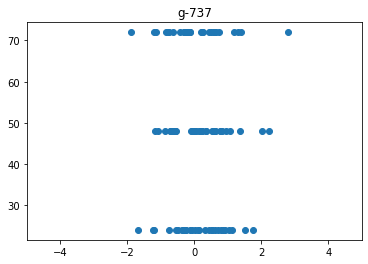

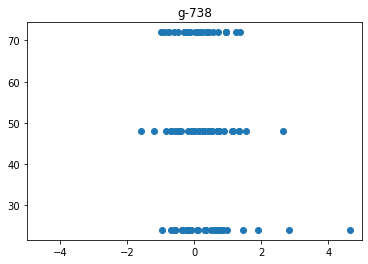

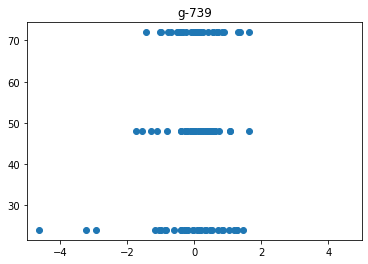

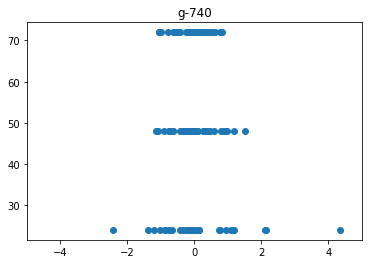

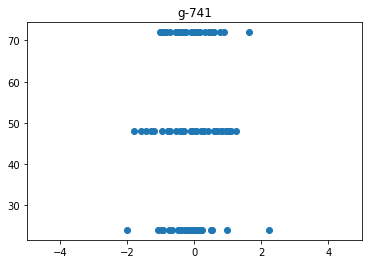

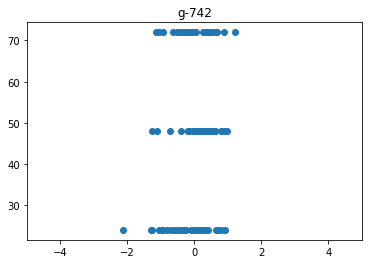

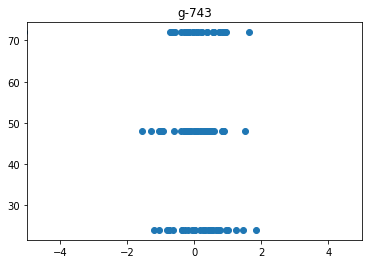

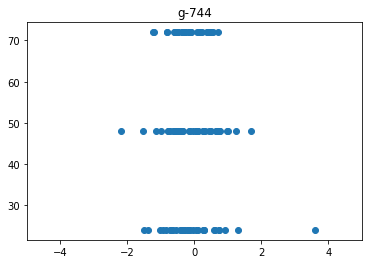

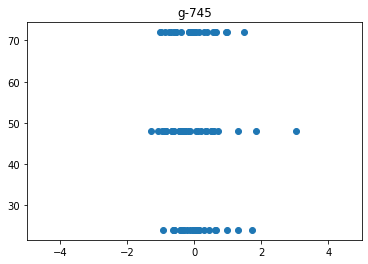

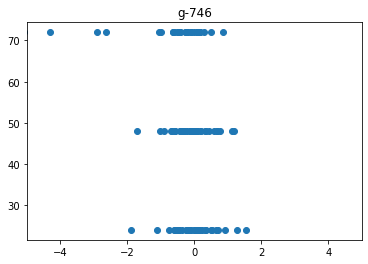

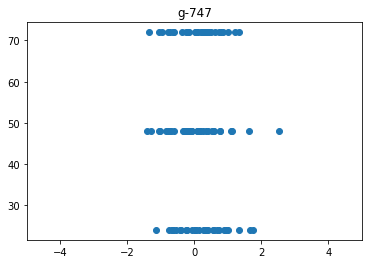

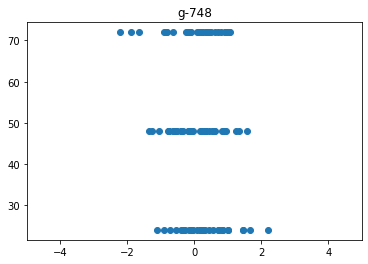

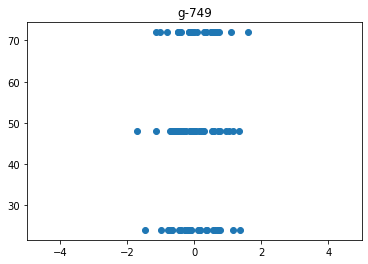

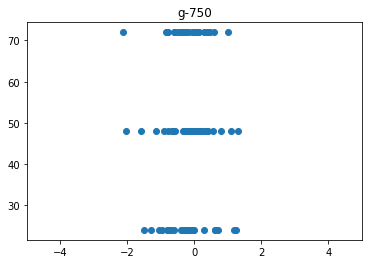

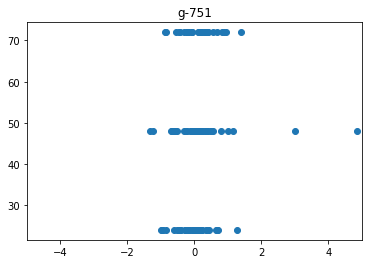

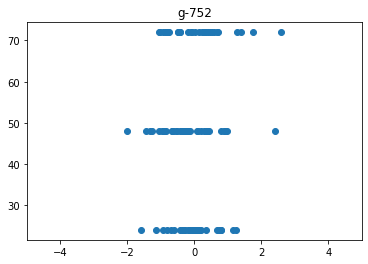

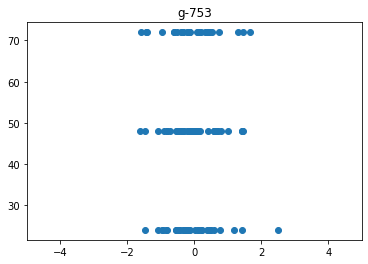

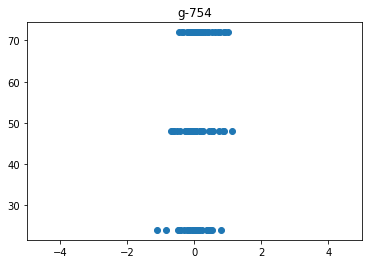

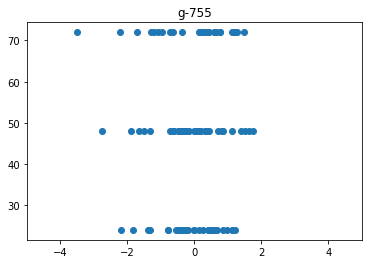

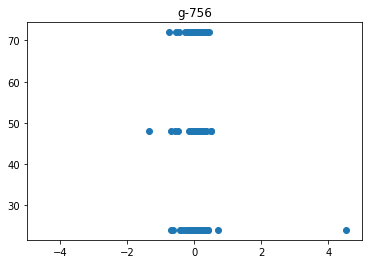

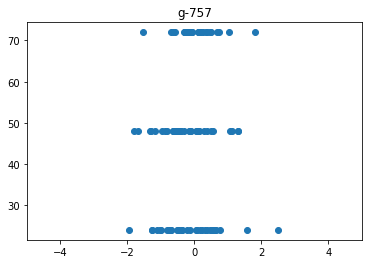

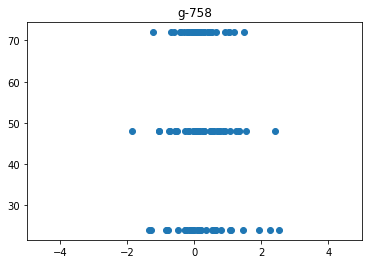

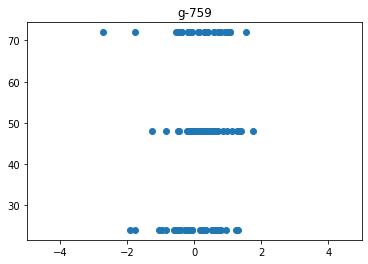

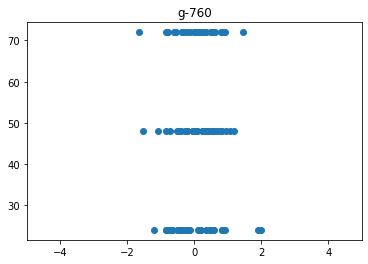

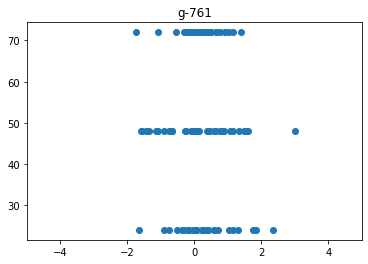

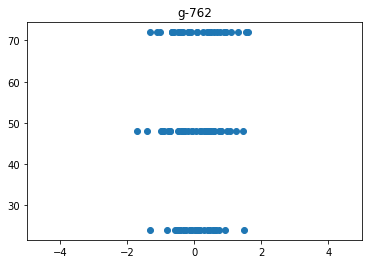

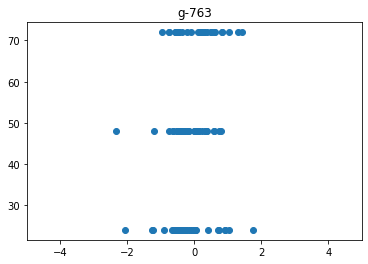

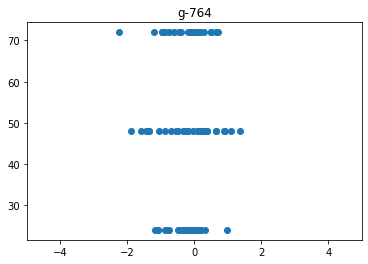

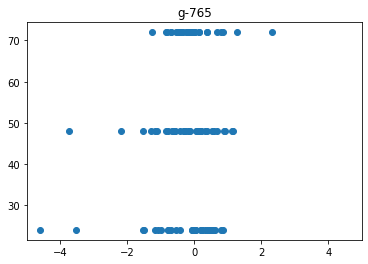

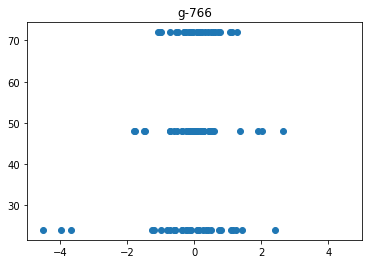

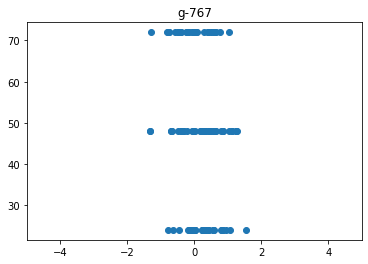

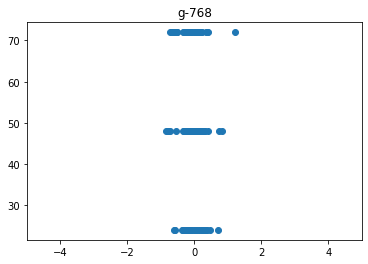

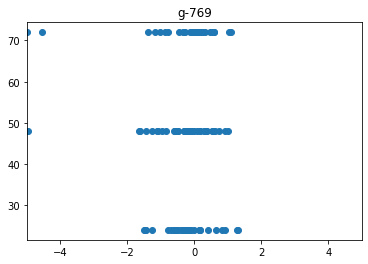

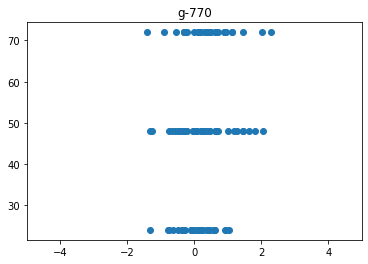

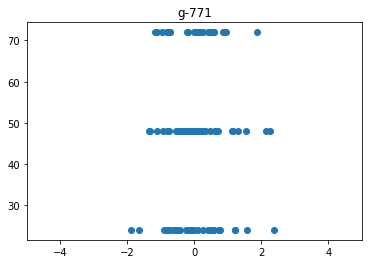

In [35]:
for i in range(772):
    x = query['g-%d'%i].values
    y = query['cp_time'].values
    
#     plt.scatter(x, y)
#     plt.title('g-%d'%i)
#     plt.xlim([-5,5])
#     plt.show()

In [17]:
ctl_features = train[train['cp_type'] == 'ctl_vehicle'][FEATURE_COLS[3:]]
max_y = ctl_features.max().values
min_y = ctl_features.min().values

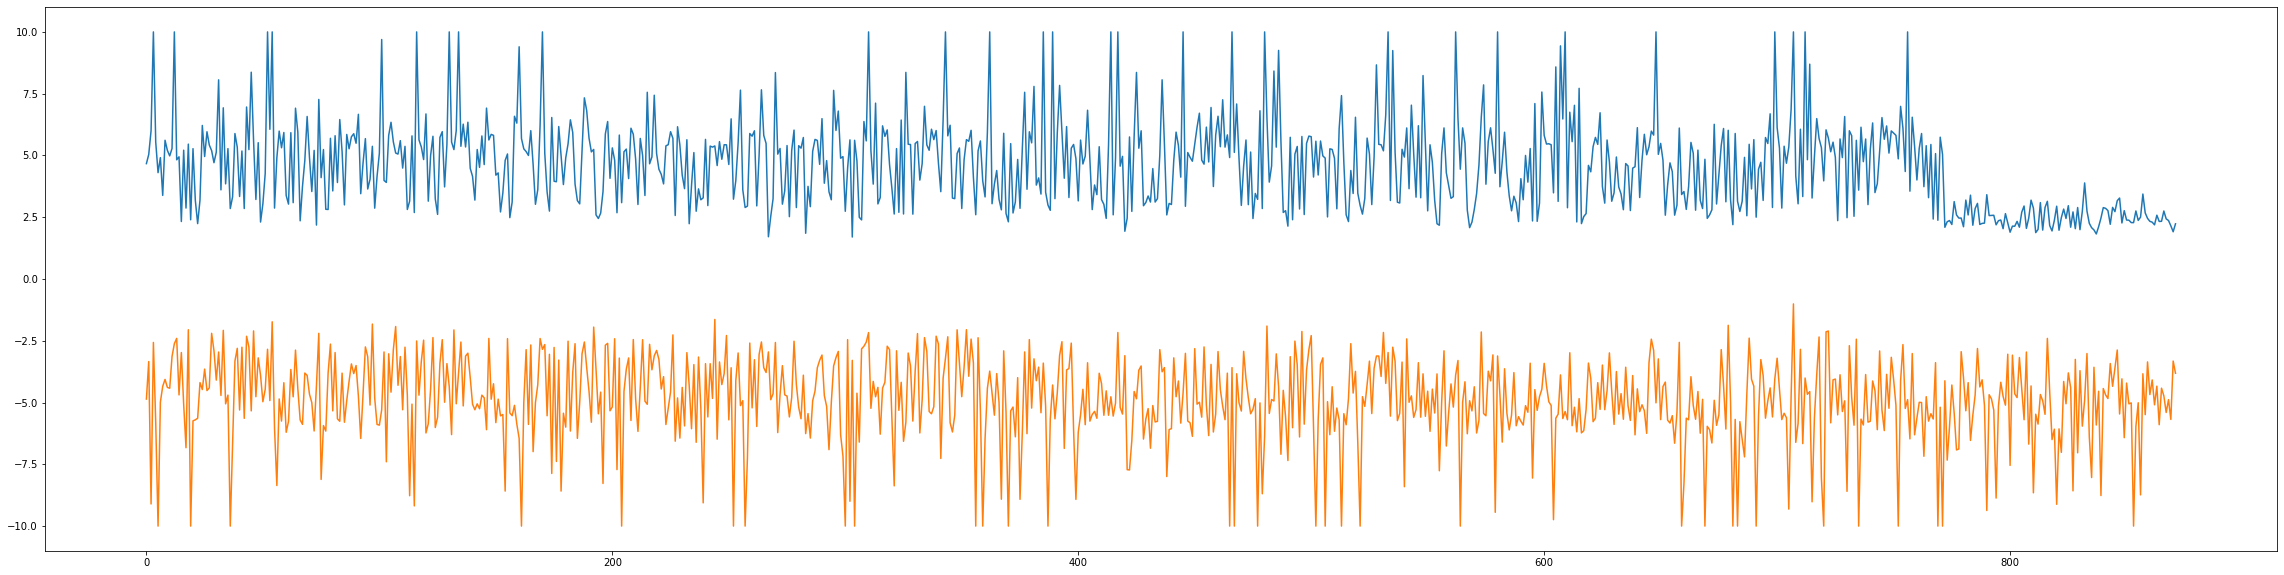

In [18]:
fig, ax = plt.subplots(1,1,figsize=(40,10))
ax.plot(max_y)
ax.plot(min_y)

### Try to reconstruct dose-response curves

In [75]:
condition = train[(train['mek_inhibitor'] == 1) & (train['cp_time'] == 24)]

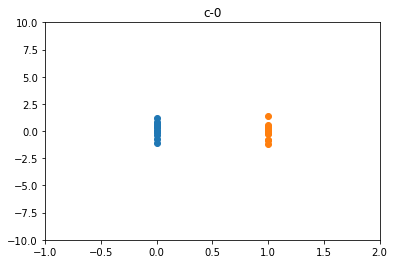

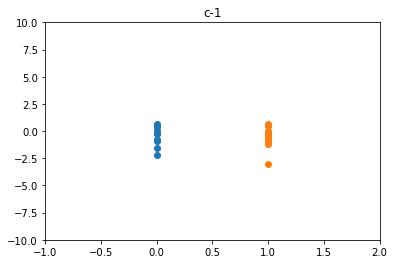

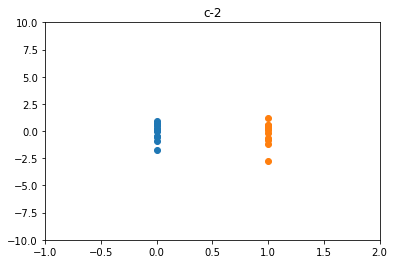

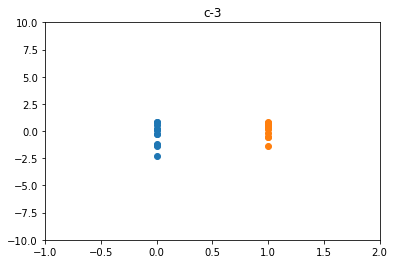

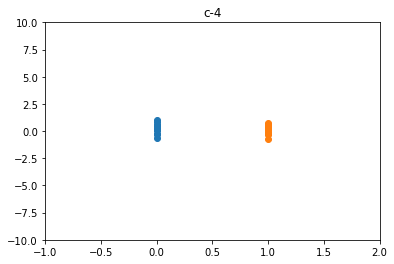

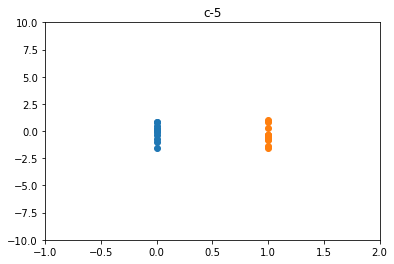

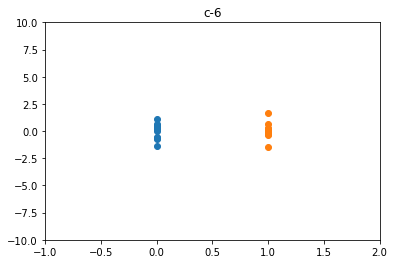

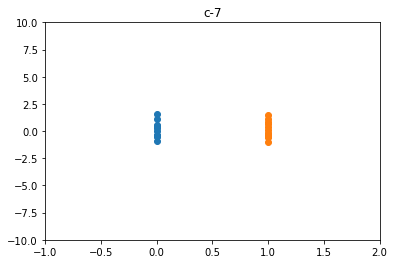

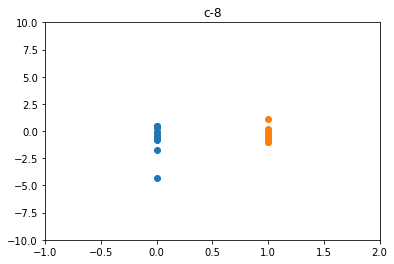

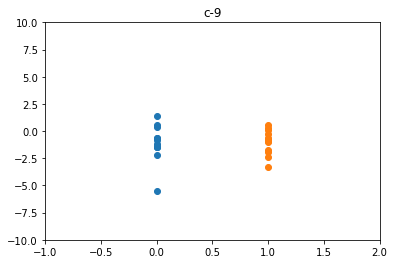

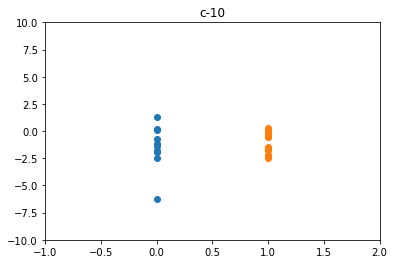

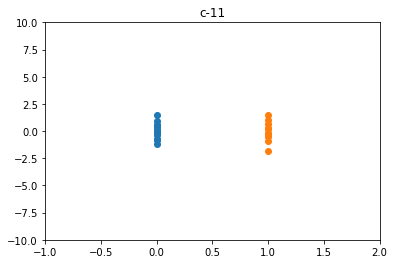

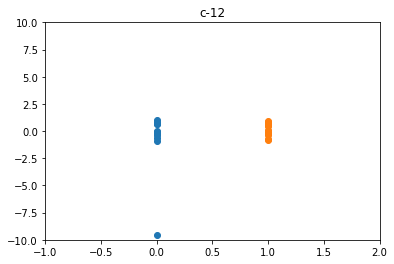

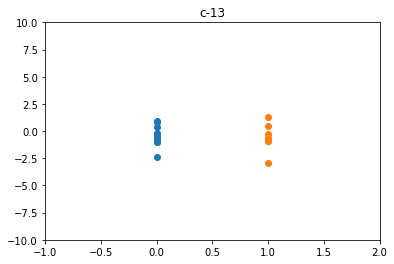

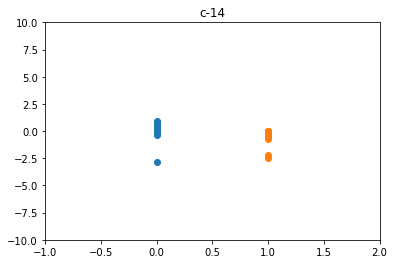

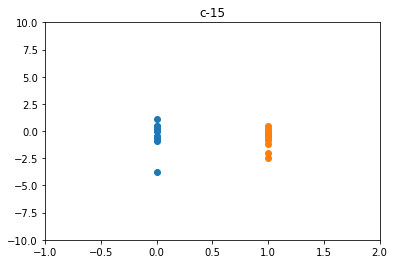

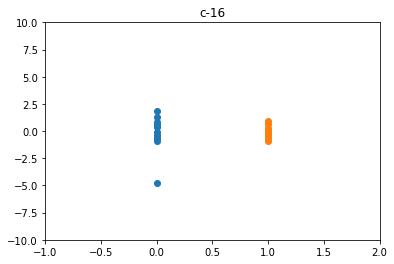

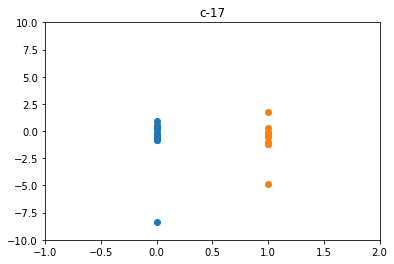

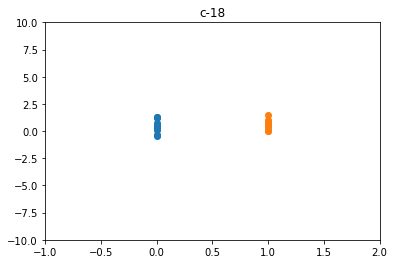

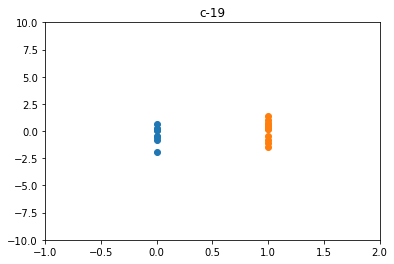

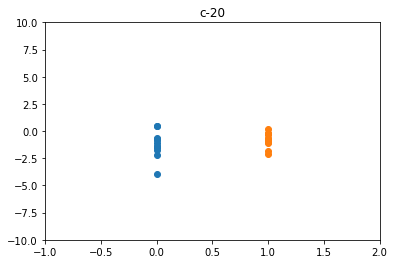

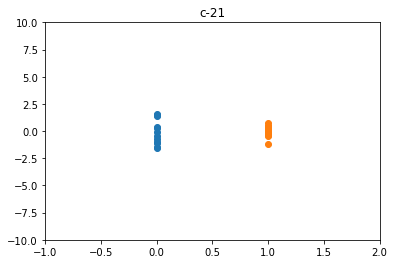

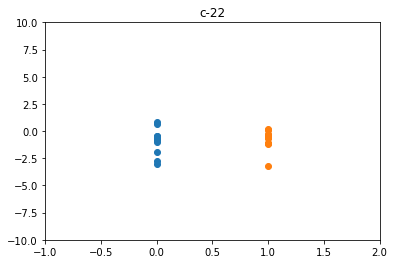

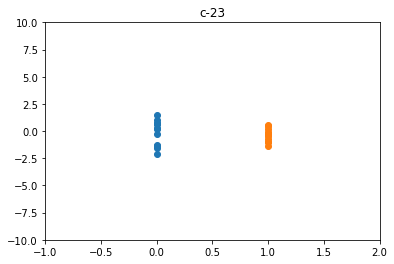

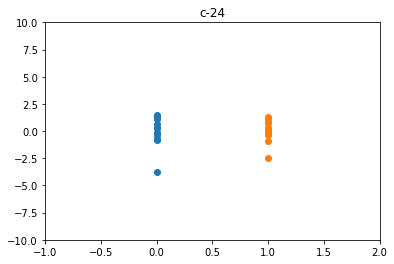

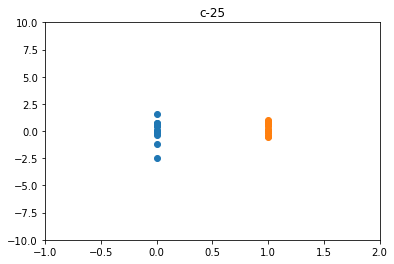

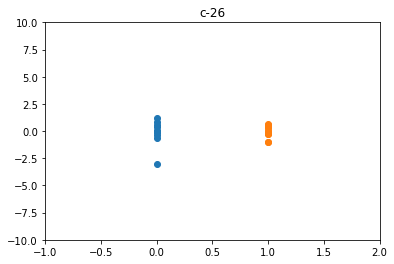

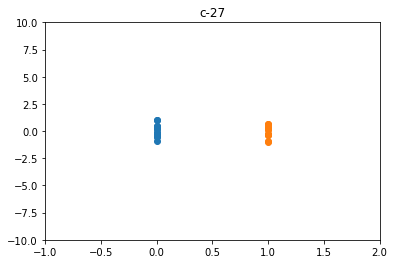

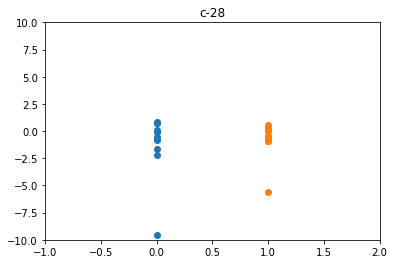

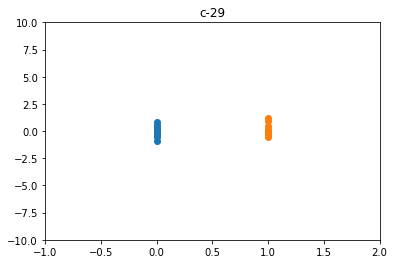

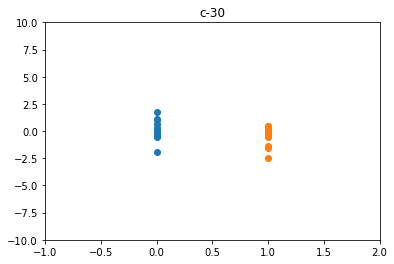

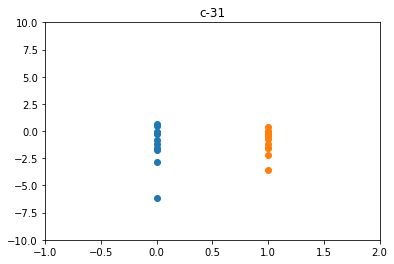

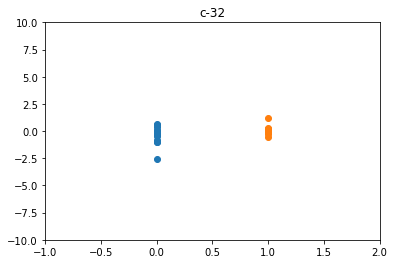

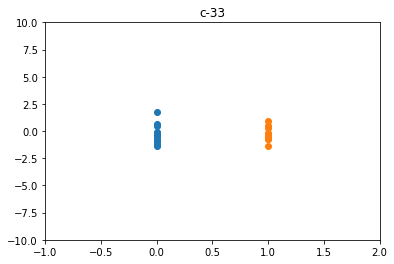

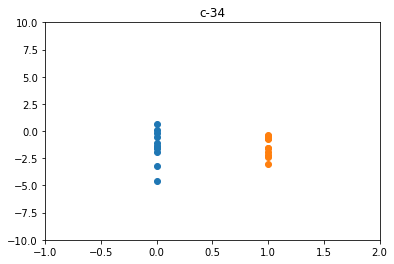

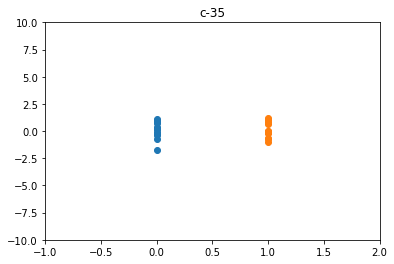

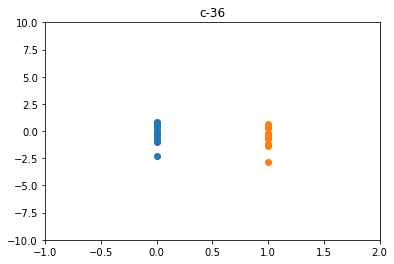

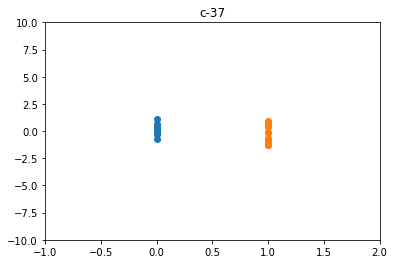

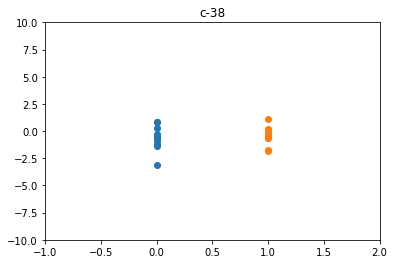

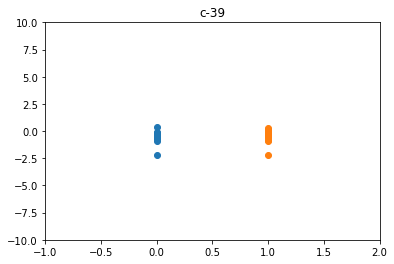

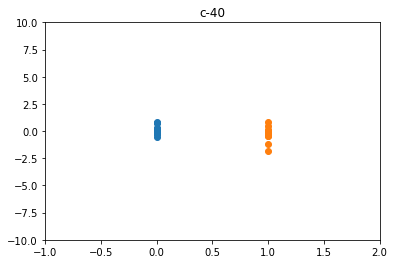

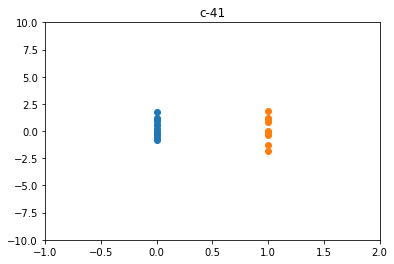

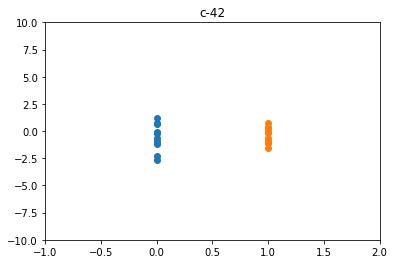

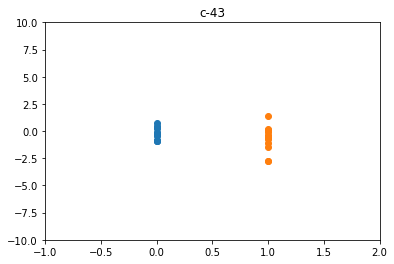

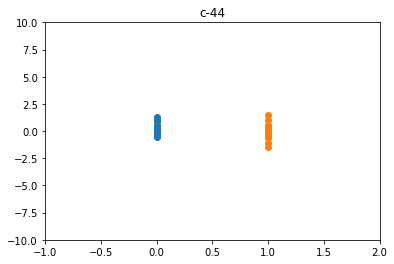

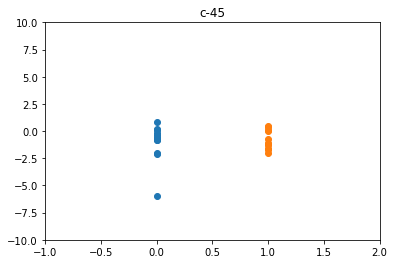

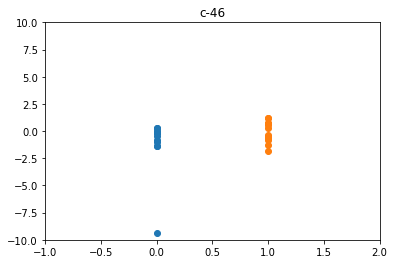

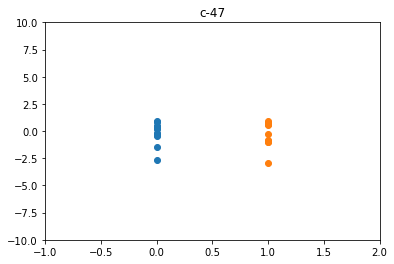

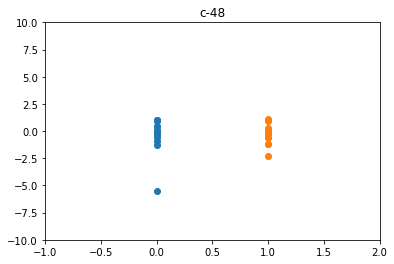

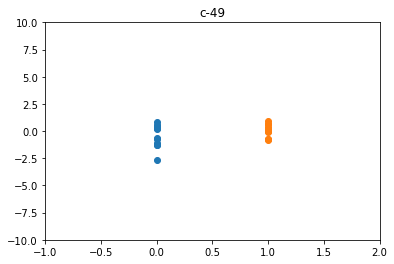

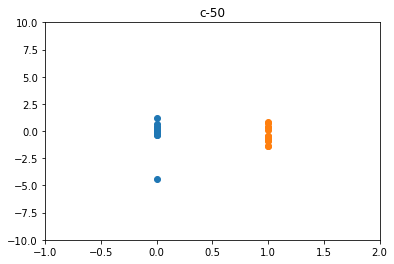

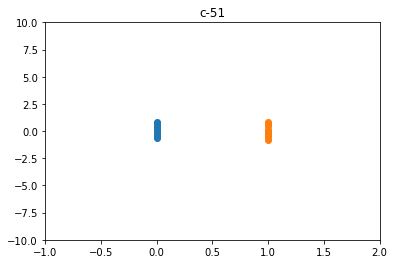

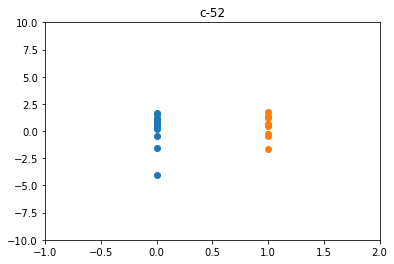

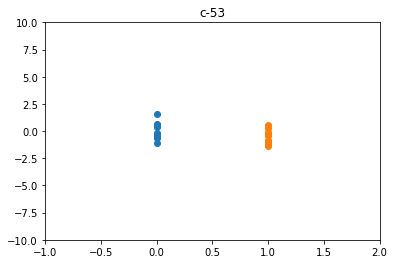

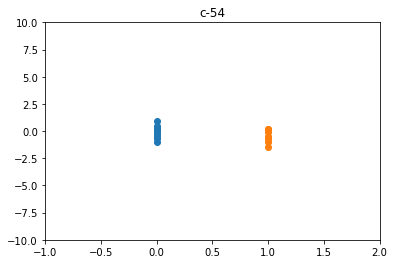

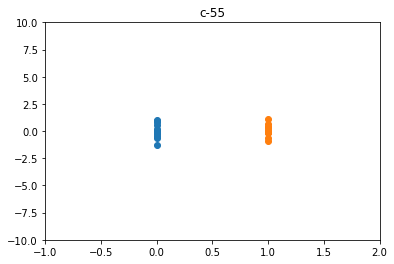

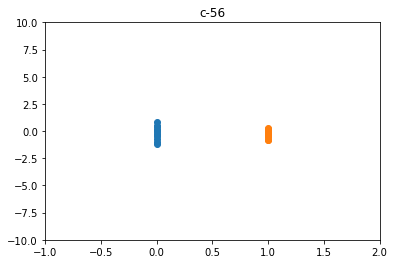

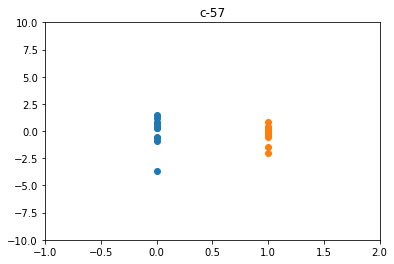

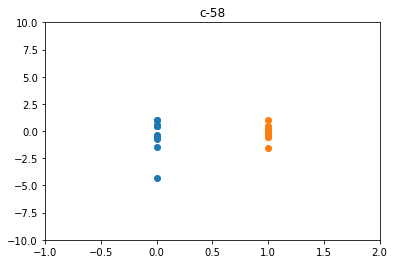

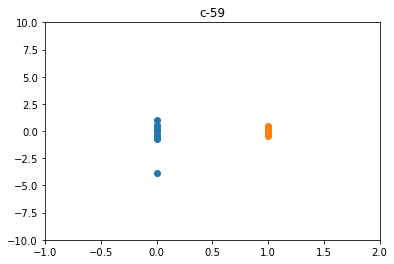

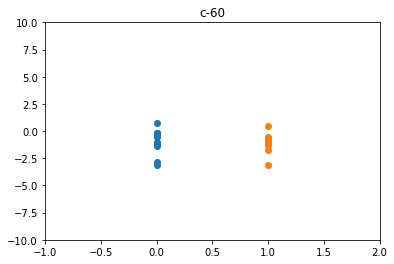

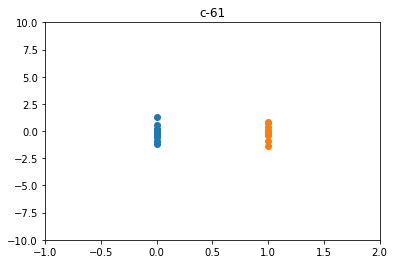

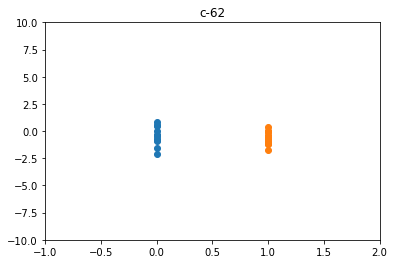

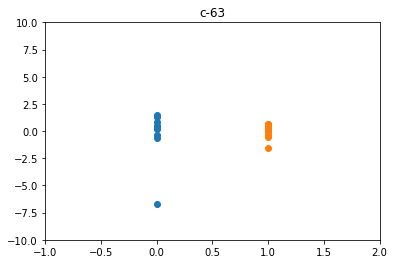

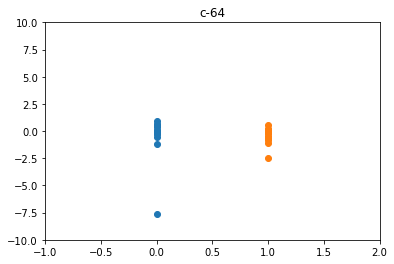

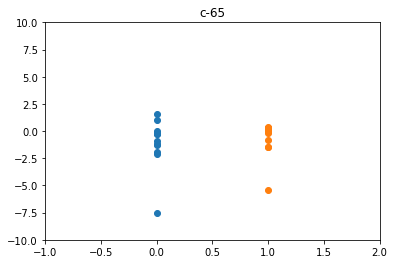

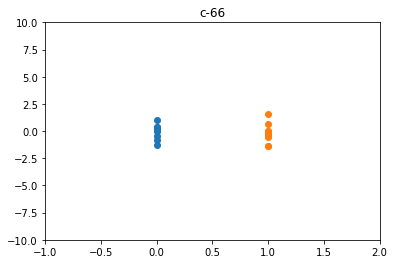

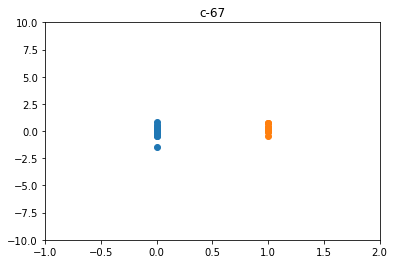

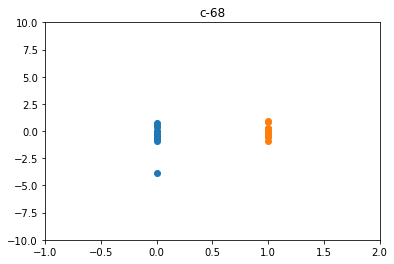

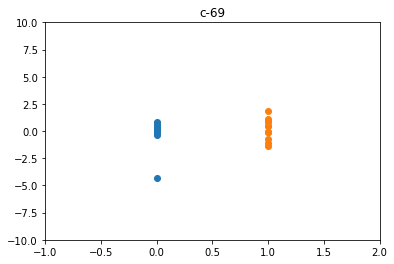

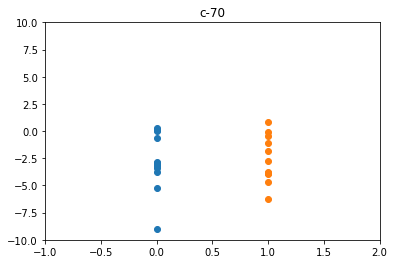

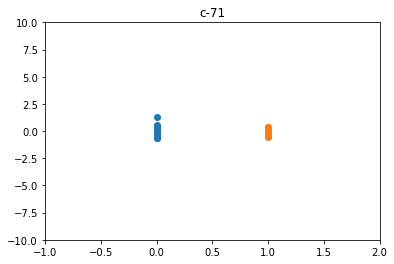

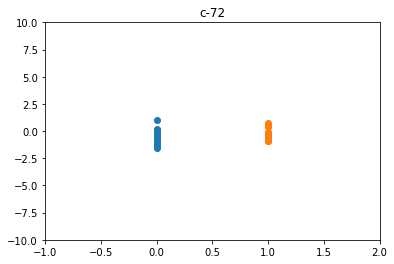

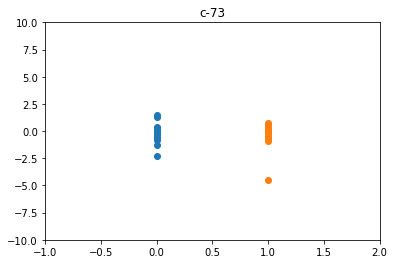

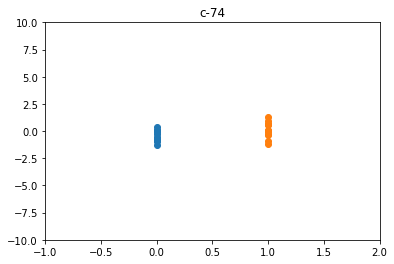

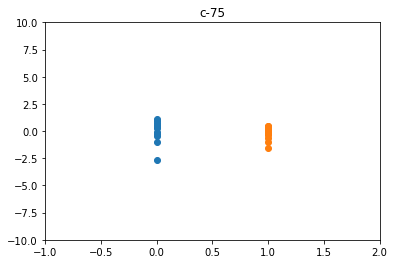

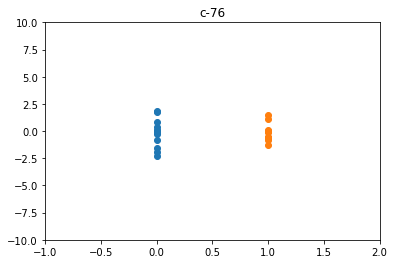

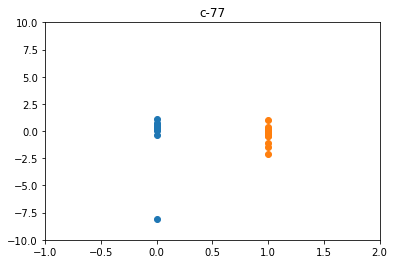

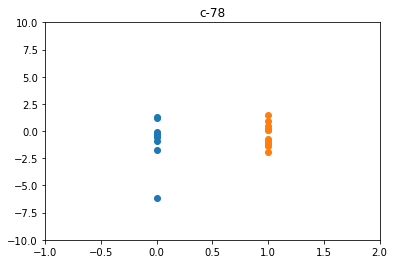

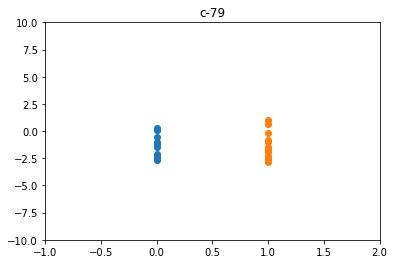

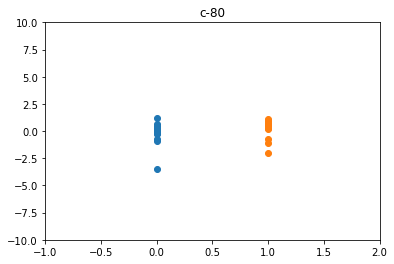

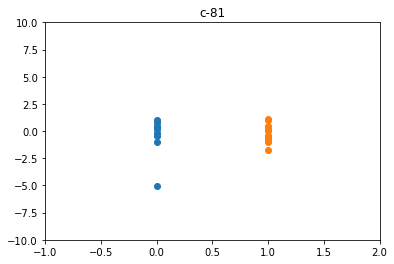

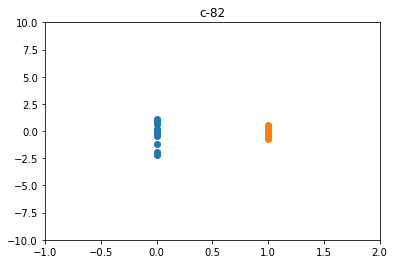

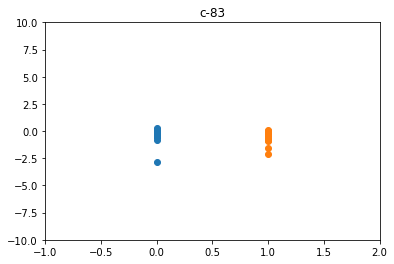

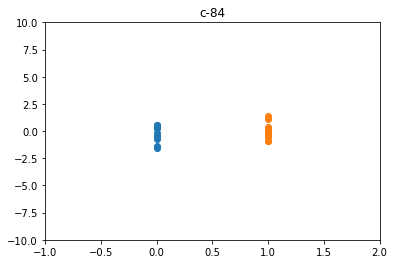

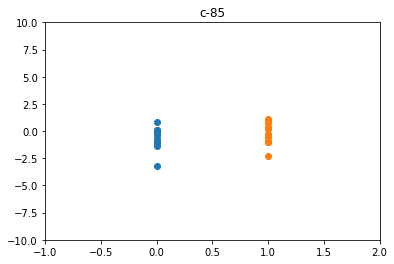

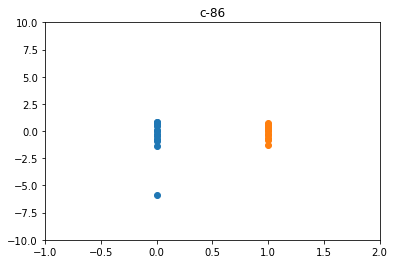

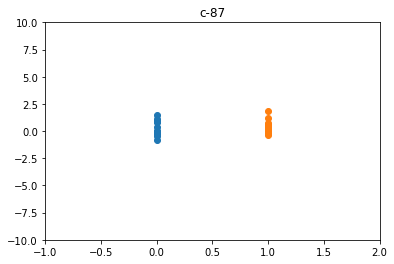

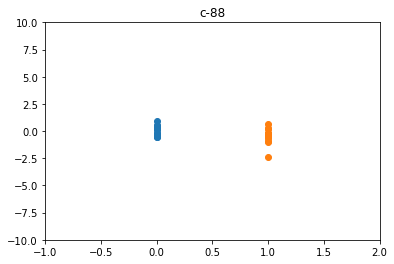

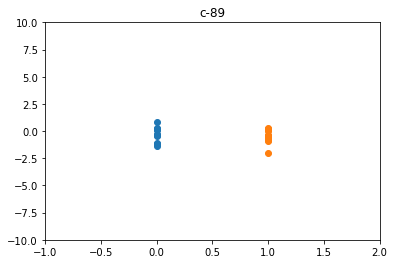

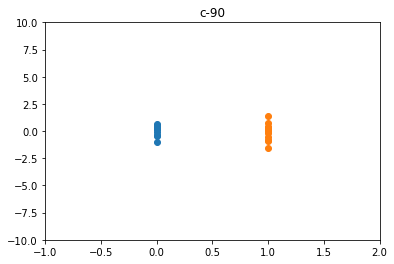

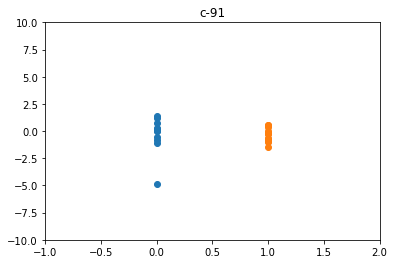

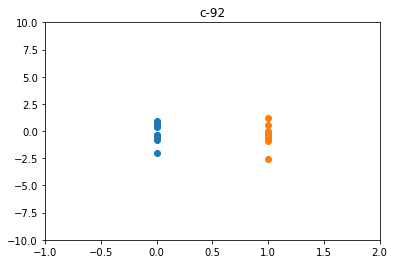

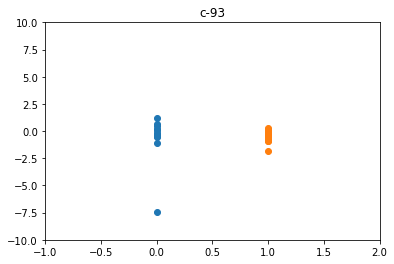

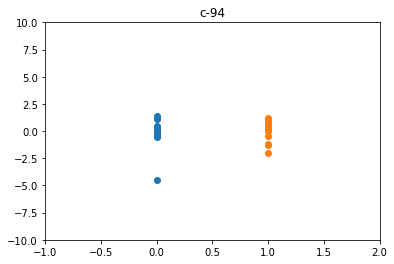

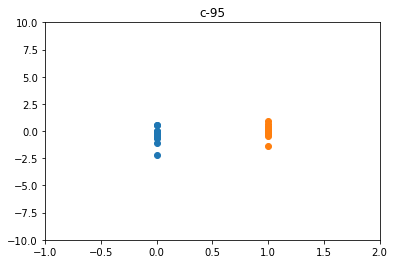

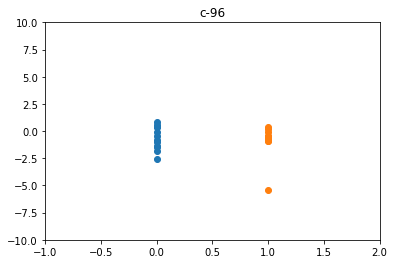

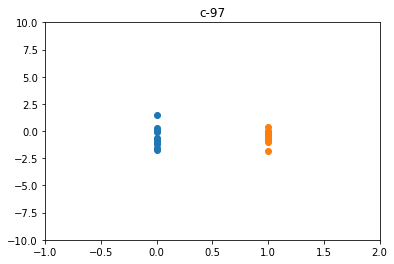

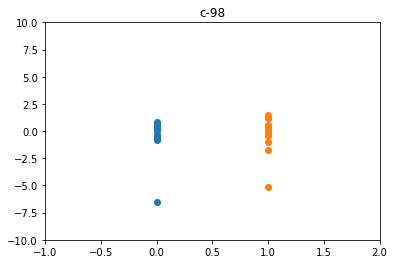

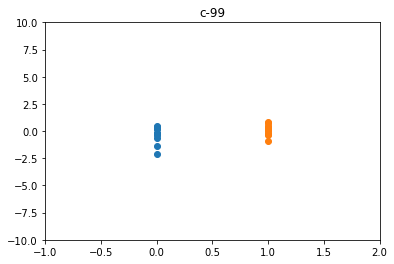

In [76]:
for col in C_FEATURE_COLS:
    for i, dose in enumerate(['D1', 'D2']):
        y = condition[condition['cp_dose'] == dose][col].values
        x = np.full(y.shape, i)
        plt.scatter(x, y)
    plt.title(col)
    plt.ylim(-10,10)
    plt.xlim(-1,2)
    plt.show()